# Algoritmo de Regresión Logística

- La regresión logística es un algoritmo de aprendizaje supervisado utilizado para la **clasificación binaria**, es decir, cuando queremos predecir la pertenencia de una observación a una de dos categorías posibles.

Por ejemplo: Queremos predecir si un raton esta enfermo (0 o 1) dado ciertas caracteristicas X (su peso, etc.)

- A pesar de su nombre, la regresión logística se utiliza para **problemas de clasificación**, no para problemas de regresión.

- El nombre "logística" proviene de la función logística, también conocida como **función sigmoide**, que se utiliza en este algoritmo. La función sigmoide transforma cualquier valor de entrada en un rango entre 0 y 1, lo que hace que sea útil para representar probabilidades. En el contexto de la regresión logística, esta función se utiliza para modelar la probabilidad de que una observación pertenezca a una de las dos clases.

## 1. ¿Qué es la función Sigmoide (o Logística)?

La función sigmoide, también conocida como función logística, es una función matemática que tiene una forma de "S" o "curva sigmoide". Su forma matemática está dada por la siguiente ecuación:

<img src="img1.png">

<img src="img3.png">

<img src="img2.png">

## 2. ¿Qué es z?

En el contexto de la función sigmoide, z es la entrada de la función, también conocida como "logit". z es una combinación lineal de las características de entrada multiplicadas por los parámetros del modelo. En otras palabras, z es la suma ponderada de las características, donde cada característica se multiplica por su correspondiente parámetro y luego se suman.

Matemáticamente, si tenemos un vector de características x y un vector de parámetros β, entonces z se calcula como el producto punto entre x y β:

<img src="img4.png">

## 3. ¿Cómo se calculan cuáles son los buenos parámetros del modelo logístico?

Para calcular los buenos parámetros del modelo logístico y realizar buenas predicciones, se utiliza un proceso de **entrenamiento del modelo**. Este proceso implica optimizar los parámetros del modelo utilizando un conjunto de datos de entrenamiento.

La **optimización de los parámetros** del modelo implica encontrar los valores de los parámetros que minimizan una **función de costo**, la cual representa la discrepancia entre las predicciones del modelo y las etiquetas verdaderas en el conjunto de datos de entrenamiento.

Para hacer esto, generalmente se utiliza un algoritmo de optimización, como el **gradiente descendente**. 

- **Etapa 1**: Inicialización de parámetros: Se comienza inicializando los parámetros del modelo con valores aleatorios o predefinidos.

- **Etapa 2**: Cálculo de la función de costo: Se calcula la función de costo utilizando los parámetros actuales del modelo y los datos de entrenamiento. La función de costo mide la discrepancia entre las predicciones del modelo y las etiquetas verdaderas.

- **Etapa 3**: Cálculo del gradiente: Se calcula el gradiente de la función de costo con respecto a los parámetros del modelo. El gradiente indica la dirección en la que se debe ajustar cada parámetro para disminuir la función de costo.

- **Etapa 4**: Actualización de parámetros: Se ajustan los parámetros del modelo en la dirección opuesta al gradiente, multiplicado por una **tasa de aprendizaje**. Esto se hace para mover los parámetros hacia los valores que minimizan la función de costo.

- Repetición del proceso: Los pasos 2 a 4 se repiten iterativamente hasta que se alcance un criterio de detención, como un número máximo de iteraciones o una mejora mínima en la función de costo.

El objetivo del proceso de optimización es encontrar los parámetros del modelo que minimicen la función de costo y, por lo tanto, hagan que las predicciones del modelo sean lo más precisas posible. El algoritmo de optimización ajusta gradualmente los parámetros del modelo en la dirección que reduce la función de costo, lo que conduce a un modelo mejorado con el tiempo.


## 4. ¿Cuál función de costo se utiliza?

En la regresión logística, la función de costo más comúnmente utilizada es la función de costo de **entropía cruzada** (también conocida como pérdida logarítmica). Esta función se utiliza porque es adecuada para problemas de clasificación binaria y está diseñada para penalizar fuertemente las predicciones incorrectas.

<img src="img5.png">

## 5. Ilustración del entrenamiento de un modelo de Regresión Logística 

Nuestro dataset está compuesto por:
- X: 1 caracteristica
- y: 1 predicción que puede tener dos valores posibles (0 o 1) - problema de clasificación binario
- 100 instancias

Generamos el dataset y lo visualizamos a continuación.

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

X, y = make_classification(n_samples=100, n_features=1, n_informative=1, n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=1, random_state=0)

# Añadir la columna de 1s para el término de sesgo
X = np.insert(X, 0, 1, axis=1)

In [2]:
# Definir la función sigmoide
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [3]:
def plot_decision_boundary(X, y, beta):
    """
    Función para visualizar los puntos de datos y el modelo de regresión logística en 2D.

    Parámetros:
    - X: array de datos de entrada con la columna de sesgo incluida.
    - y: array de etiquetas de clase.
    - beta: array de parámetros del modelo entrenado.
    """
    plt.figure()

    # Colores para las clases
    colors = ['red' if label == 0 else 'blue' for label in y]

    # Graficar los puntos de datos
    plt.scatter(X[:, 1], y, c=colors, marker='o', edgecolor='k', label='Datos reales')

    # Graficar la función sigmoide
    x_values = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
    y_values = sigmoid(beta[0] + beta[1] * x_values)
    plt.plot(x_values, y_values, color='yellow', alpha=0.5, label='Modelo sigmoide')

    # Etiquetas de los ejes
    plt.xlabel('Feature 1')
    plt.ylabel('Probabilidad predicha')

    # Leyenda
    plt.legend()

    # Mostrar el gráfico
    plt.show()

Valores iniciales de los parámetros: [0. 0.]


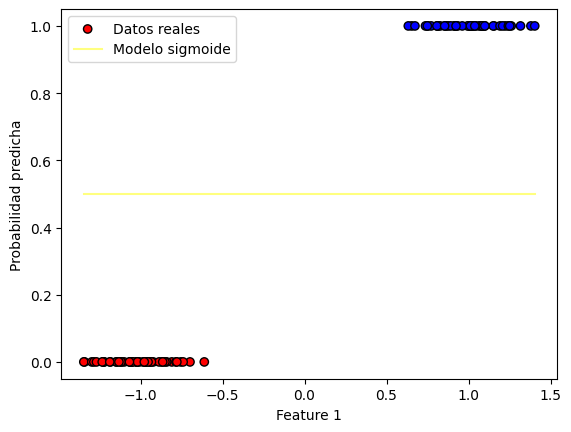

In [4]:
# Inicializar parámetros
beta = np.zeros(X.shape[1])
learning_rate = 0.01
iterations = 1000

print(f'Valores iniciales de los parámetros: {beta}')
# Llamar a la función de visualización
plot_decision_boundary(X, y, beta)

In [5]:
from mpl_toolkits.mplot3d import Axes3D

def plot_cost_surface(X, y, beta_history):
    """
    Función para visualizar la superficie de costo en función de los parámetros beta.

    Parámetros:
    - X: array de datos de entrada con la columna de sesgo incluida.
    - y: array de etiquetas de clase.
    - beta_history: lista de matrices que contienen los valores de beta en cada iteración del gradiente descendente.
    """
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Crear una malla de valores de beta0 y beta1
    beta0_vals = np.linspace(-2, 2, 100)
    beta1_vals = np.linspace(-2, 2, 100)
    beta0_vals, beta1_vals = np.meshgrid(beta0_vals, beta1_vals)

    # Calcular el costo para cada combinación de beta0 y beta1
    cost_vals = np.zeros_like(beta0_vals)
    for i in range(len(beta0_vals)):
        for j in range(len(beta1_vals)):
            beta = np.array([beta0_vals[i,j], beta1_vals[i,j]])
            cost_vals[i,j] = cost_function(X, y, beta)

    # Graficar la superficie de costo
    ax.plot_surface(beta0_vals, beta1_vals, cost_vals, cmap='viridis', alpha=0.8)
    ax.set_xlabel('Beta 0')
    ax.set_ylabel('Beta 1')
    ax.set_zlabel('Costo')

    plt.show()

In [6]:

# Definir la función de costo
def cost_function(X, y, beta):
    m = len(y)
    h = sigmoid(np.dot(X, beta))
    return (-1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))

# Gradiente descendente
def gradient_descent(X, y, beta, learning_rate, iterations):
    m = len(y)

    beta_history = []  # Lista para almacenar los valores de beta en cada iteración
    for _ in range(iterations):
        print(f'Iteracion: {_}')
        h = sigmoid(np.dot(X, beta))

        cost = cost_function(X, y, beta)  # Calcular el costo en cada iteración
        print(f'Costo en la iteración {_}: {cost}')
        
        gradient = np.dot(X.T, (h - y)) / m

        print(f'Valor del gradiente {_}: {gradient}')
        
        beta -= learning_rate * gradient
        print(f'Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: {beta}')
        # Llamar a la función de visualización
        plot_decision_boundary(X, y, beta)

        beta_history.append(beta.copy())  # Guardar una copia de los valores de beta en esta iteración        

    # Llamar a la función de visualización de la superficie de costo
    plot_cost_surface(X, y, beta_history)
    

    
    return beta

Iteracion: 0
Costo en la iteración 0: 0.6931471805599453
Valor del gradiente 0: [ 0.         -0.50423733]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.         0.00504237]


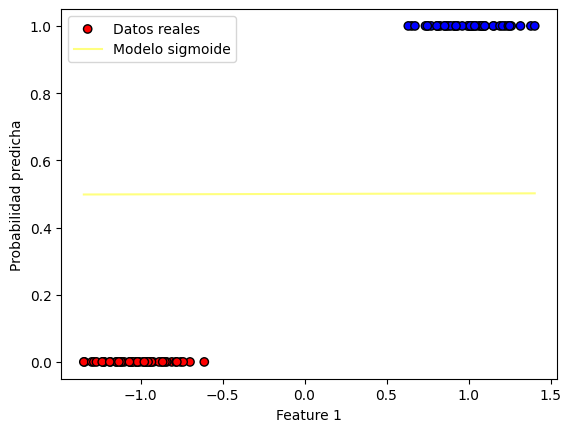

Iteracion: 1
Costo en la iteración 1: 0.6906079613051277
Valor del gradiente 1: [-1.63007675e-05 -5.02915099e-01]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [1.63007675e-07 1.00715243e-02]


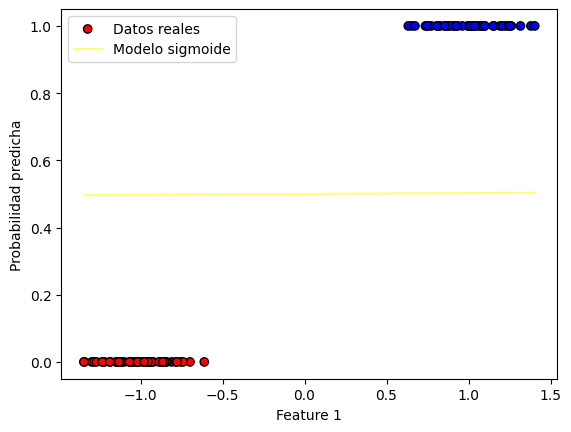

Iteracion: 2
Costo en la iteración 2: 0.6880820414279307
Valor del gradiente 2: [-3.25175141e-05 -5.01596355e-01]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [4.88182815e-07 1.50874878e-02]


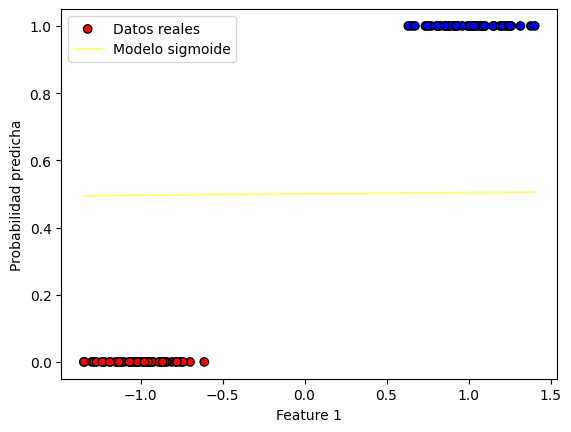

Iteracion: 3
Costo en la iteración 3: 0.6855693510156309
Valor del gradiente 3: [-4.86500489e-05 -5.00281109e-01]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [9.74683305e-07 2.00902989e-02]


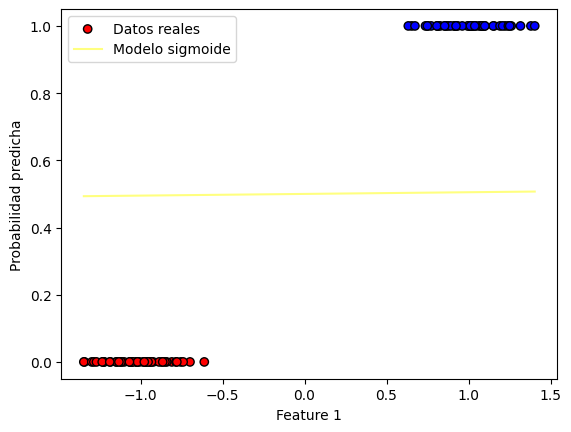

Iteracion: 4
Costo en la iteración 4: 0.683069820330451
Valor del gradiente 4: [-6.46981935e-05 -4.98969370e-01]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [1.62166524e-06 2.50799926e-02]


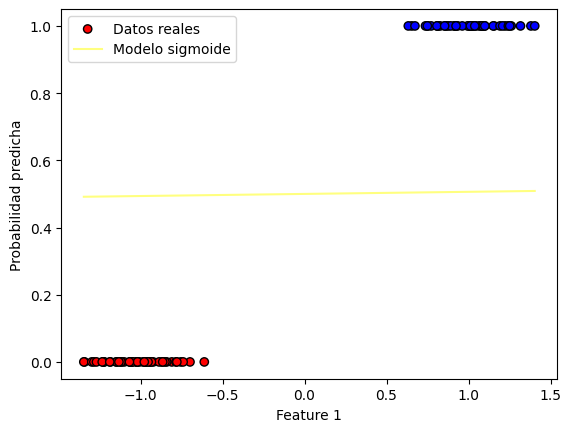

Iteracion: 5
Costo en la iteración 5: 0.6805833798132203
Valor del gradiente 5: [-8.06617811e-05 -4.97661148e-01]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [2.42828305e-06 3.00566041e-02]


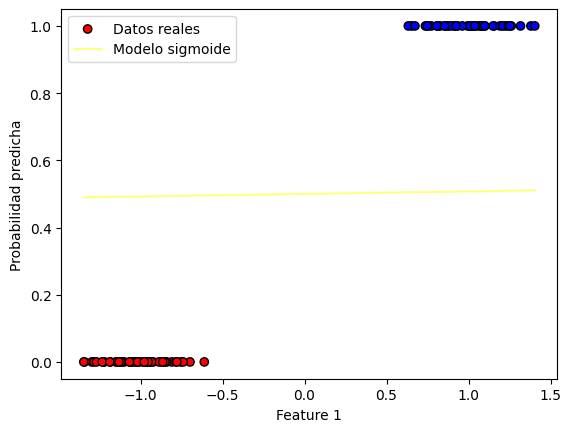

Iteracion: 6
Costo en la iteración 6: 0.6781099600869509
Valor del gradiente 6: [-9.65406569e-05 -4.96356452e-01]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [3.39368962e-06 3.50201686e-02]


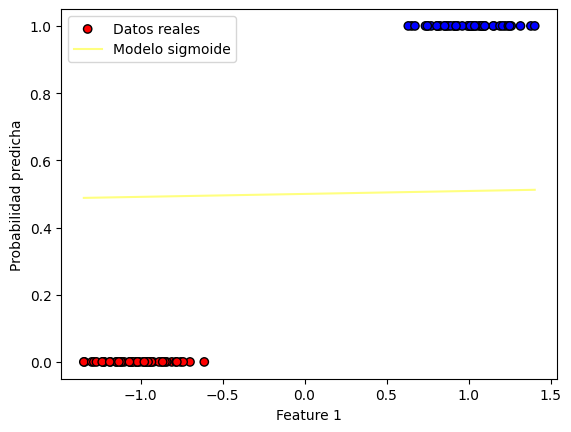

Iteracion: 7
Costo en la iteración 7: 0.6756494919603344
Valor del gradiente 7: [-1.12334678e-04 -4.95055291e-01]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [4.51703640e-06 3.99707215e-02]


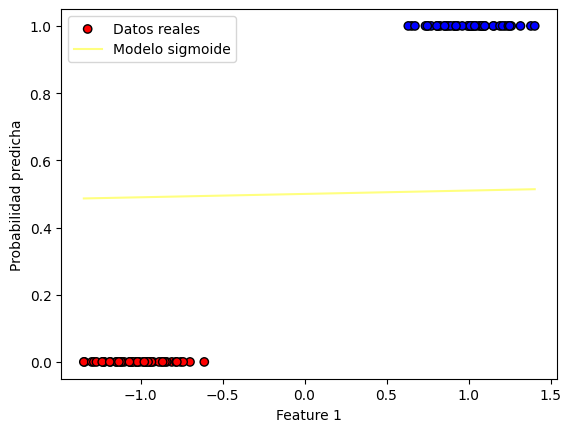

Iteracion: 8
Costo en la iteración 8: 0.6732019064311582
Valor del gradiente 8: [-1.28043713e-04 -4.93757674e-01]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [5.79747353e-06 4.49082983e-02]


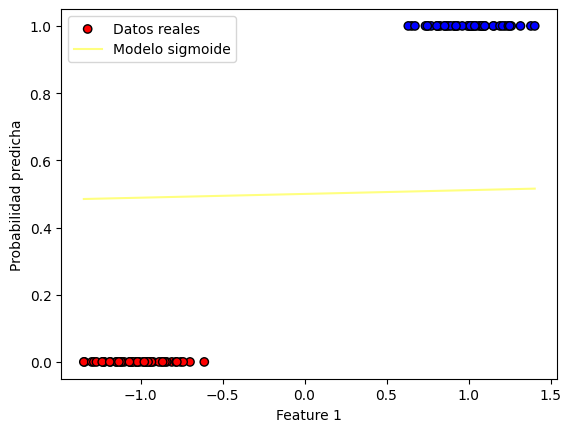

Iteracion: 9
Costo en la iteración 9: 0.6707671346896434
Valor del gradiente 9: [-1.43667642e-04 -4.92463609e-01]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [7.23414995e-06 4.98329344e-02]


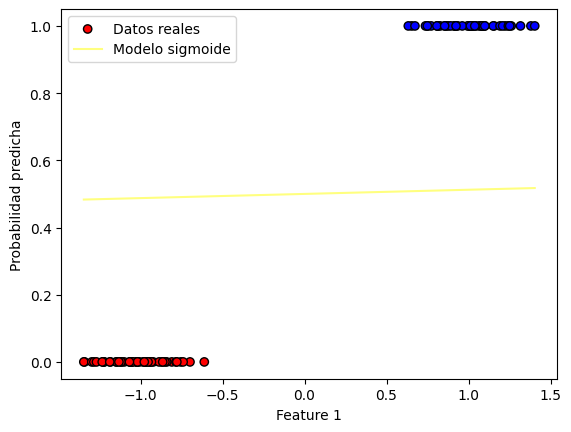

Iteracion: 10
Costo en la iteración 10: 0.6683451081217013
Valor del gradiente 10: [-1.59206355e-04 -4.91173103e-01]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [8.82621349e-06 5.47446654e-02]


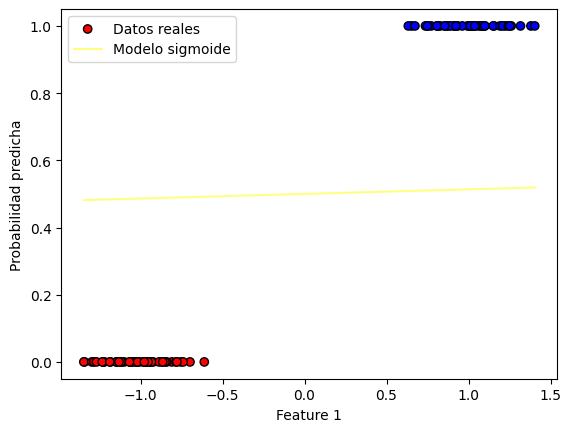

Iteracion: 11
Costo en la iteración 11: 0.6659357583121175
Valor del gradiente 11: [-1.74659755e-04 -4.89886165e-01]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [1.0572811e-05 5.9643527e-02]


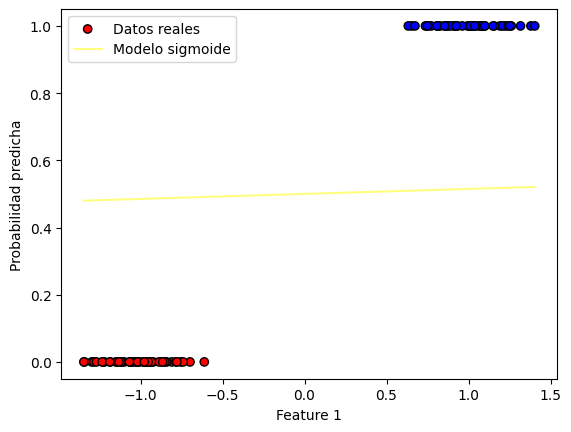

Iteracion: 12
Costo en la iteración 12: 0.663539017047651
Valor del gradiente 12: [-1.90027755e-04 -4.88602801e-01]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [1.24730886e-05 6.45295550e-02]


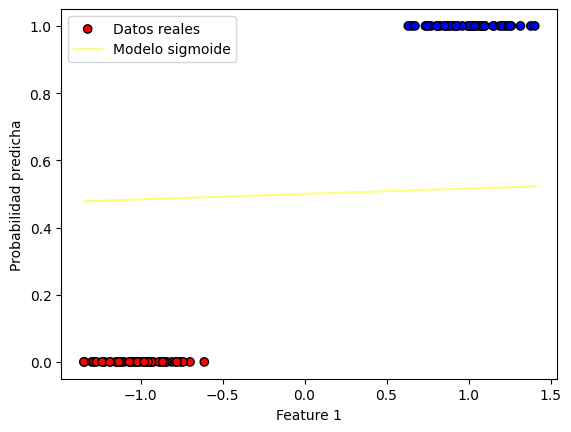

Iteracion: 13
Costo en la iteración 13: 0.6611548163200631
Valor del gradiente 13: [-2.05310278e-04 -4.87323019e-01]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [1.45261914e-05 6.94027852e-02]


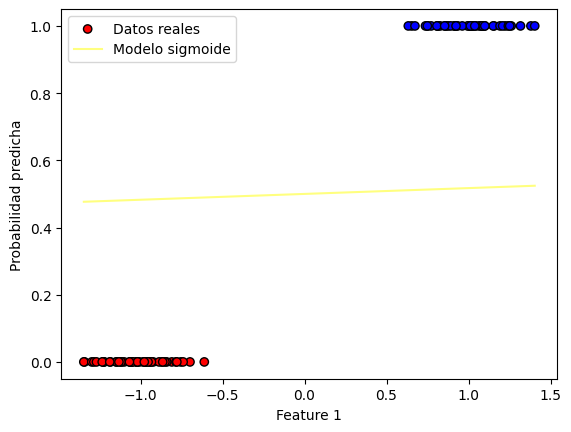

Iteracion: 14
Costo en la iteración 14: 0.6587830883290683
Valor del gradiente 14: [-2.20507259e-04 -4.86046825e-01]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [1.67312640e-05 7.42632535e-02]


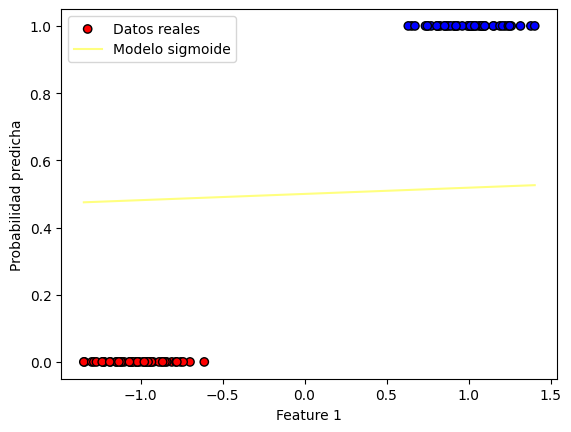

Iteracion: 15
Costo en la iteración 15: 0.656423765485208
Valor del gradiente 15: [-2.35618642e-04 -4.84774226e-01]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [1.90874504e-05 7.91109957e-02]


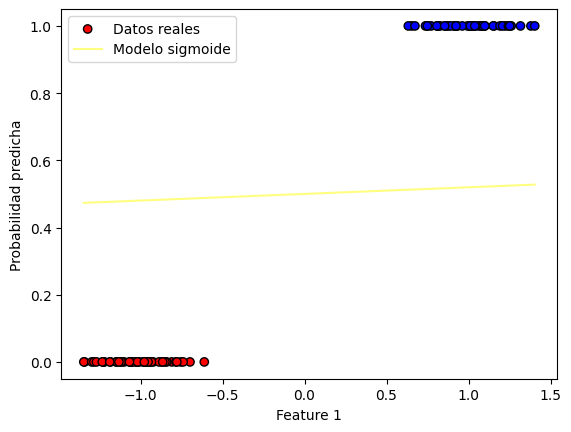

Iteracion: 16
Costo en la iteración 16: 0.654076780412654
Valor del gradiente 16: [-2.50644383e-04 -4.83505227e-01]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [2.15938942e-05 8.39460480e-02]


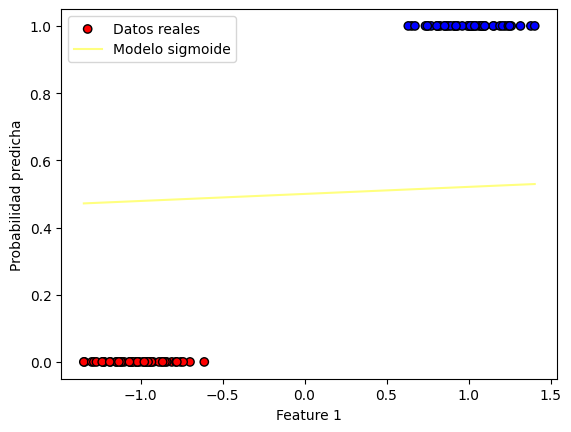

Iteracion: 17
Costo en la iteración 17: 0.6517420659519335
Valor del gradiente 17: [-2.65584445e-04 -4.82239836e-01]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [2.42497387e-05 8.87684464e-02]


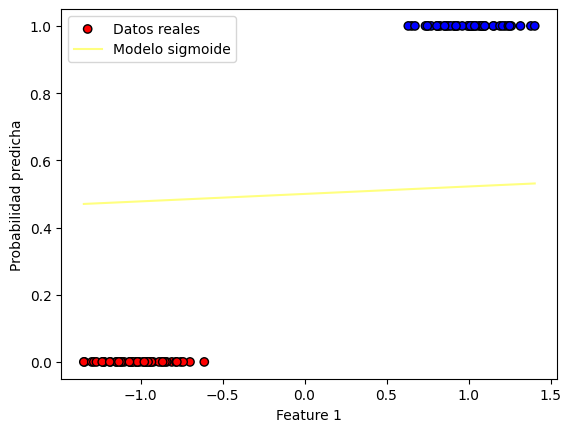

Iteracion: 18
Costo en la iteración 18: 0.6494195551625854
Valor del gradiente 18: [-2.80438804e-04 -4.80978056e-01]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [2.70541267e-05 9.35782269e-02]


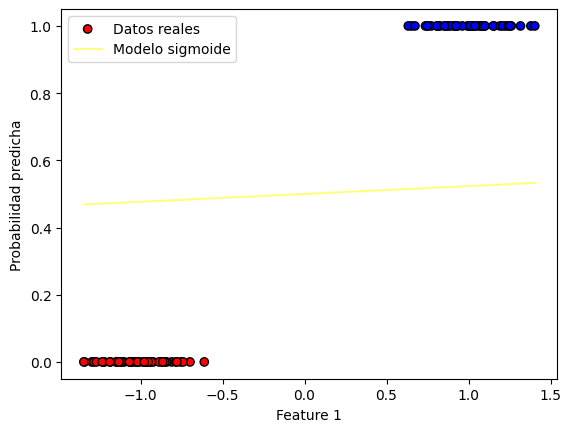

Iteracion: 19
Costo en la iteración 19: 0.6471091813257417
Valor del gradiente 19: [-2.95207445e-04 -4.79719893e-01]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [3.00062012e-05 9.83754259e-02]


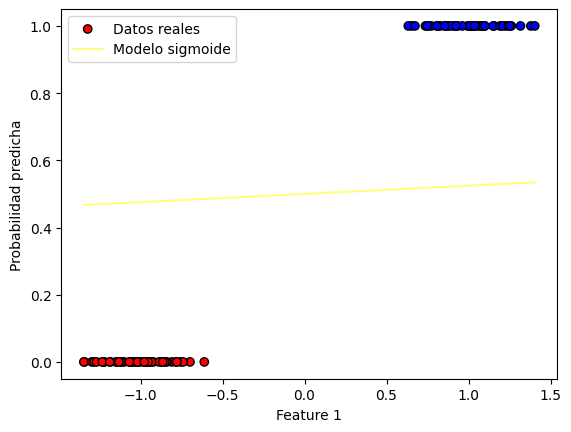

Iteracion: 20
Costo en la iteración 20: 0.6448108779466376
Valor del gradiente 20: [-3.09890360e-04 -4.78465353e-01]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [3.31051048e-05 1.03160079e-01]


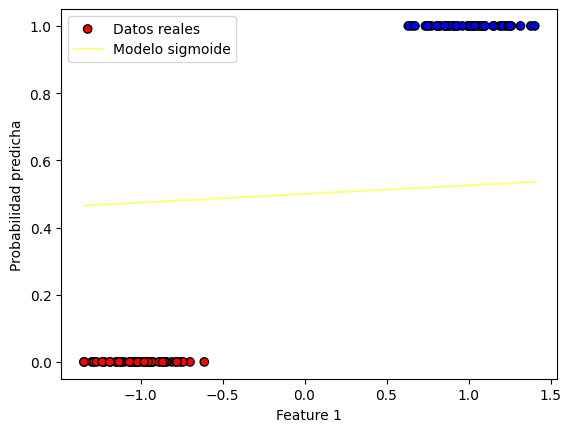

Iteracion: 21
Costo en la iteración 21: 0.6425245787570537
Valor del gradiente 21: [-3.24487555e-04 -4.77214440e-01]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [3.63499803e-05 1.07932224e-01]


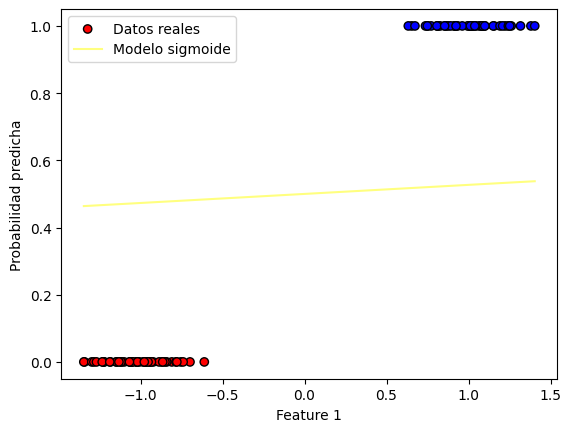

Iteracion: 22
Costo en la iteración 22: 0.6402502177176841
Valor del gradiente 22: [-3.38999040e-04 -4.75967158e-01]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [3.97399707e-05 1.12691895e-01]


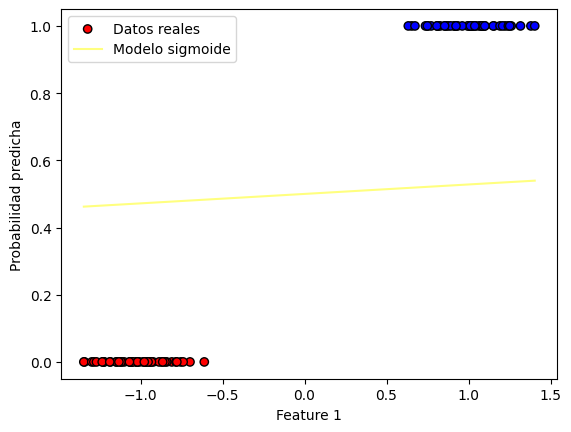

Iteracion: 23
Costo en la iteración 23: 0.6379877290204392
Valor del gradiente 23: [-3.53424839e-04 -4.74723511e-01]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [4.32742191e-05 1.17439130e-01]


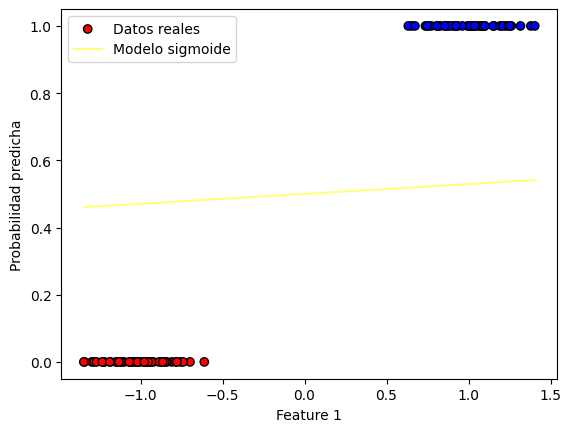

Iteracion: 24
Costo en la iteración 24: 0.6357370470906774
Valor del gradiente 24: [-3.67764981e-04 -4.73483503e-01]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [4.69518689e-05 1.22173966e-01]


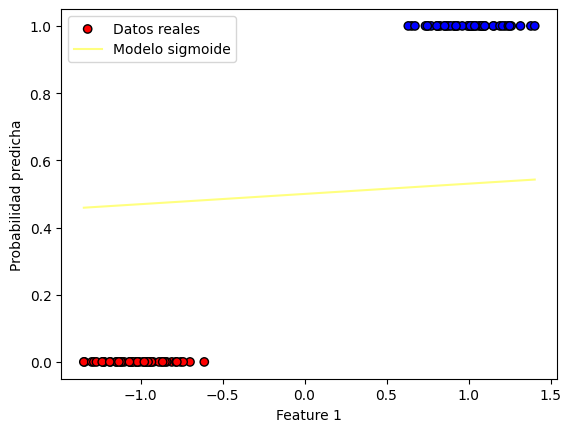

Iteracion: 25
Costo en la iteración 25: 0.6334981065893708
Valor del gradiente 25: [-3.82019507e-04 -4.72247138e-01]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [5.07720640e-05 1.26896437e-01]


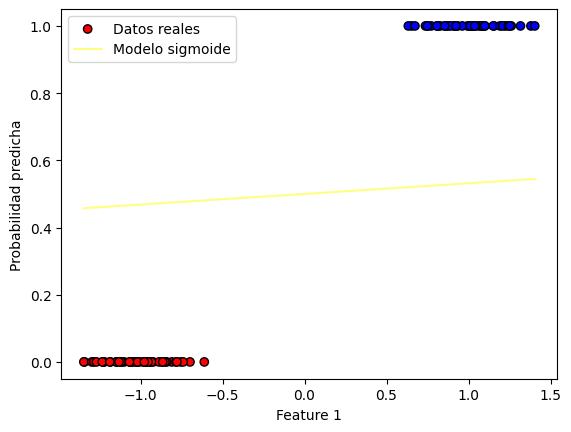

Iteracion: 26
Costo en la iteración 26: 0.6312708424152041
Valor del gradiente 26: [-3.96188464e-04 -4.71014419e-01]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [5.47339486e-05 1.31606581e-01]


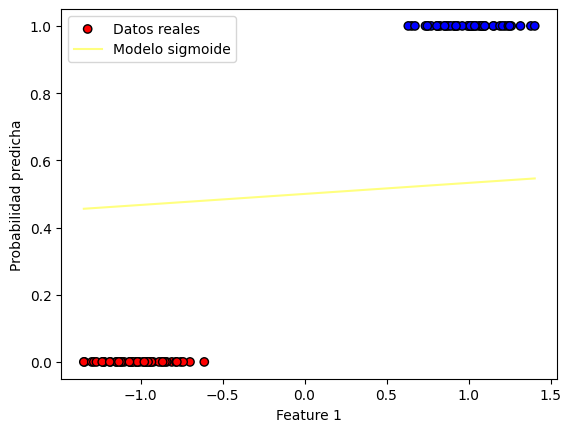

Iteracion: 27
Costo en la iteración 27: 0.629055189706607
Valor del gradiente 27: [-4.10271909e-04 -4.69785349e-01]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [5.88366677e-05 1.36304435e-01]


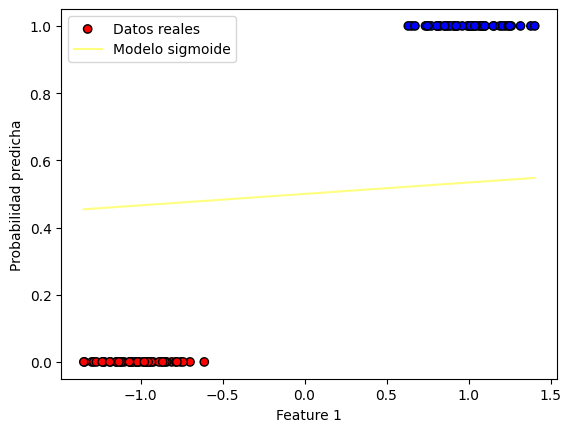

Iteracion: 28
Costo en la iteración 28: 0.6268510838437209
Valor del gradiente 28: [-4.24269907e-04 -4.68559931e-01]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [6.30793668e-05 1.40990034e-01]


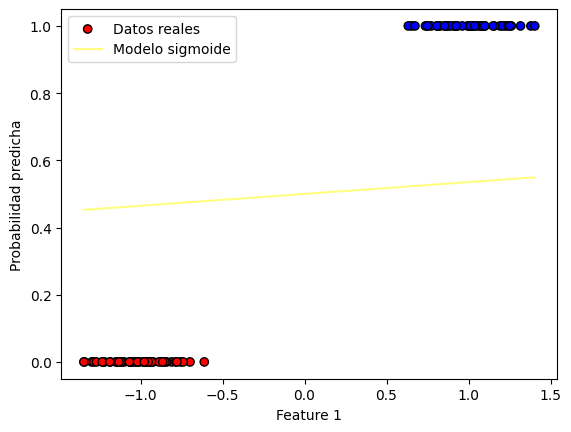

Iteracion: 29
Costo en la iteración 29: 0.6246584604503036
Valor del gradiente 29: [-4.38182530e-04 -4.67338168e-01]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [6.74611921e-05 1.45663416e-01]


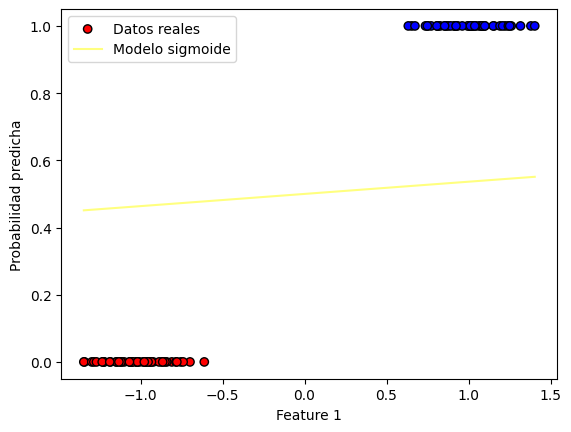

Iteracion: 30
Costo en la iteración 30: 0.6224772553955673
Valor del gradiente 30: [-4.52009860e-04 -4.66120061e-01]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [7.19812907e-05 1.50324616e-01]


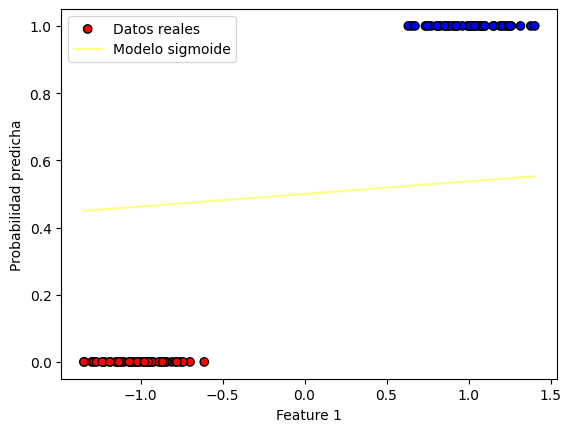

Iteracion: 31
Costo en la iteración 31: 0.6203074047959565
Valor del gradiente 31: [-0.00046575 -0.46490561]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [7.66388105e-05 1.54973672e-01]


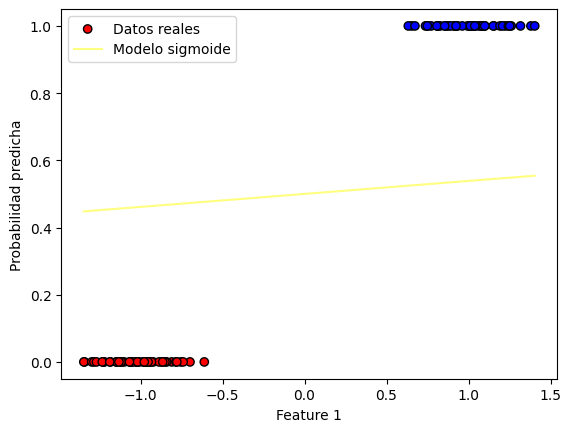

Iteracion: 32
Costo en la iteración 32: 0.6181488450168624
Valor del gradiente 32: [-0.00047941 -0.46369482]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [8.14329006e-05 1.59610621e-01]


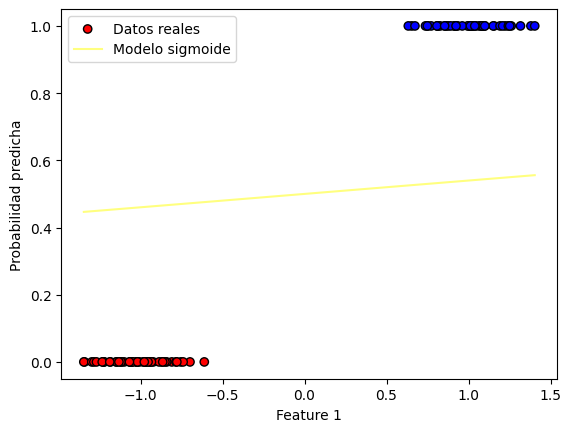

Iteracion: 33
Costo en la iteración 33: 0.616001512674277
Valor del gradiente 33: [-0.00049298 -0.4624877 ]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [8.63627107e-05 1.64235498e-01]


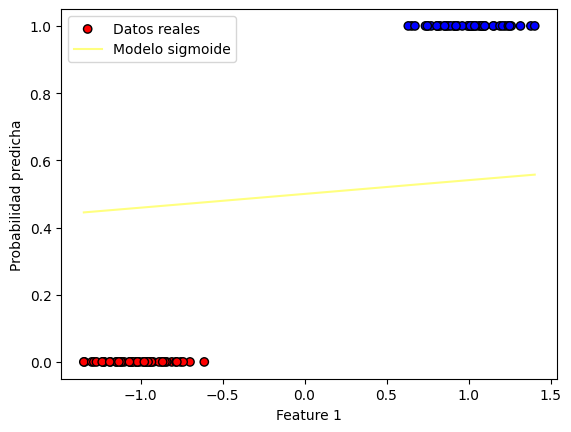

Iteracion: 34
Costo en la iteración 34: 0.6138653446363865
Valor del gradiente 34: [-0.00050647 -0.46128424]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [9.14273921e-05 1.68848340e-01]


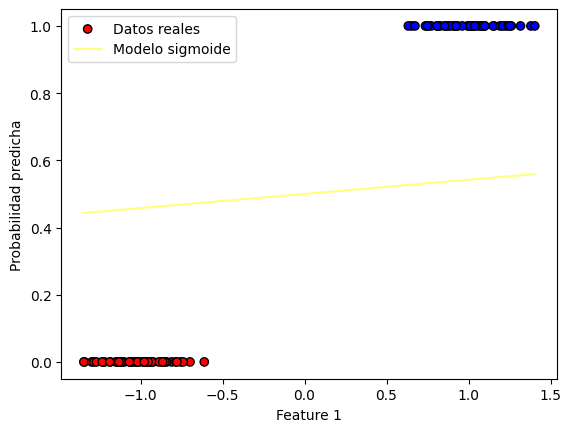

Iteracion: 35
Costo en la iteración 35: 0.6117402780251052
Valor del gradiente 35: [-0.00051987 -0.46008444]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [9.66260970e-05 1.73449184e-01]


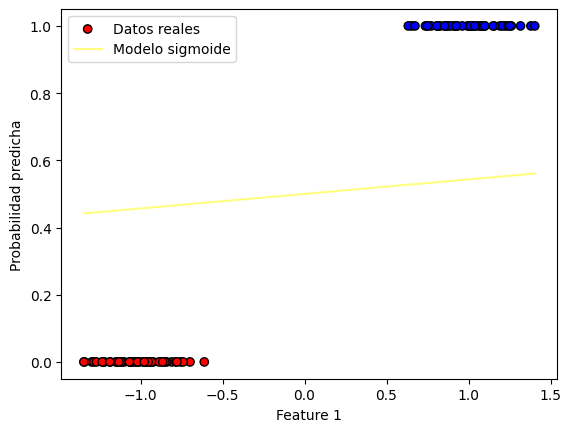

Iteracion: 36
Costo en la iteración 36: 0.6096262502175511
Valor del gradiente 36: [-0.00053319 -0.4588883 ]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [1.01957979e-04 1.78038067e-01]


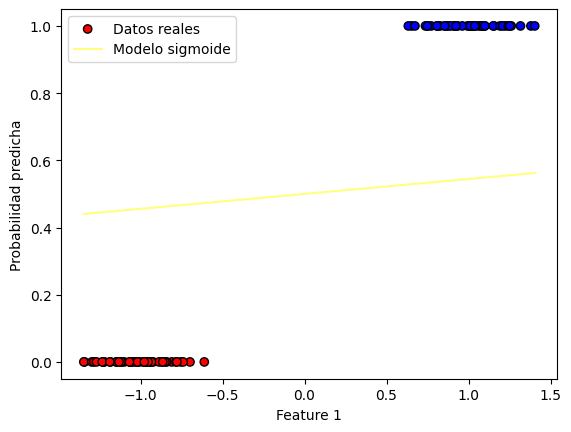

Iteracion: 37
Costo en la iteración 37: 0.6075231988474631
Valor del gradiente 37: [-0.00054642 -0.45769584]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [1.07422192e-04 1.82615026e-01]


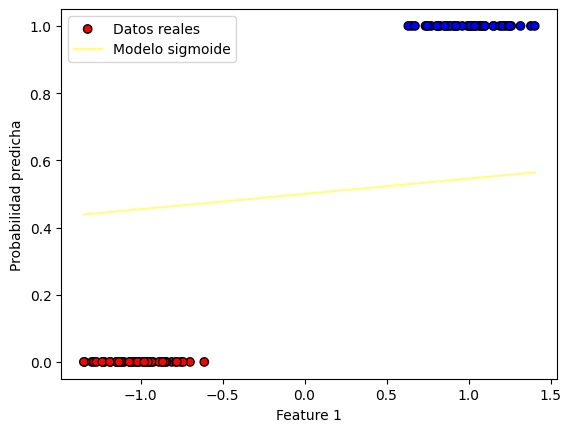

Iteracion: 38
Costo en la iteración 38: 0.6054310618065617
Valor del gradiente 38: [-0.00055957 -0.45650703]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [1.13017894e-04 1.87180096e-01]


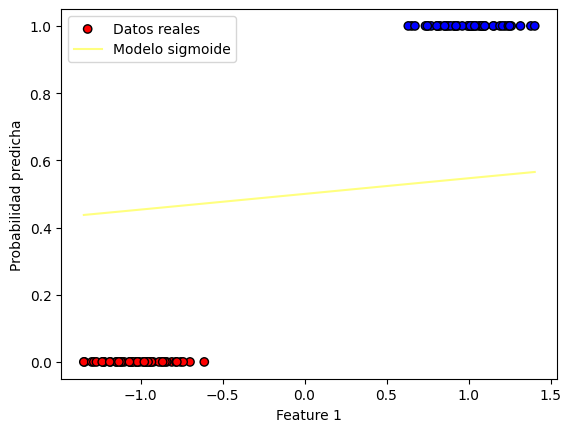

Iteracion: 39
Costo en la iteración 39: 0.6033497772458528
Valor del gradiente 39: [-0.00057263 -0.4553219 ]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [1.18744242e-04 1.91733315e-01]


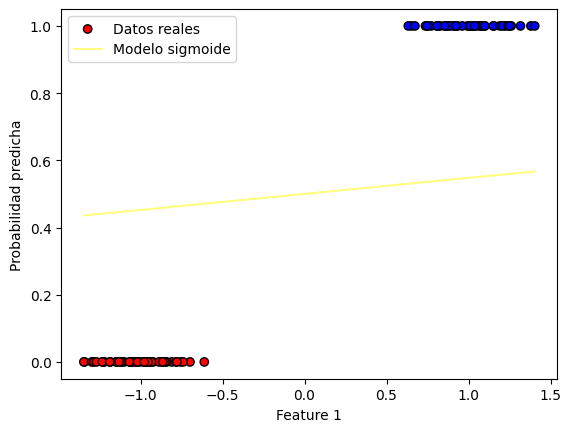

Iteracion: 40
Costo en la iteración 40: 0.6012792835768767
Valor del gradiente 40: [-0.00058562 -0.45414043]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [1.24600394e-04 1.96274719e-01]


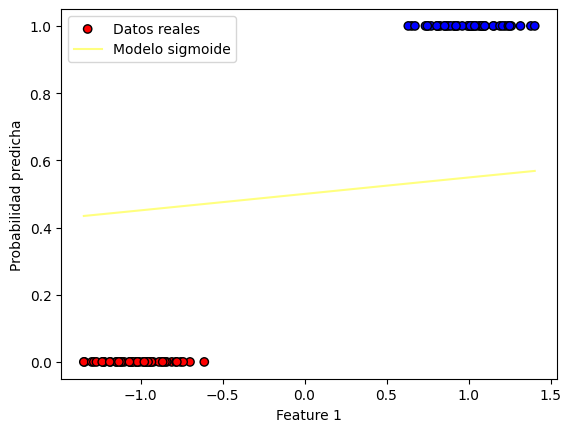

Iteracion: 41
Costo en la iteración 41: 0.5992195194729019
Valor del gradiente 41: [-0.00059851 -0.45296263]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [1.30585513e-04 2.00804346e-01]


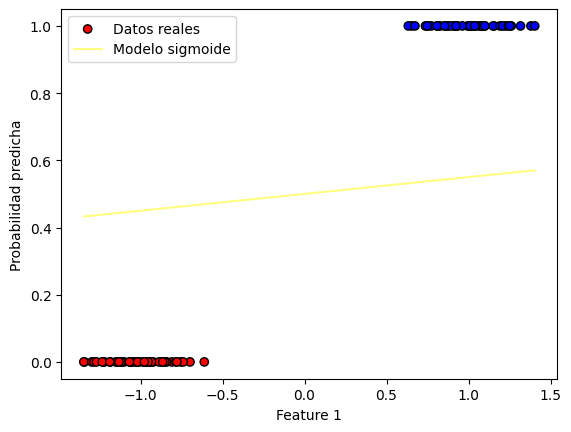

Iteracion: 42
Costo en la iteración 42: 0.5971704238700659
Valor del gradiente 42: [-0.00061132 -0.45178849]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [1.3669876e-04 2.0532223e-01]


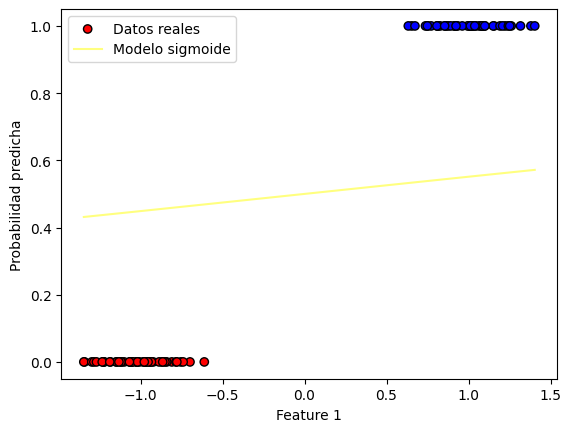

Iteracion: 43
Costo en la iteración 43: 0.5951319359684616
Valor del gradiente 43: [-0.00062405 -0.45061802]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [1.42939299e-04 2.09828411e-01]


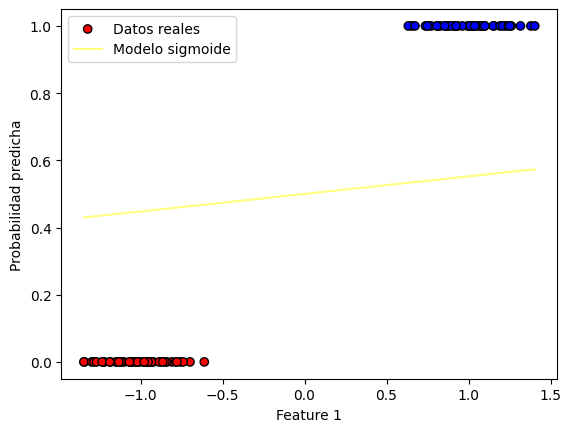

Iteracion: 44
Costo en la iteración 44: 0.5931039952331727
Valor del gradiente 44: [-0.0006367  -0.44945121]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [1.49306297e-04 2.14322923e-01]


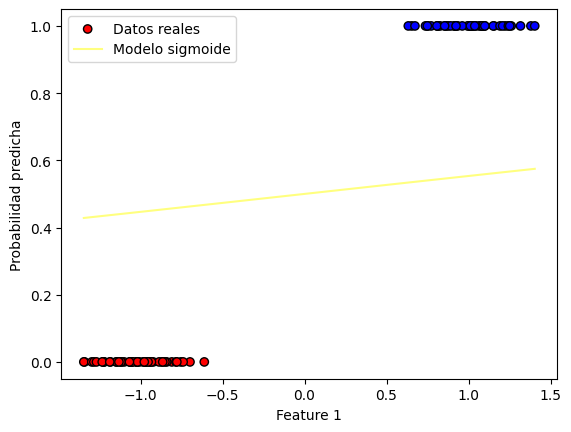

Iteracion: 45
Costo en la iteración 45: 0.5910865413952577
Valor del gradiente 45: [-0.00064926 -0.44828806]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [1.55798921e-04 2.18805803e-01]


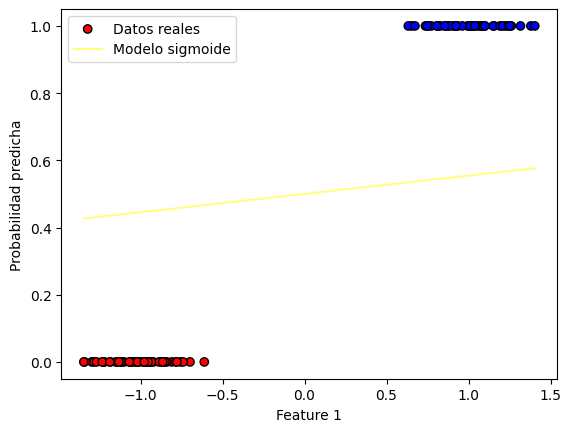

Iteracion: 46
Costo en la iteración 46: 0.5890795144526816
Valor del gradiente 46: [-0.00066174 -0.44712857]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [1.62416342e-04 2.23277089e-01]


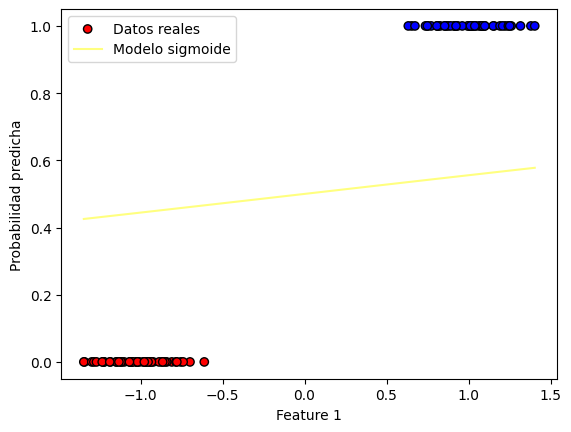

Iteracion: 47
Costo en la iteración 47: 0.5870828546712001
Valor del gradiente 47: [-0.00067414 -0.44597275]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [1.69157730e-04 2.27736817e-01]


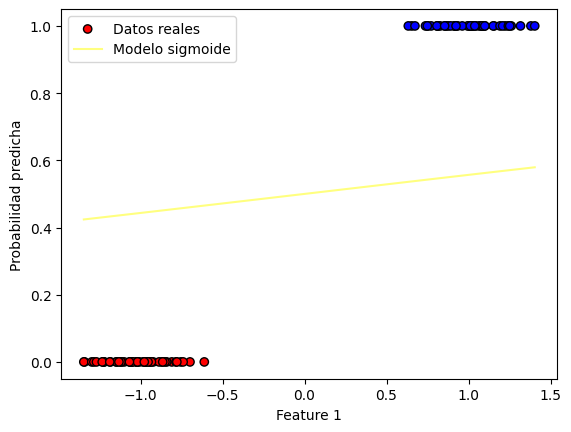

Iteracion: 48
Costo en la iteración 48: 0.5850965025851933
Valor del gradiente 48: [-0.00068645 -0.44482058]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [1.76022259e-04 2.32185022e-01]


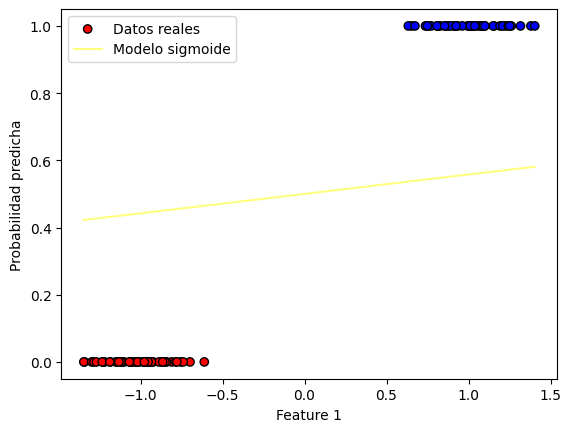

Iteracion: 49
Costo en la iteración 49: 0.5831203989984514
Valor del gradiente 49: [-0.00069868 -0.44367207]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [1.83009106e-04 2.36621743e-01]


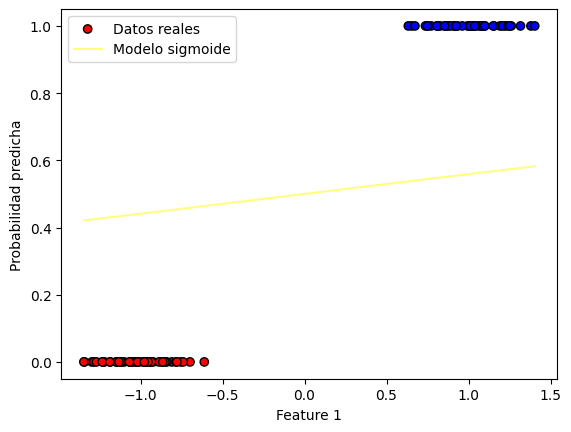

Iteracion: 50
Costo en la iteración 50: 0.581154484984912
Valor del gradiente 50: [-0.00071083 -0.44252721]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [1.90117447e-04 2.41047015e-01]


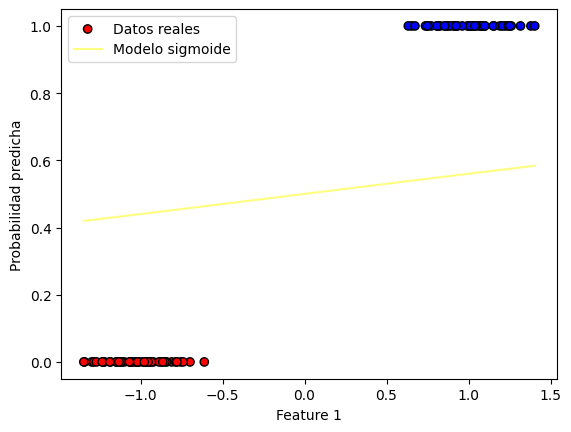

Iteracion: 51
Costo en la iteración 51: 0.5791987018893537
Valor del gradiente 51: [-0.0007229  -0.44138601]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [1.97346464e-04 2.45460875e-01]


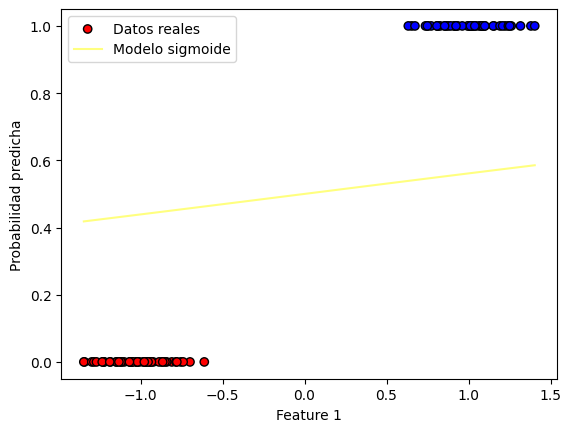

Iteracion: 52
Costo en la iteración 52: 0.5772529913280396
Valor del gradiente 52: [-0.00073489 -0.44024845]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [2.04695337e-04 2.49863360e-01]


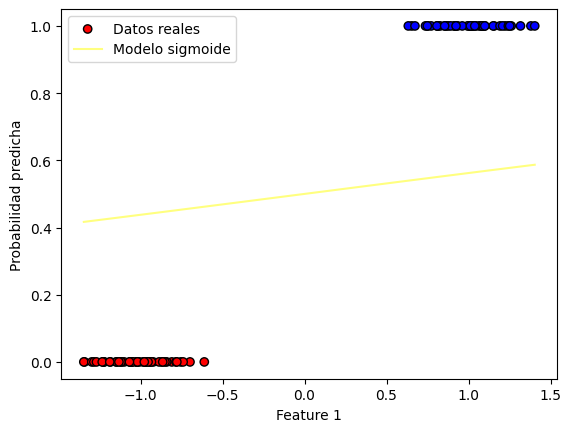

Iteracion: 53
Costo en la iteración 53: 0.575317295189319
Valor del gradiente 53: [-0.00074679 -0.43911454]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [2.12163252e-04 2.54254505e-01]


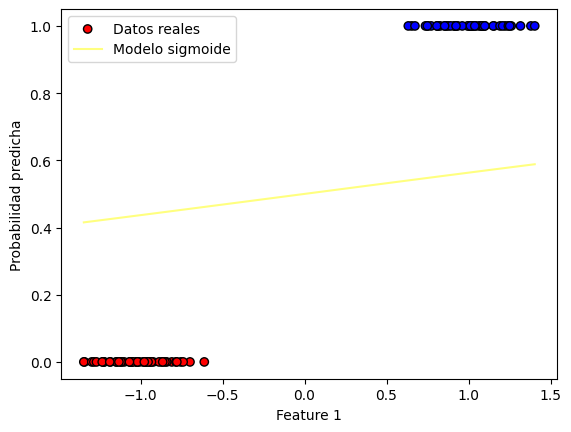

Iteracion: 54
Costo en la iteración 54: 0.5733915556341828
Valor del gradiente 54: [-0.00075861 -0.43798427]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [2.19749395e-04 2.58634348e-01]


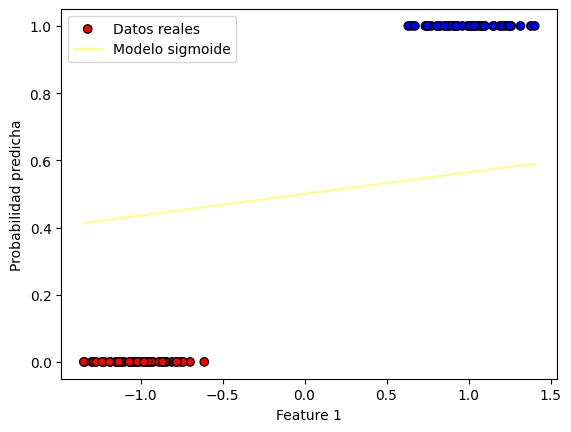

Iteracion: 55
Costo en la iteración 55: 0.5714757150967761
Valor del gradiente 55: [-0.00077036 -0.43685765]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [2.27452956e-04 2.63002924e-01]


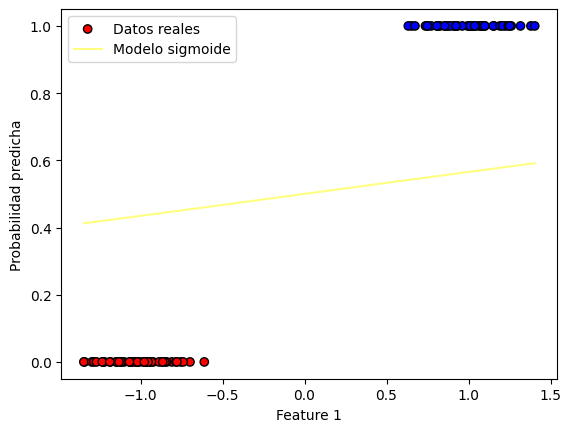

Iteracion: 56
Costo en la iteración 56: 0.5695697162848672
Valor del gradiente 56: [-0.00078202 -0.43573466]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [2.35273126e-04 2.67360271e-01]


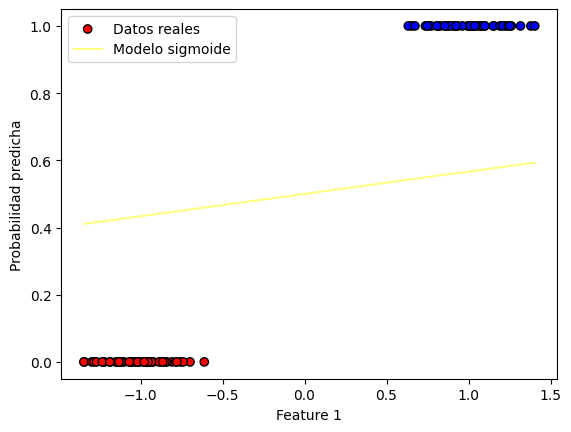

Iteracion: 57
Costo en la iteración 57: 0.567673502180276
Valor del gradiente 57: [-0.0007936 -0.4346153]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [2.43209098e-04 2.71706424e-01]


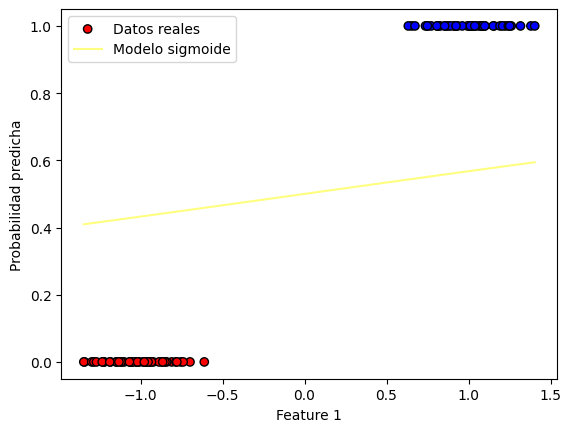

Iteracion: 58
Costo en la iteración 58: 0.5657870160392586
Valor del gradiente 58: [-0.0008051  -0.43349958]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [2.5126007e-04 2.7604142e-01]


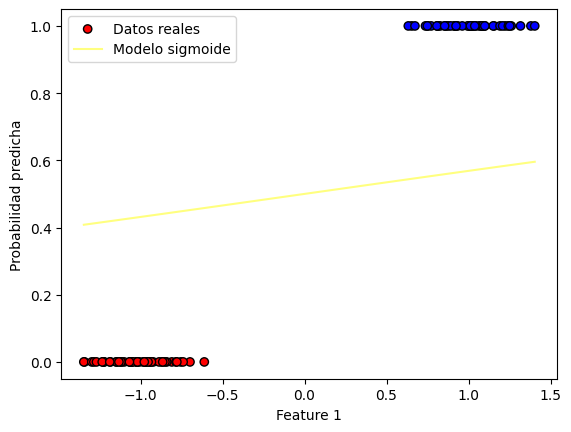

Iteracion: 59
Costo en la iteración 59: 0.5639102013928534
Valor del gradiente 59: [-0.00081652 -0.43238748]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [2.59425240e-04 2.80365295e-01]


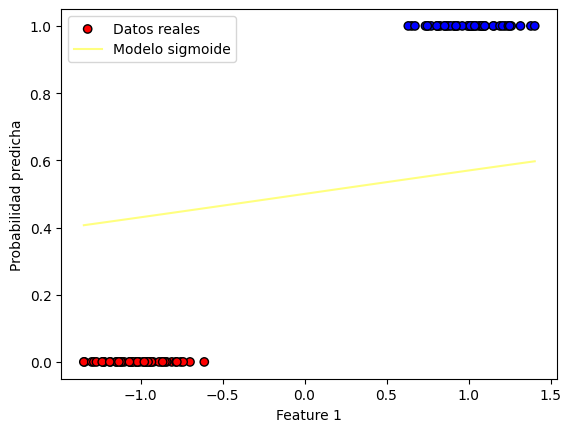

Iteracion: 60
Costo en la iteración 60: 0.562043002047186
Valor del gradiente 60: [-0.00082786 -0.43127901]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [2.67703810e-04 2.84678085e-01]


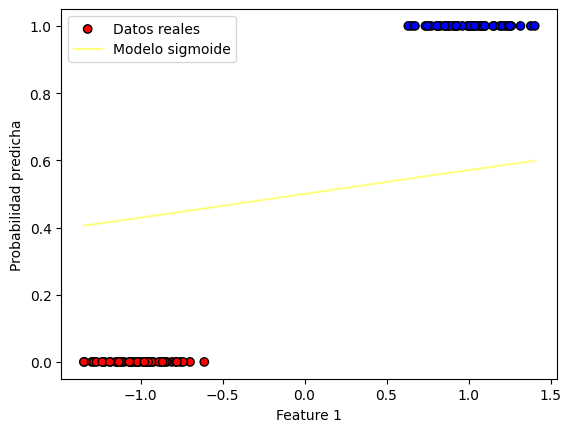

Iteracion: 61
Costo en la iteración 61: 0.5601853620837354
Valor del gradiente 61: [-0.00083912 -0.43017416]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [2.76094983e-04 2.88979826e-01]


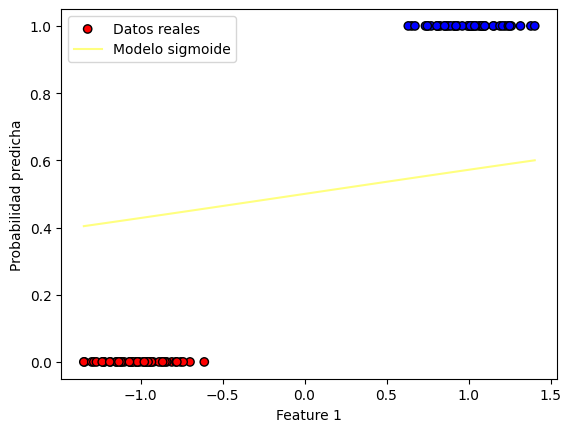

Iteracion: 62
Costo en la iteración 62: 0.5583372258595618
Valor del gradiente 62: [-0.0008503  -0.42907292]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [2.84597968e-04 2.93270555e-01]


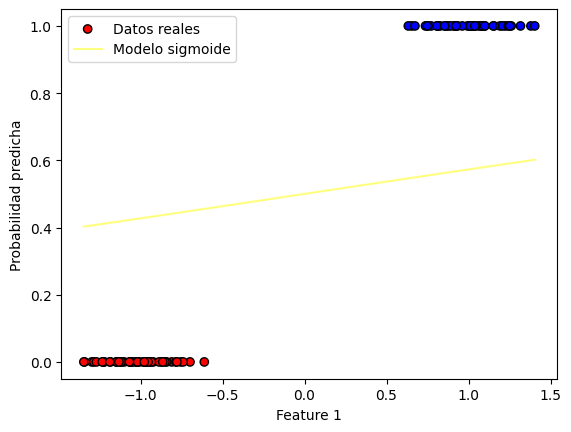

Iteracion: 63
Costo en la iteración 63: 0.5564985380074966
Valor del gradiente 63: [-0.0008614  -0.42797529]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [2.93211972e-04 2.97550308e-01]


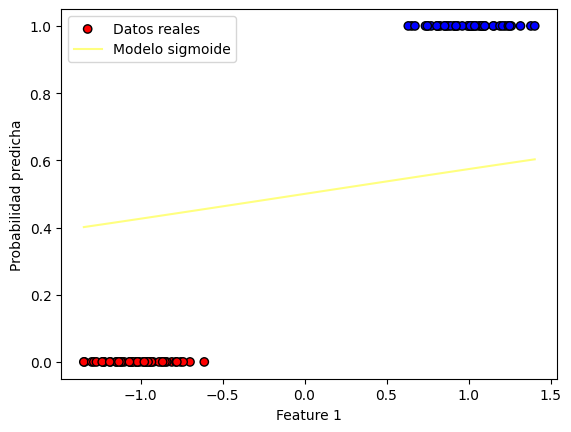

Iteracion: 64
Costo en la iteración 64: 0.5546692434362943
Valor del gradiente 64: [-0.00087242 -0.42688126]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00030194 0.30181912]


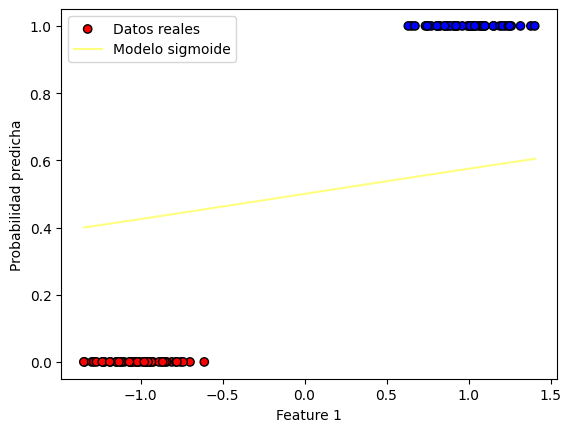

Iteracion: 65
Costo en la iteración 65: 0.5528492873307501
Valor del gradiente 65: [-0.00088337 -0.42579084]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00031077 0.30607703]


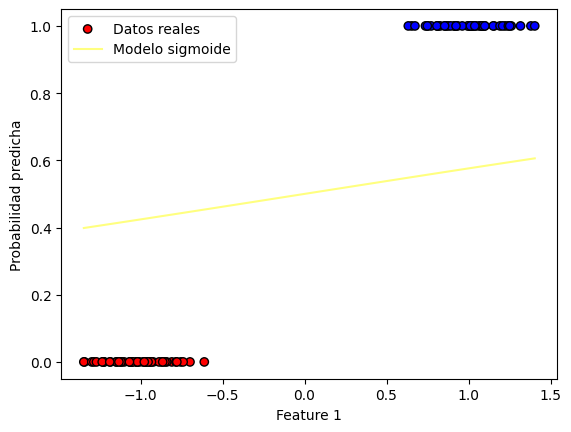

Iteracion: 66
Costo en la iteración 66: 0.5510386151517801
Valor del gradiente 66: [-0.00089423 -0.42470402]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00031971 0.31032407]


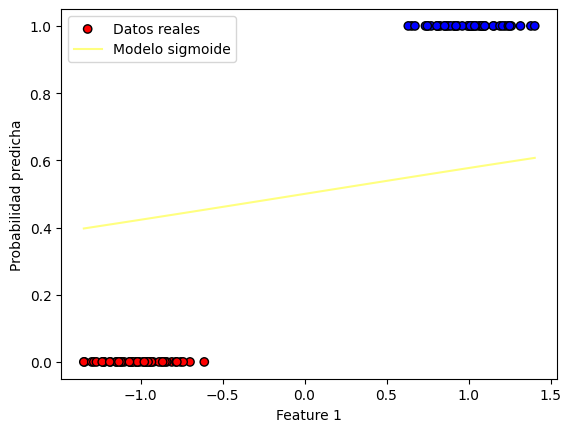

Iteracion: 67
Costo en la iteración 67: 0.5492371726364669
Valor del gradiente 67: [-0.00090502 -0.42362078]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00032876 0.31456028]


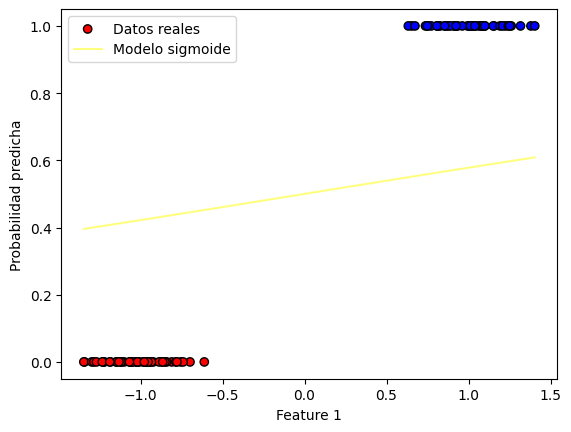

Iteracion: 68
Costo en la iteración 68: 0.547444905798072
Valor del gradiente 68: [-0.00091573 -0.42254114]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00033792 0.31878569]


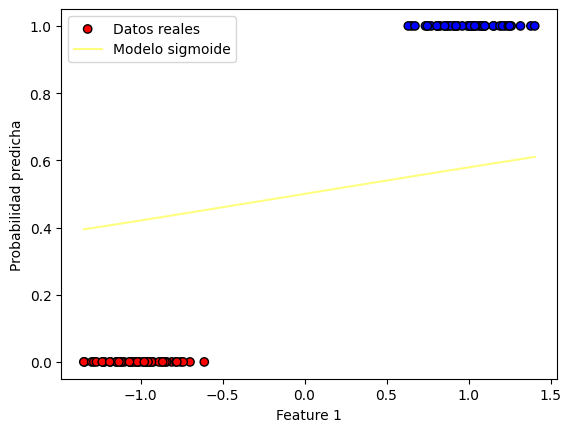

Iteracion: 69
Costo en la iteración 69: 0.5456617609260127
Valor del gradiente 69: [-0.00092637 -0.42146507]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00034718 0.32300034]


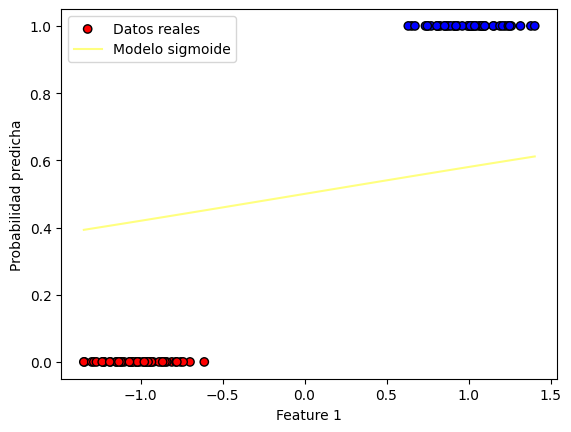

Iteracion: 70
Costo en la iteración 70: 0.5438876845858084
Valor del gradiente 70: [-0.00093692 -0.42039259]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00035655 0.32720427]


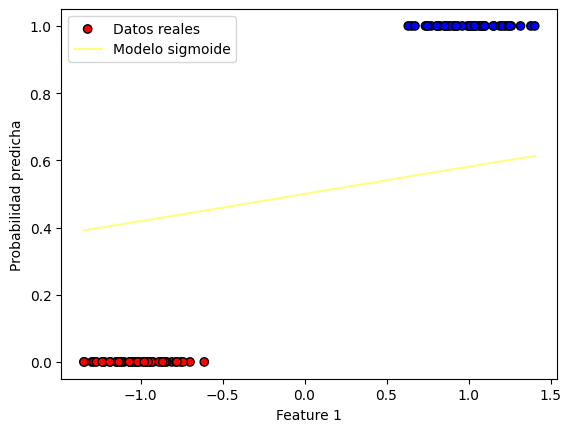

Iteracion: 71
Costo en la iteración 71: 0.5421226236189918
Valor del gradiente 71: [-0.0009474  -0.41932367]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00036603 0.3313975 ]


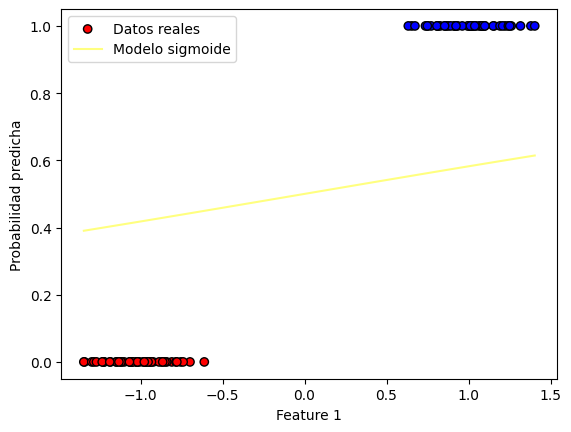

Iteracion: 72
Costo en la iteración 72: 0.5403665251429911
Valor del gradiente 72: [-0.00095781 -0.41825832]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.0003756  0.33558009]


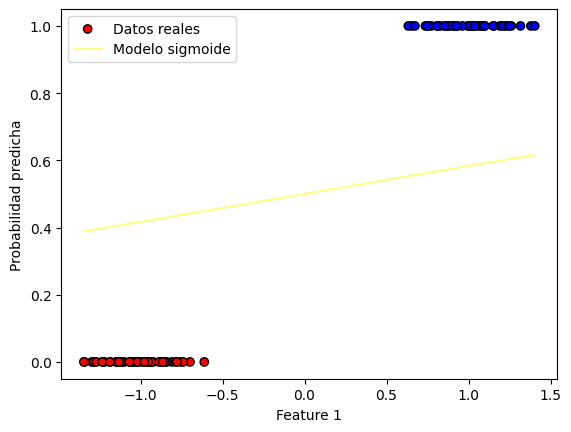

Iteracion: 73
Costo en la iteración 73: 0.5386193365509805
Valor del gradiente 73: [-0.00096813 -0.41719652]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00038529 0.33975205]


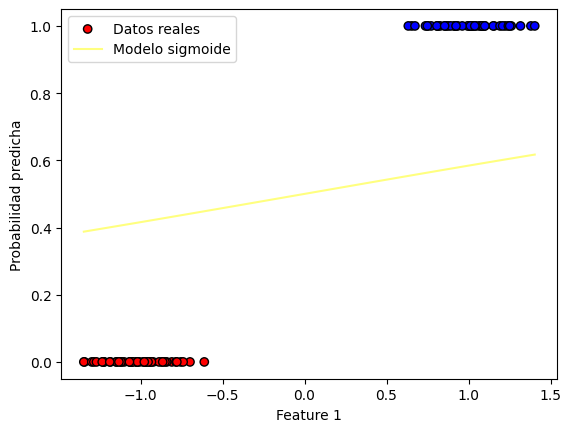

Iteracion: 74
Costo en la iteración 74: 0.5368810055116987
Valor del gradiente 74: [-0.00097838 -0.41613828]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00039507 0.34391343]


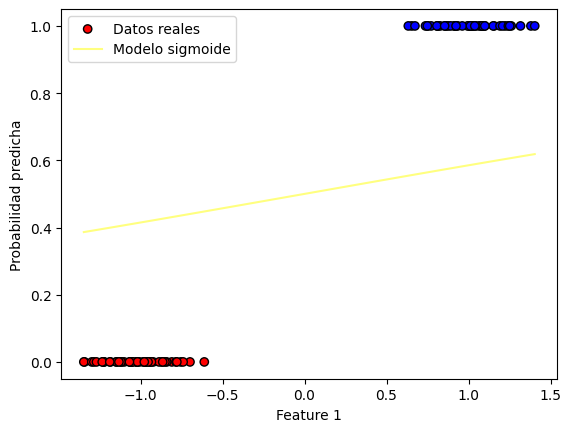

Iteracion: 75
Costo en la iteración 75: 0.5351514799692411
Valor del gradiente 75: [-0.00098856 -0.41508359]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00040496 0.34806427]


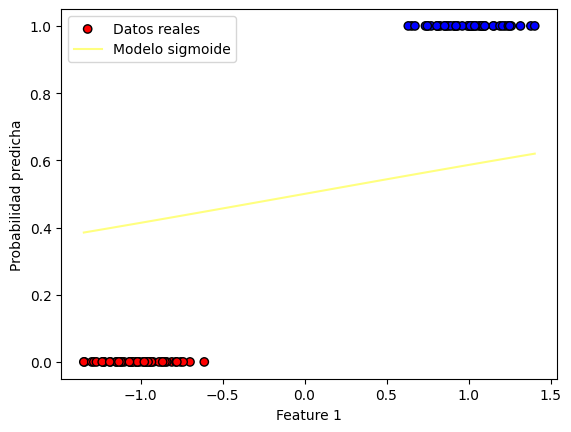

Iteracion: 76
Costo en la iteración 76: 0.5334307081428186
Valor del gradiente 76: [-0.00099866 -0.41403244]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00041494 0.35220459]


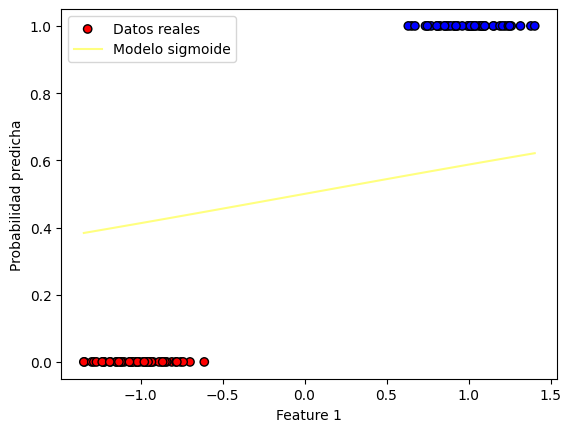

Iteracion: 77
Costo en la iteración 77: 0.5317186385264924
Valor del gradiente 77: [-0.00100869 -0.41298483]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00042503 0.35633444]


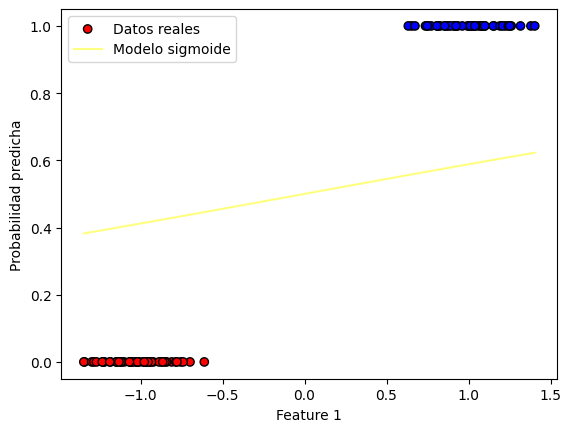

Iteracion: 78
Costo en la iteración 78: 0.5300152198888783
Valor del gradiente 78: [-0.00101864 -0.41194074]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00043522 0.36045385]


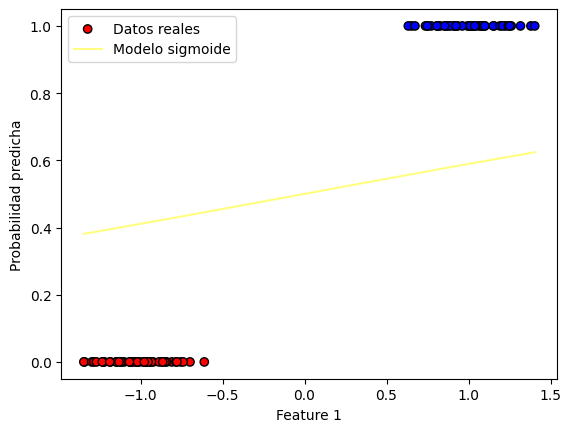

Iteracion: 79
Costo en la iteración 79: 0.5283204012728236
Valor del gradiente 79: [-0.00102851 -0.41090018]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.0004455  0.36456285]


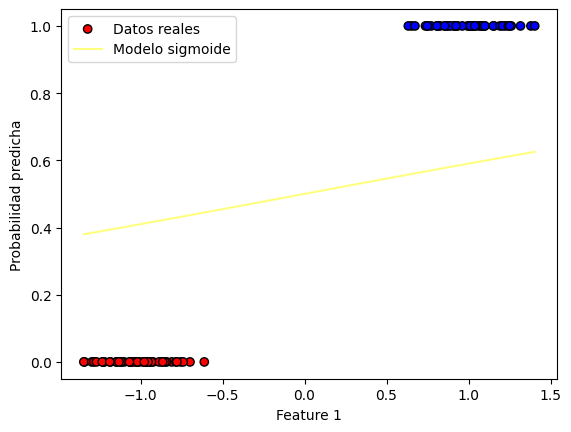

Iteracion: 80
Costo en la iteración 80: 0.5266341319950598
Valor del gradiente 80: [-0.00103831 -0.40986313]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00045588 0.36866148]


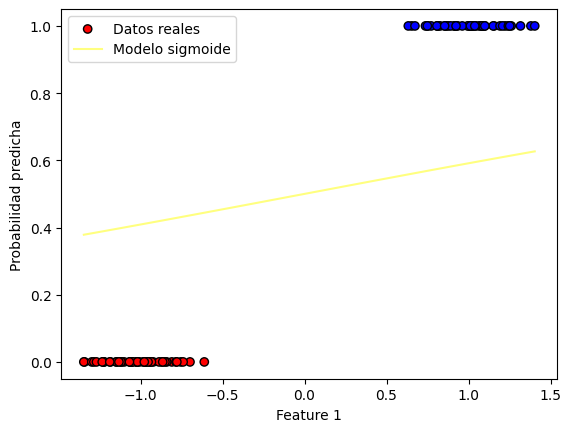

Iteracion: 81
Costo en la iteración 81: 0.5249563616458263
Valor del gradiente 81: [-0.00104804 -0.40882959]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00046636 0.37274978]


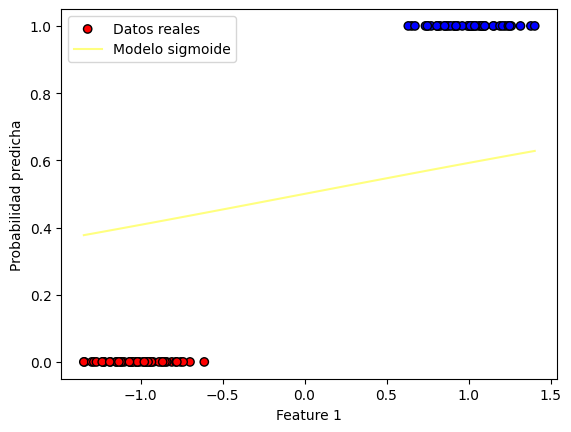

Iteracion: 82
Costo en la iteración 82: 0.5232870400884714
Valor del gradiente 82: [-0.0010577  -0.40779956]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00047694 0.37682777]


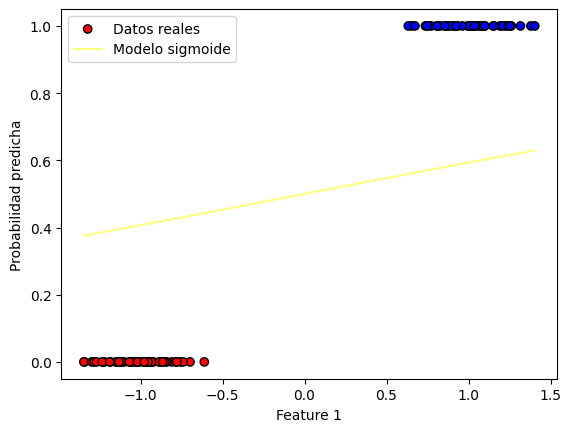

Iteracion: 83
Costo en la iteración 83: 0.5216261174590267
Valor del gradiente 83: [-0.00106728 -0.40677302]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00048761 0.3808955 ]


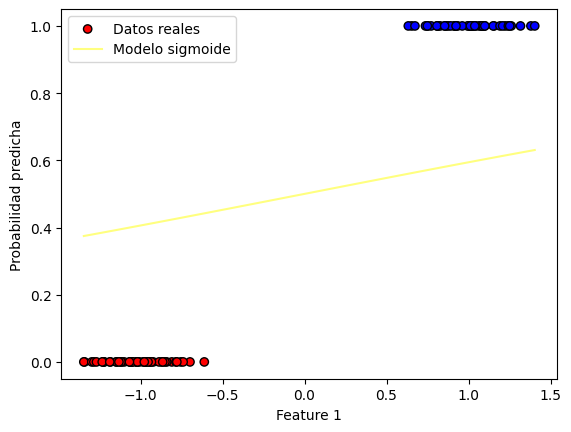

Iteracion: 84
Costo en la iteración 84: 0.5199735441657574
Valor del gradiente 84: [-0.00107679 -0.40574997]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00049838 0.384953  ]


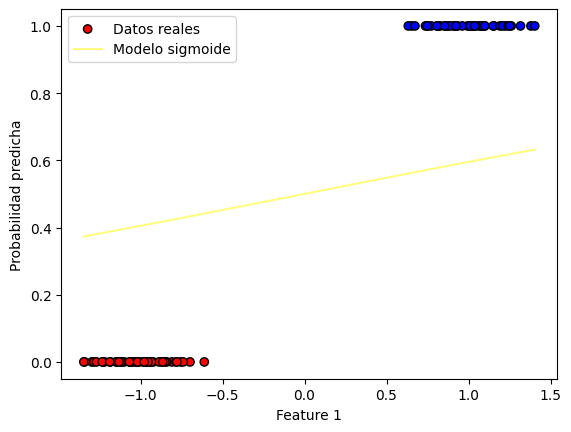

Iteracion: 85
Costo en la iteración 85: 0.5183292708886902
Valor del gradiente 85: [-0.00108623 -0.4047304 ]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00050924 0.38900031]


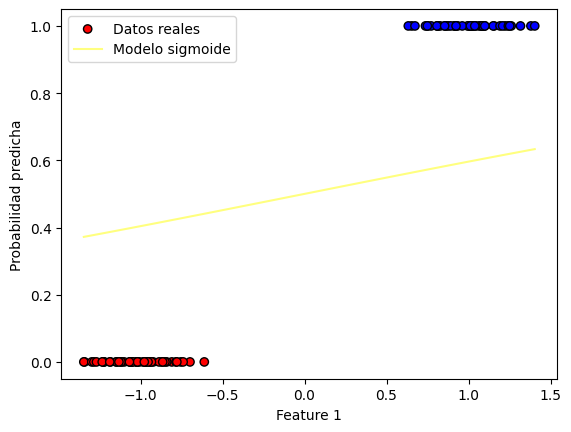

Iteracion: 86
Costo en la iteración 86: 0.5166932485791164
Valor del gradiente 86: [-0.00109559 -0.40371431]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.0005202  0.39303745]


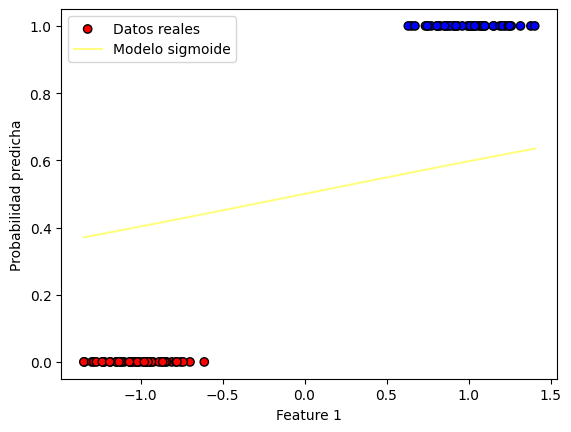

Iteracion: 87
Costo en la iteración 87: 0.515065428459074
Valor del gradiente 87: [-0.00110488 -0.40270168]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00053125 0.39706447]


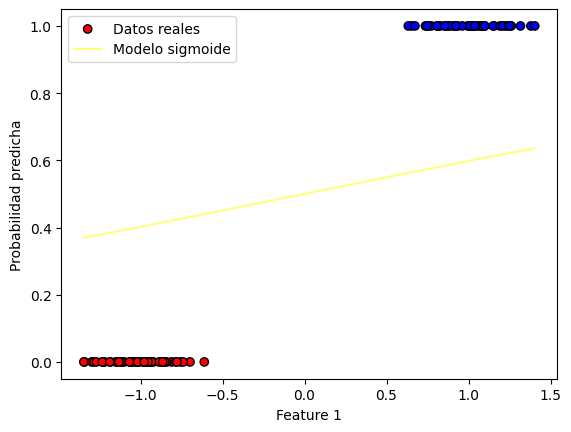

Iteracion: 88
Costo en la iteración 88: 0.5134457620208062
Valor del gradiente 88: [-0.00111411 -0.40169252]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00054239 0.40108139]


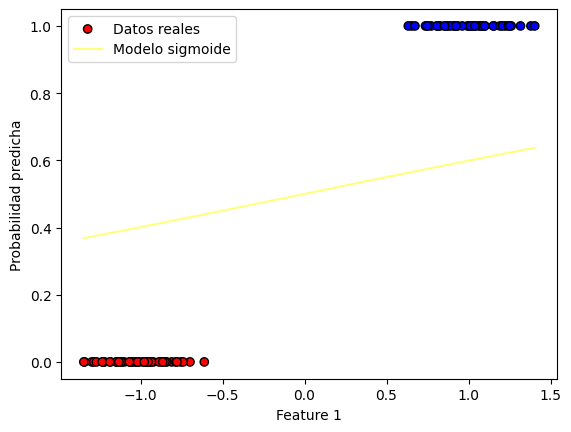

Iteracion: 89
Costo en la iteración 89: 0.5118342010261996
Valor del gradiente 89: [-0.00112326 -0.4006868 ]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00055362 0.40508826]


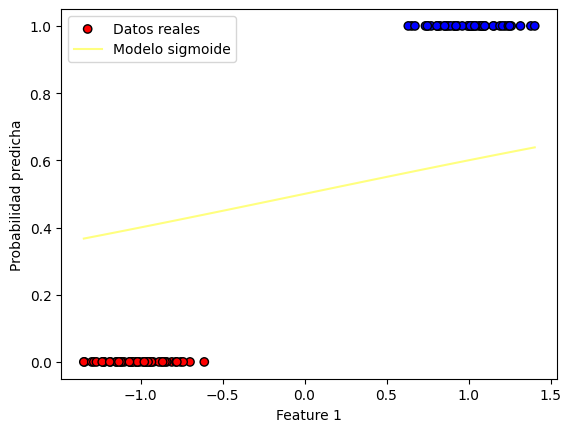

Iteracion: 90
Costo en la iteración 90: 0.5102306975062012
Valor del gradiente 90: [-0.00113234 -0.39968453]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00056495 0.40908511]


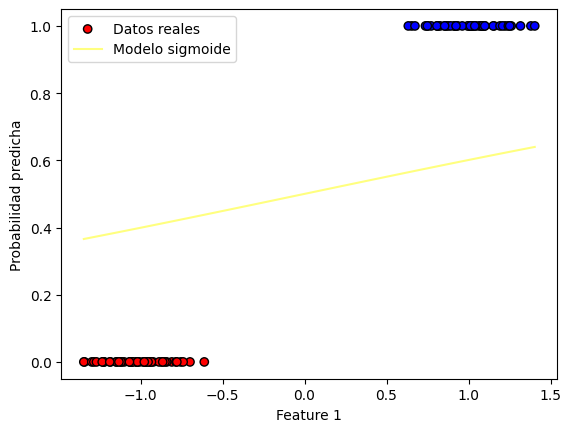

Iteracion: 91
Costo en la iteración 91: 0.5086352037602146
Valor del gradiente 91: [-0.00114134 -0.3986857 ]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00057636 0.41307196]


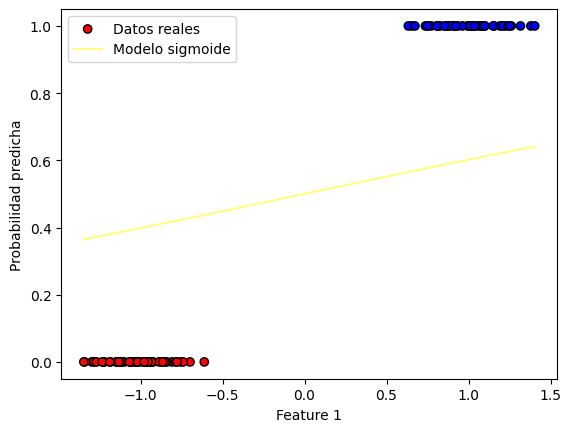

Iteracion: 92
Costo en la iteración 92: 0.5070476723554769
Valor del gradiente 92: [-0.00115028 -0.3976903 ]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00058786 0.41704887]


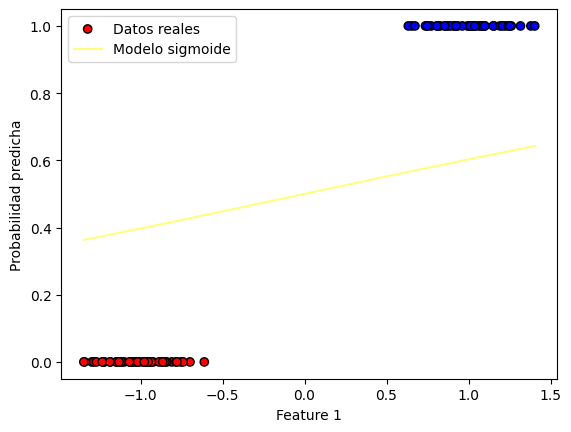

Iteracion: 93
Costo en la iteración 93: 0.505468056126415
Valor del gradiente 93: [-0.00115915 -0.39669832]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00059945 0.42101585]


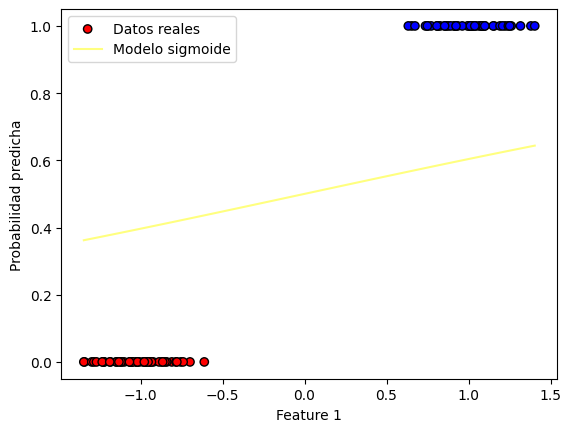

Iteracion: 94
Costo en la iteración 94: 0.5038963081739846
Valor del gradiente 94: [-0.00116795 -0.39570976]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00061113 0.42497295]


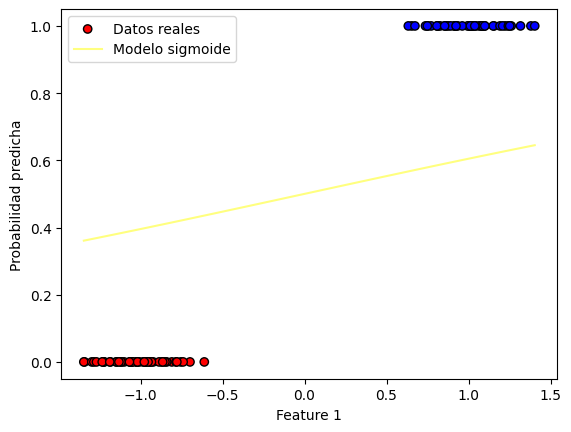

Iteracion: 95
Costo en la iteración 95: 0.5023323818649894
Valor del gradiente 95: [-0.00117668 -0.3947246 ]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.0006229  0.42892019]


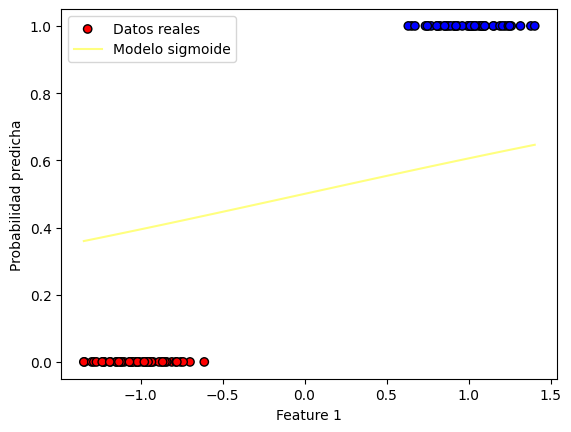

Iteracion: 96
Costo en la iteración 96: 0.5007762308313836
Valor del gradiente 96: [-0.00118535 -0.39374284]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00063475 0.43285762]


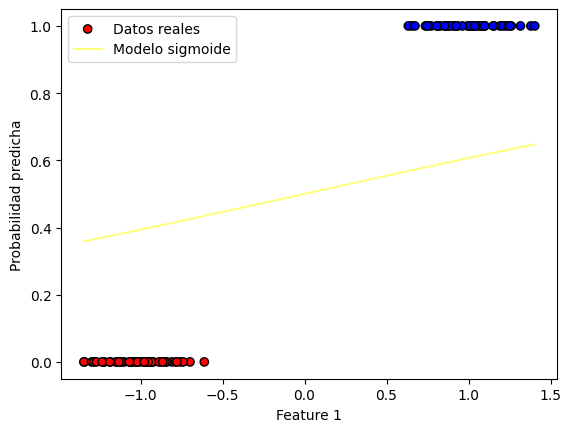

Iteracion: 97
Costo en la iteración 97: 0.49922780896955554
Valor del gradiente 97: [-0.00119394 -0.39276446]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00064669 0.43678527]


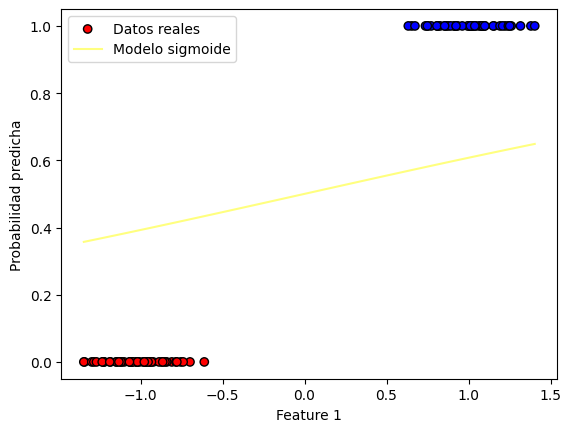

Iteracion: 98
Costo en la iteración 98: 0.49768707043959637
Valor del gradiente 98: [-0.00120246 -0.39178947]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00065872 0.44070316]


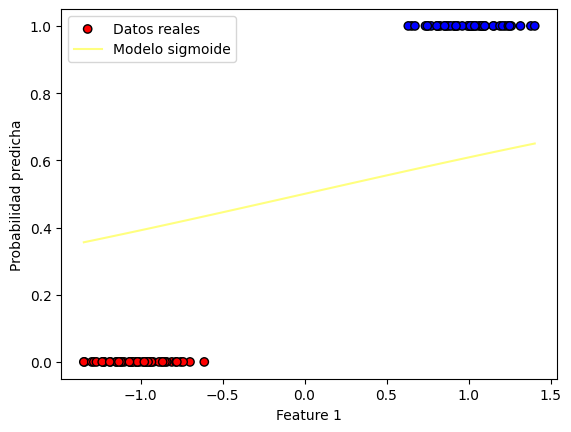

Iteracion: 99
Costo en la iteración 99: 0.49615396966454944
Valor del gradiente 99: [-0.00121092 -0.39081786]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00067083 0.44461134]


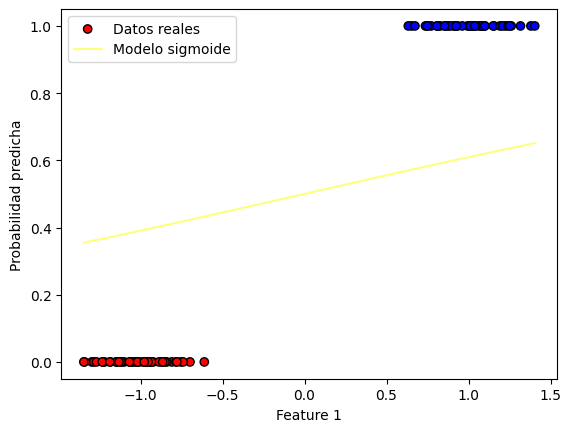

Iteracion: 100
Costo en la iteración 100: 0.4946284613296468
Valor del gradiente 100: [-0.00121931 -0.38984961]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00068302 0.44850984]


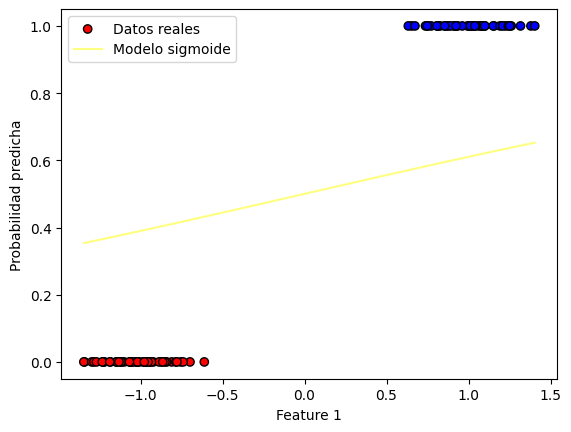

Iteracion: 101
Costo en la iteración 101: 0.49311050038152693
Valor del gradiente 101: [-0.00122764 -0.38888471]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.0006953  0.45239868]


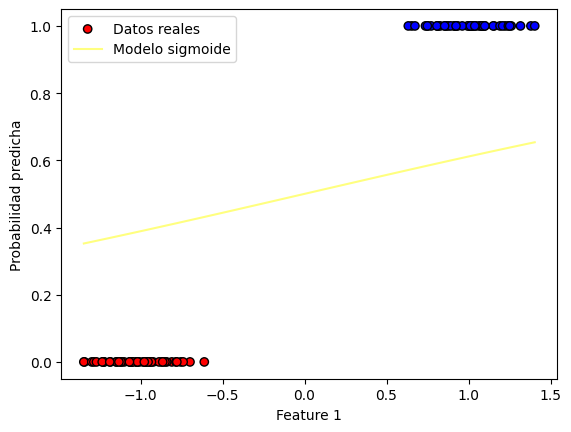

Iteracion: 102
Costo en la iteración 102: 0.49160004202744073
Valor del gradiente 102: [-0.00123589 -0.38792317]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00070766 0.45627791]


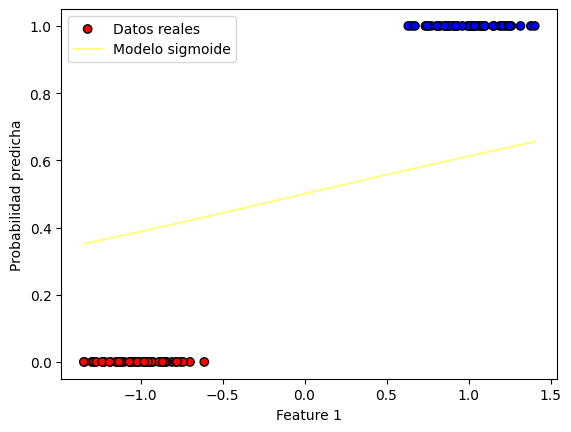

Iteracion: 103
Costo en la iteración 103: 0.49009704173443946
Valor del gradiente 103: [-0.00124408 -0.38696496]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.0007201  0.46014756]


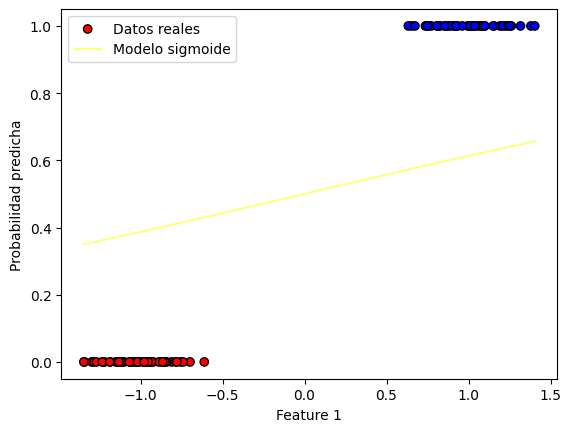

Iteracion: 104
Costo en la iteración 104: 0.48860145522855114
Valor del gradiente 104: [-0.00125221 -0.38601009]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00073262 0.46400766]


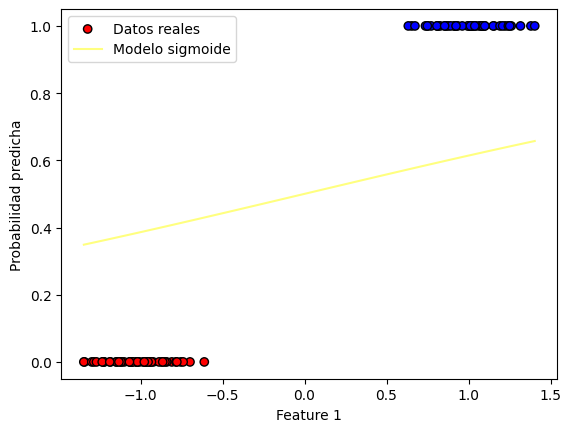

Iteracion: 105
Costo en la iteración 105: 0.4871132384939412
Valor del gradiente 105: [-0.00126027 -0.38505853]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00074522 0.46785825]


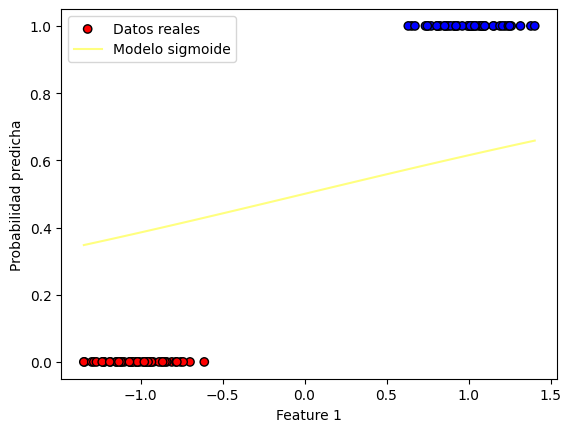

Iteracion: 106
Costo en la iteración 106: 0.48563234777206093
Valor del gradiente 106: [-0.00126826 -0.38411029]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.0007579  0.47169935]


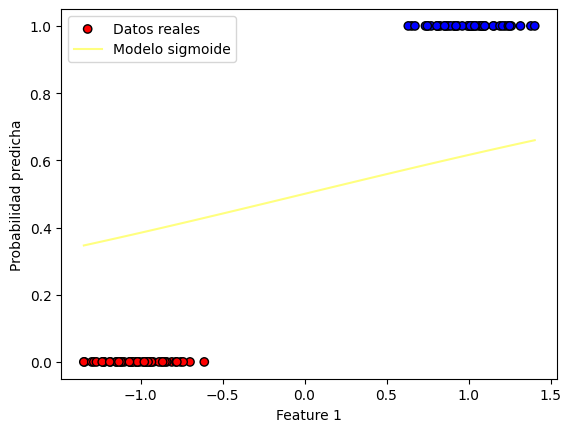

Iteracion: 107
Costo en la iteración 107: 0.48415873956078204
Valor del gradiente 107: [-0.00127619 -0.38316536]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00077067 0.47553101]


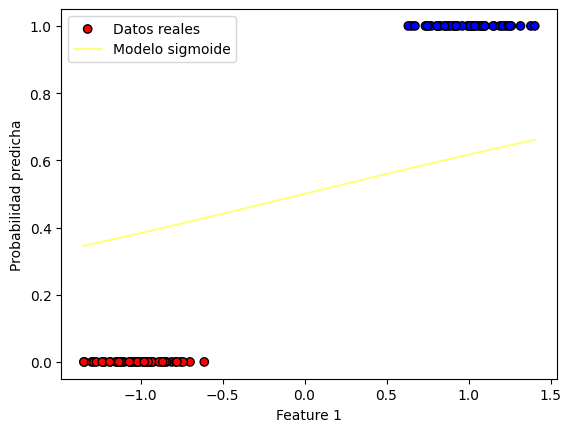

Iteracion: 108
Costo en la iteración 108: 0.48269237061351966
Valor del gradiente 108: [-0.00128405 -0.38222372]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00078351 0.47935324]


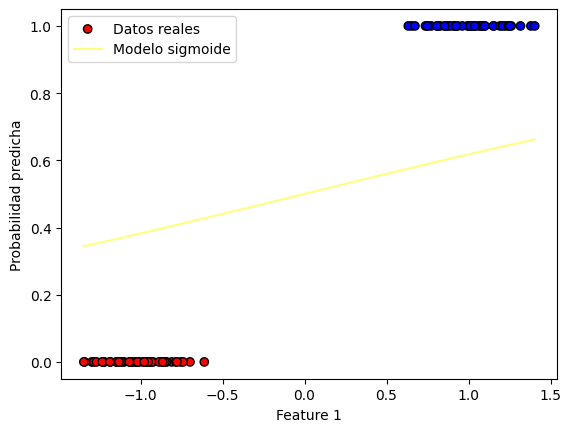

Iteracion: 109
Costo en la iteración 109: 0.4812331979383418
Valor del gradiente 109: [-0.00129185 -0.38128537]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00079642 0.4831661 ]


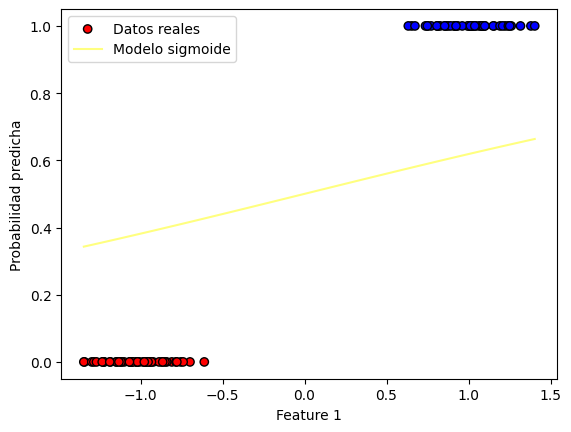

Iteracion: 110
Costo en la iteración 110: 0.47978117879706816
Valor del gradiente 110: [-0.00129959 -0.3803503 ]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00080942 0.4869696 ]


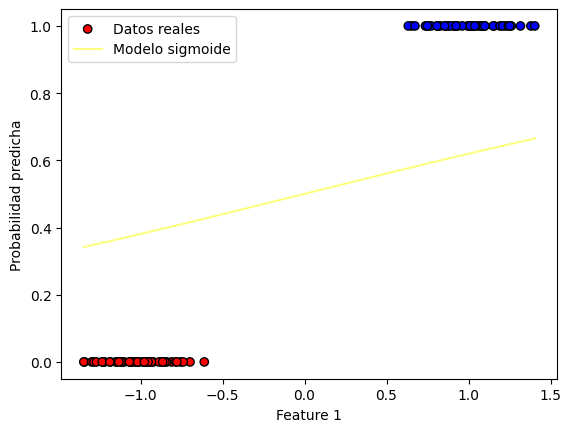

Iteracion: 111
Costo en la iteración 111: 0.47833627070435747
Valor del gradiente 111: [-0.00130726 -0.3794185 ]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00082249 0.49076379]


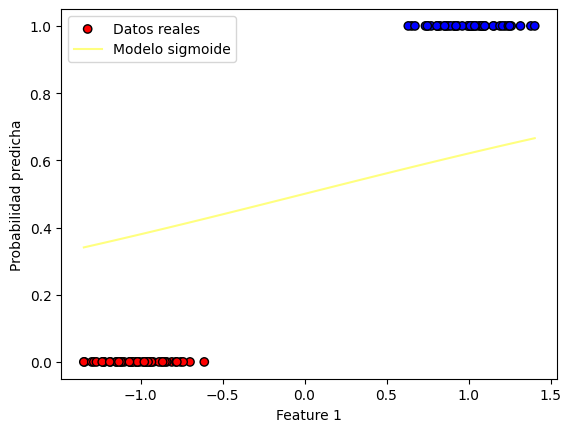

Iteracion: 112
Costo en la iteración 112: 0.47689843142678207
Valor del gradiente 112: [-0.00131487 -0.37848996]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00083564 0.49454869]


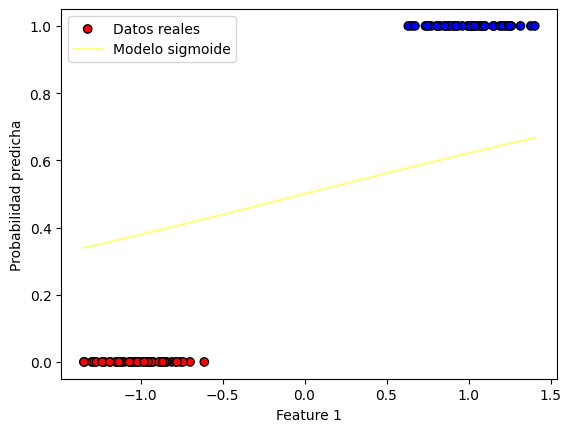

Iteracion: 113
Costo en la iteración 113: 0.47546761898189466
Valor del gradiente 113: [-0.00132241 -0.37756467]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00084887 0.49832433]


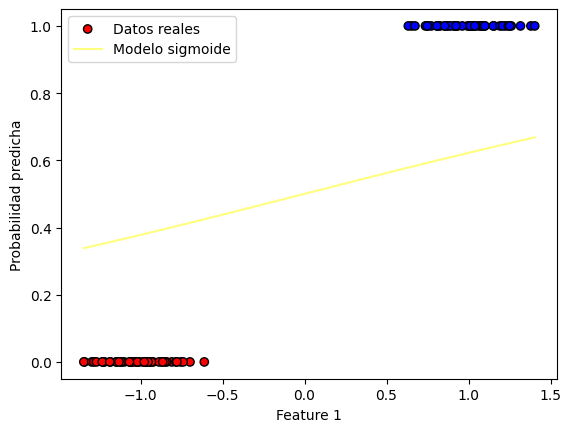

Iteracion: 114
Costo en la iteración 114: 0.47404379163728233
Valor del gradiente 114: [-0.0013299  -0.37664262]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00086216 0.50209076]


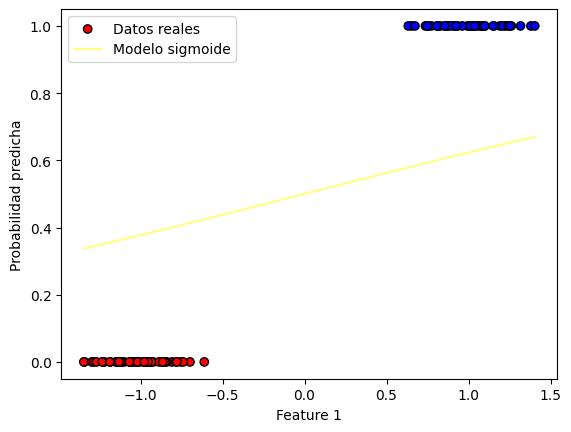

Iteracion: 115
Costo en la iteración 115: 0.47262690790961187
Valor del gradiente 115: [-0.00133732 -0.3757238 ]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00087554 0.505848  ]


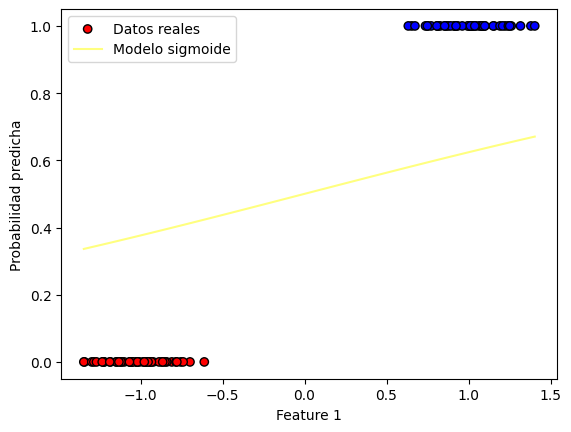

Iteracion: 116
Costo en la iteración 116: 0.47121692656366504
Valor del gradiente 116: [-0.00134468 -0.37480821]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00088898 0.50959608]


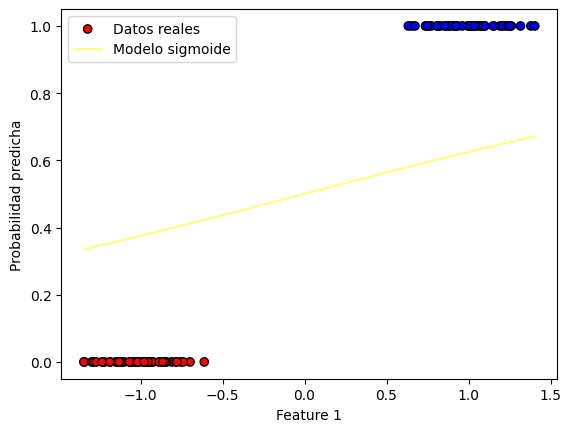

Iteracion: 117
Costo en la iteración 117: 0.46981380661136507
Valor del gradiente 117: [-0.00135197 -0.37389584]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.0009025  0.51333504]


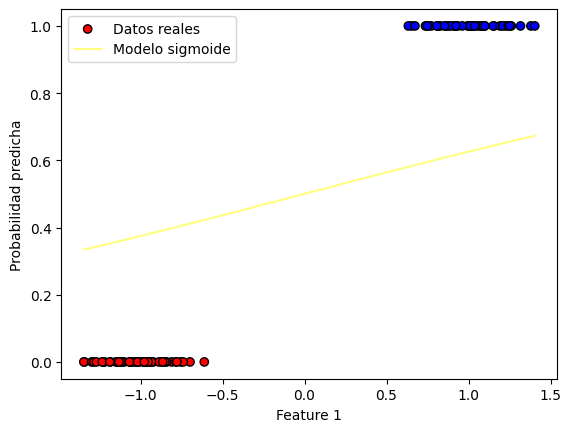

Iteracion: 118
Costo en la iteración 118: 0.4684175073107934
Valor del gradiente 118: [-0.00135921 -0.37298666]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.0009161 0.5170649]


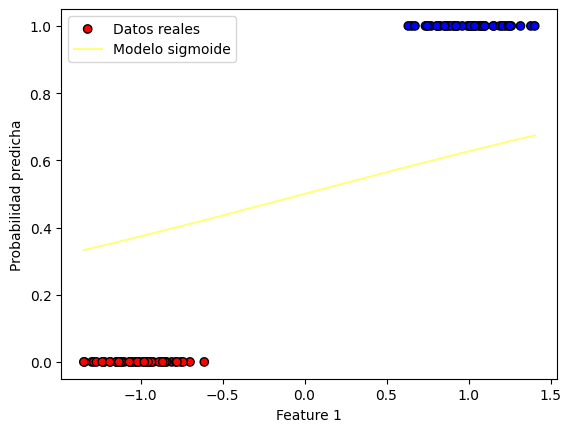

Iteracion: 119
Costo en la iteración 119: 0.46702798816519875
Valor del gradiente 119: [-0.00136638 -0.37208069]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00092976 0.52078571]


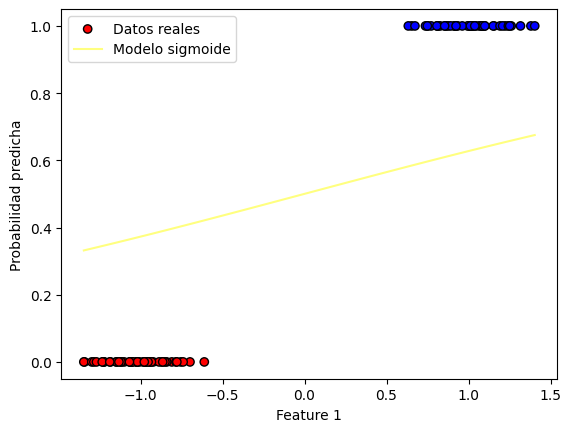

Iteracion: 120
Costo en la iteración 120: 0.4656452089219975
Valor del gradiente 120: [-0.0013735 -0.3711779]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00094349 0.52449749]


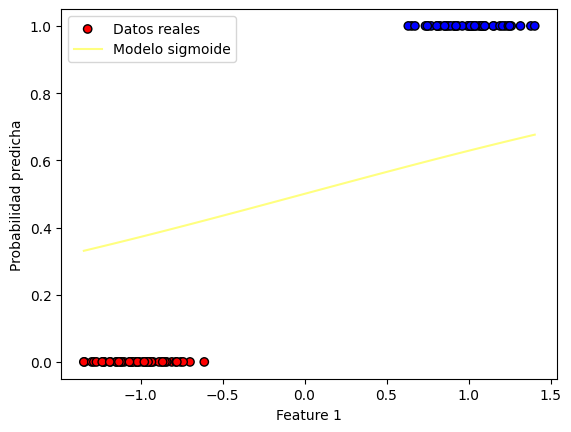

Iteracion: 121
Costo en la iteración 121: 0.46426912957176675
Valor del gradiente 121: [-0.00138055 -0.37027829]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.0009573  0.52820027]


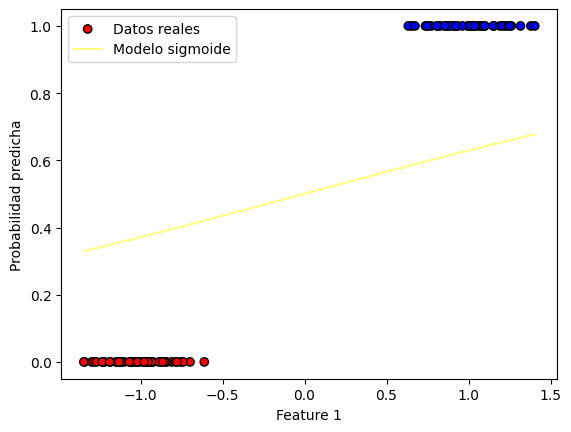

Iteracion: 122
Costo en la iteración 122: 0.4628997103472285
Valor del gradiente 122: [-0.00138755 -0.36938184]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00097118 0.53189409]


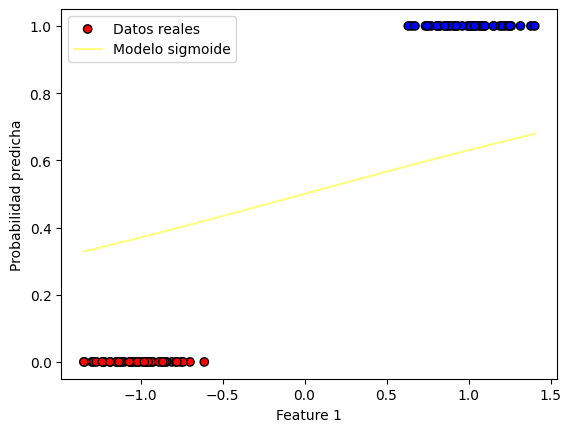

Iteracion: 123
Costo en la iteración 123: 0.46153691172222794
Valor del gradiente 123: [-0.00139449 -0.36848855]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00098512 0.53557898]


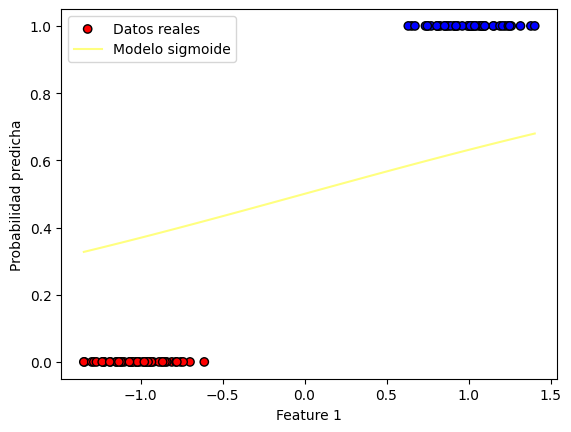

Iteracion: 124
Costo en la iteración 124: 0.46018069441070386
Valor del gradiente 124: [-0.00140136 -0.36759842]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00099913 0.53925496]


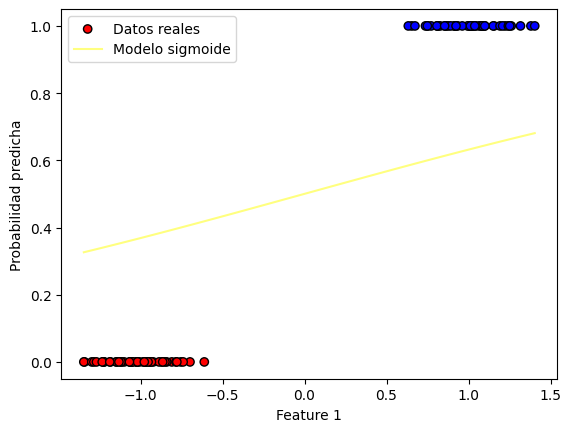

Iteracion: 125
Costo en la iteración 125: 0.45883101936565346
Valor del gradiente 125: [-0.00140818 -0.36671142]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00101322 0.54292207]


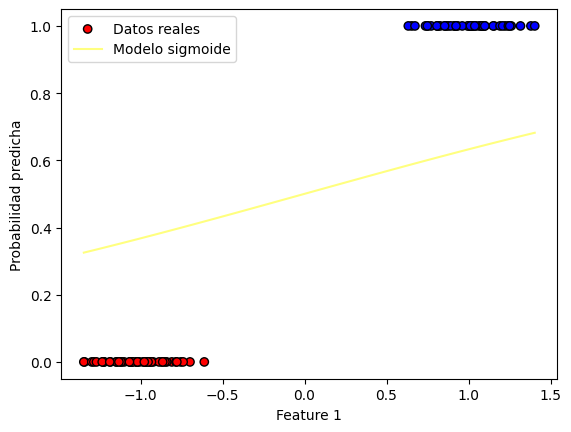

Iteracion: 126
Costo en la iteración 126: 0.4574878477780892
Valor del gradiente 126: [-0.00141494 -0.36582755]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00102737 0.54658035]


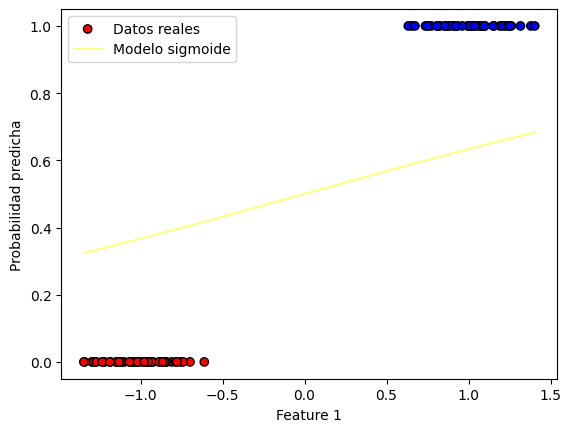

Iteracion: 127
Costo en la iteración 127: 0.456151141075991
Valor del gradiente 127: [-0.00142164 -0.3649468 ]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00104158 0.55022982]


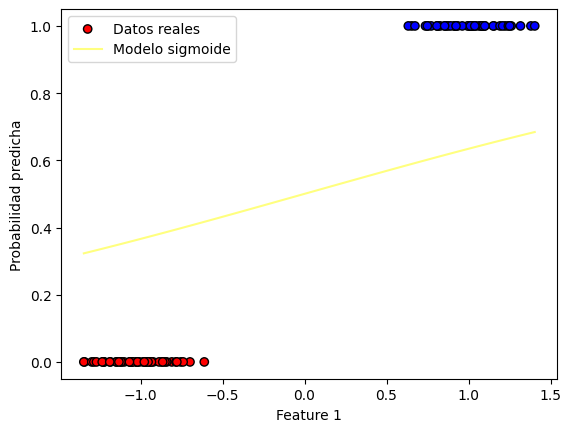

Iteracion: 128
Costo en la iteración 128: 0.45482086092325213
Valor del gradiente 128: [-0.00142828 -0.36406916]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00105586 0.55387051]


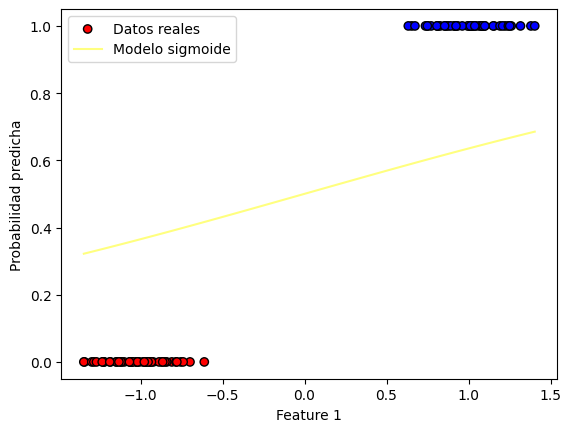

Iteracion: 129
Costo en la iteración 129: 0.453496969218619
Valor del gradiente 129: [-0.00143487 -0.36319462]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00107021 0.55750246]


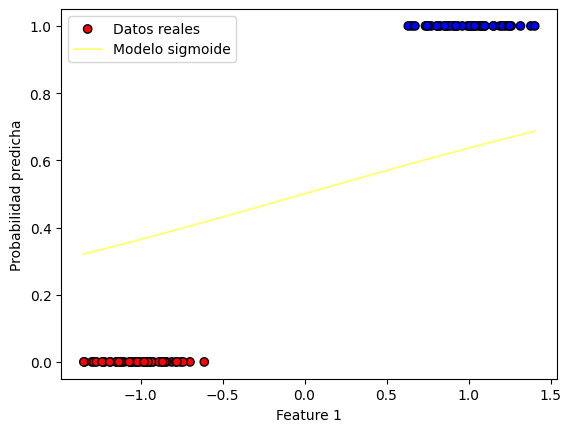

Iteracion: 130
Costo en la iteración 130: 0.4521794280946273
Valor del gradiente 130: [-0.0014414  -0.36232317]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00108463 0.56112569]


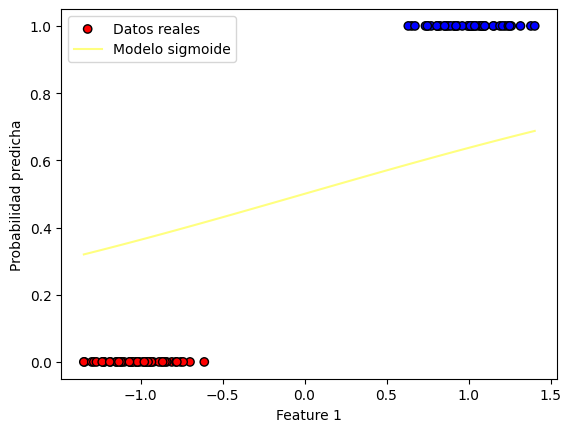

Iteracion: 131
Costo en la iteración 131: 0.45086819991653115
Valor del gradiente 131: [-0.00144787 -0.3614548 ]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00109911 0.56474024]


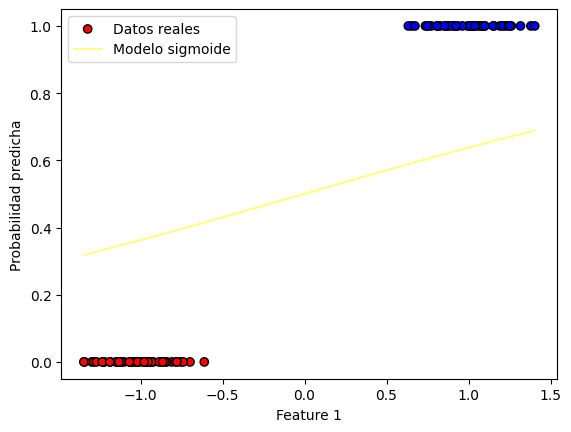

Iteracion: 132
Costo en la iteración 132: 0.44956324728122915
Valor del gradiente 132: [-0.00145429 -0.36058951]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00111365 0.56834613]


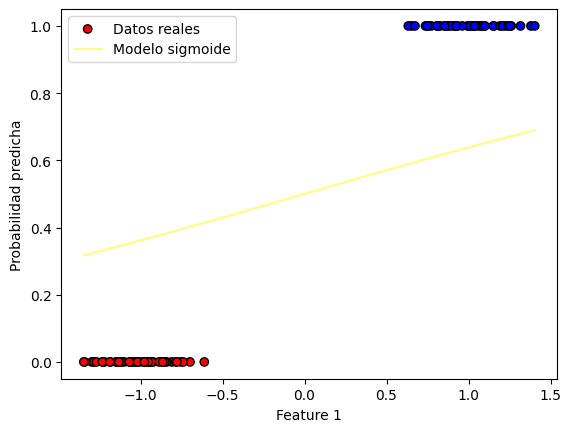

Iteracion: 133
Costo en la iteración 133: 0.44826453301618496
Valor del gradiente 133: [-0.00146065 -0.35972727]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00112826 0.5719434 ]


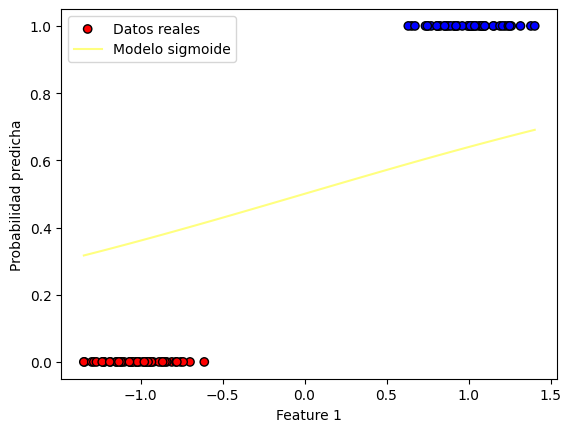

Iteracion: 134
Costo en la iteración 134: 0.4469720201783447
Valor del gradiente 134: [-0.00146695 -0.35886809]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00114293 0.57553208]


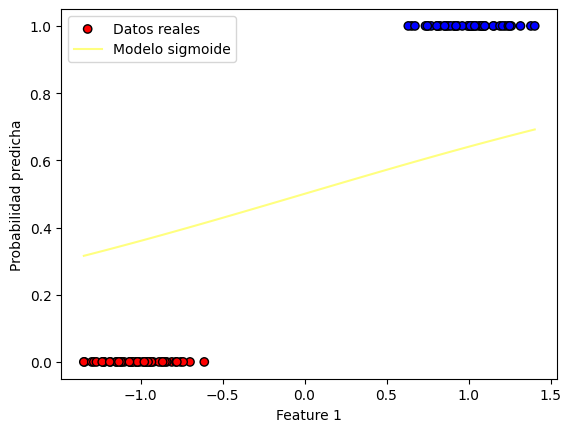

Iteracion: 135
Costo en la iteración 135: 0.44568567205304904
Valor del gradiente 135: [-0.0014732  -0.35801195]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00115766 0.5791122 ]


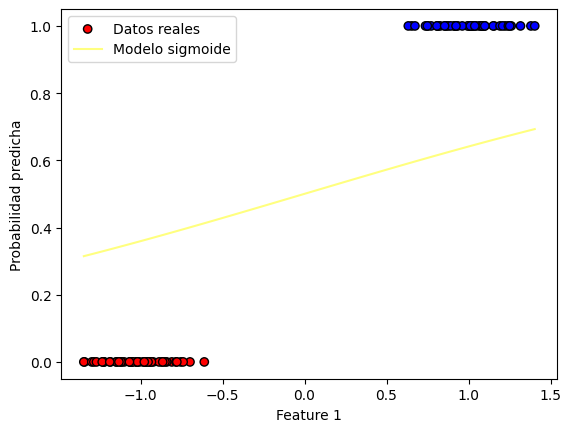

Iteracion: 136
Costo en la iteración 136: 0.4444054521529428
Valor del gradiente 136: [-0.0014794  -0.35715884]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00117245 0.58268379]


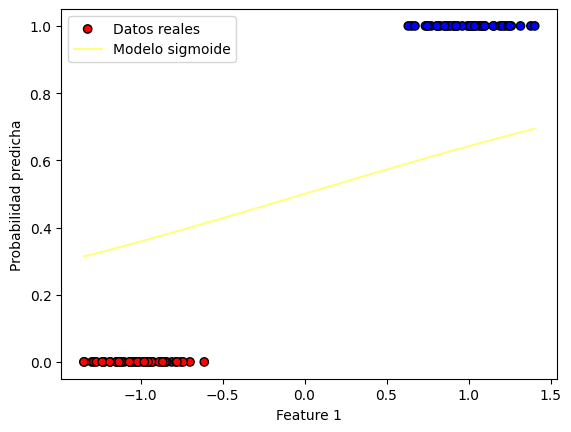

Iteracion: 137
Costo en la iteración 137: 0.44313132421688095
Valor del gradiente 137: [-0.00148554 -0.35630875]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00118731 0.58624688]


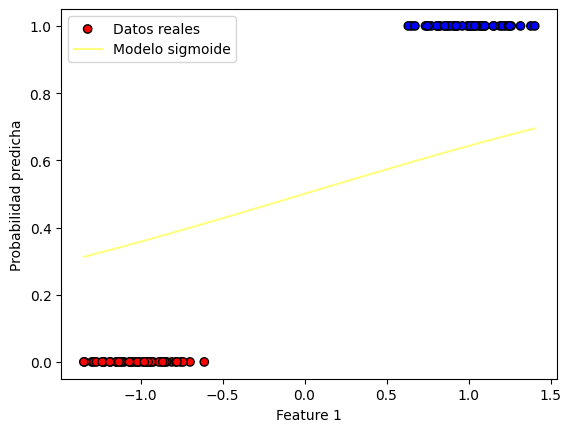

Iteracion: 138
Costo en la iteración 138: 0.44186325220883016
Valor del gradiente 138: [-0.00149162 -0.35546168]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00120222 0.5898015 ]


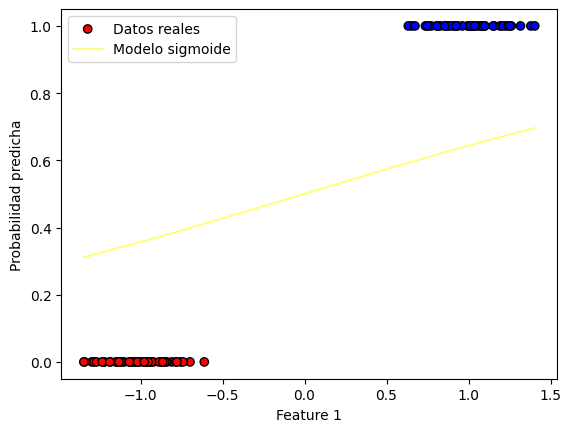

Iteracion: 139
Costo en la iteración 139: 0.440601200316769
Valor del gradiente 139: [-0.00149765 -0.35461761]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.0012172  0.59334767]


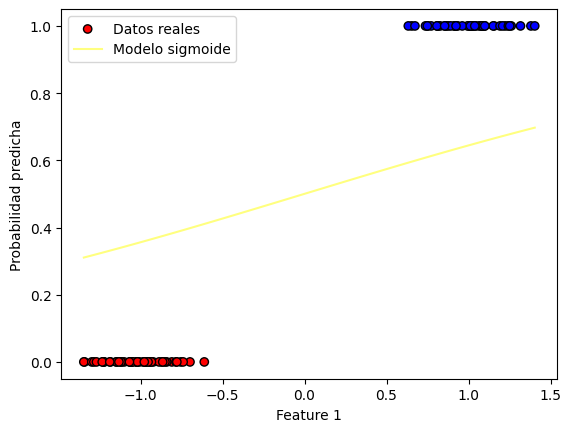

Iteracion: 140
Costo en la iteración 140: 0.43934513295158467
Valor del gradiente 140: [-0.00150363 -0.35377653]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00123224 0.59688544]


AttributeError: 'Text' object has no attribute 'eventson'

<Figure size 640x480 with 1 Axes>

Iteracion: 141
Costo en la iteración 141: 0.4380950147459662
Valor del gradiente 141: [-0.00150955 -0.35293843]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00124733 0.60041482]


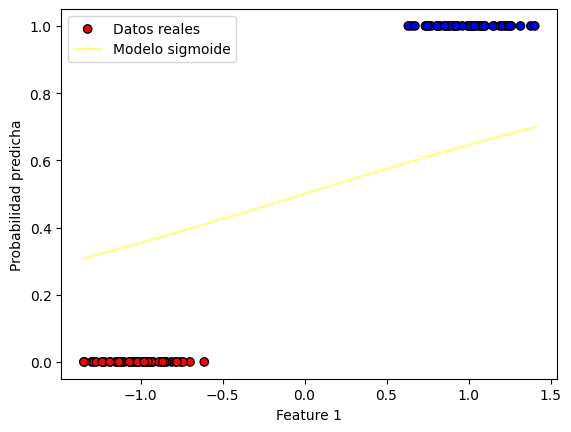

Iteracion: 142
Costo en la iteración 142: 0.4368508105532973
Valor del gradiente 142: [-0.00151542 -0.35210331]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00126249 0.60393586]


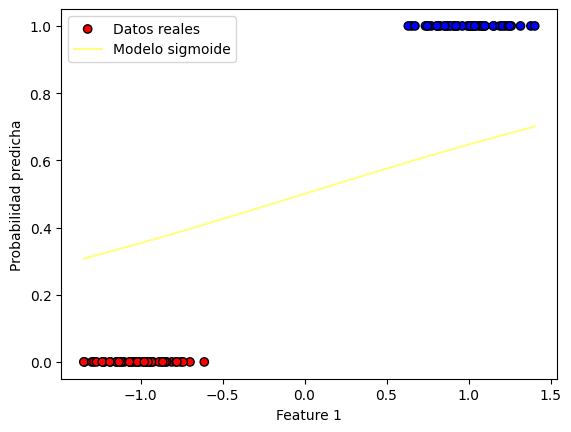

Iteracion: 143
Costo en la iteración 143: 0.43561248544654535
Valor del gradiente 143: [-0.00152124 -0.35127115]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.0012777  0.60744857]


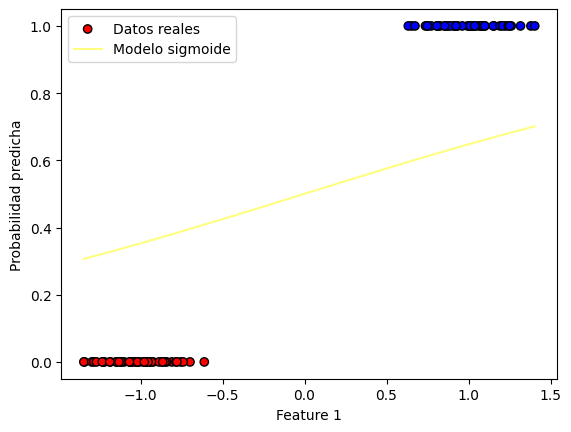

Iteracion: 144
Costo en la iteración 144: 0.4343800047171492
Valor del gradiente 144: [-0.00152701 -0.35044194]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00129297 0.61095299]


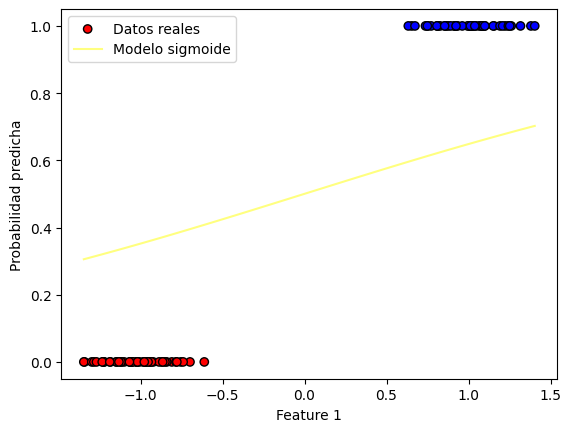

Iteracion: 145
Costo en la iteración 145: 0.43315333387390526
Valor del gradiente 145: [-0.00153272 -0.34961568]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00130829 0.61444914]


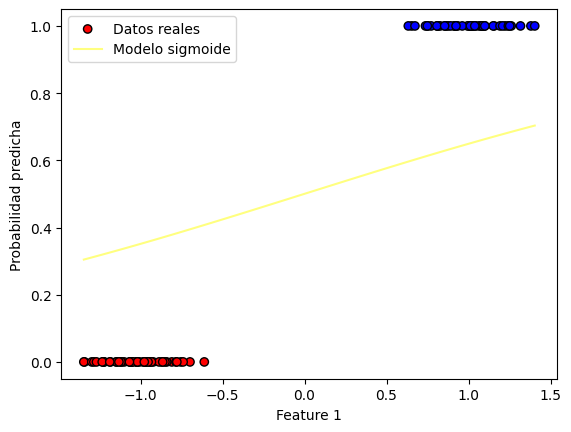

Iteracion: 146
Costo en la iteración 146: 0.4319324386418517
Valor del gradiente 146: [-0.00153838 -0.34879235]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00132368 0.61793707]


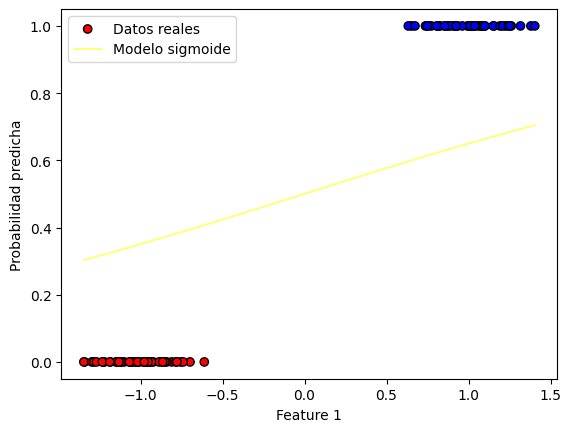

Iteracion: 147
Costo en la iteración 147: 0.4307172849611519
Valor del gradiente 147: [-0.00154399 -0.34797194]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00133912 0.62141679]


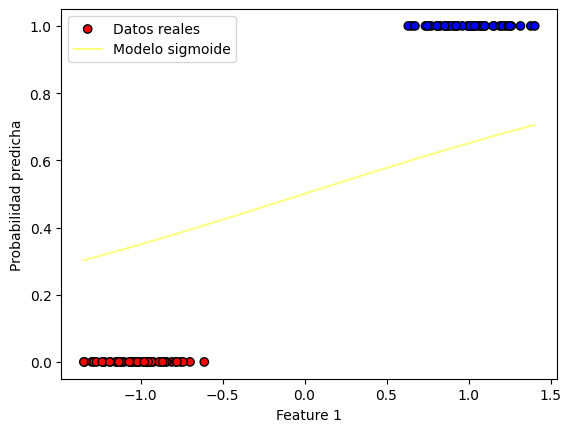

Iteracion: 148
Costo en la iteración 148: 0.4295078389859759
Valor del gradiente 148: [-0.00154955 -0.34715444]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00135461 0.62488833]


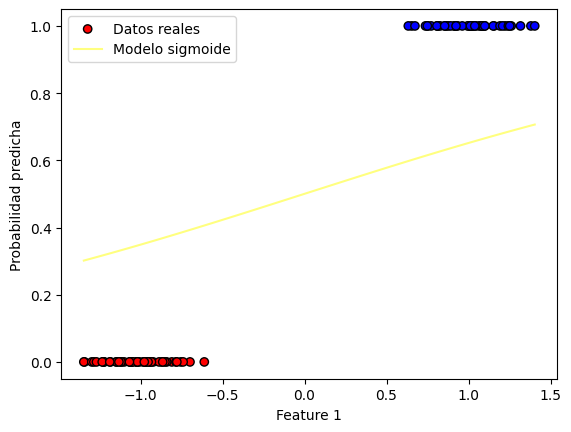

Iteracion: 149
Costo en la iteración 149: 0.4283040670833815
Valor del gradiente 149: [-0.00155506 -0.34633985]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00137016 0.62835173]


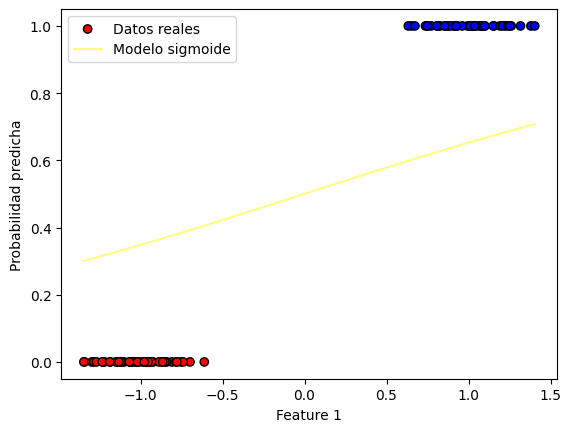

Iteracion: 150
Costo en la iteración 150: 0.42710593583219486
Valor del gradiente 150: [-0.00156052 -0.34552815]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00138577 0.63180701]


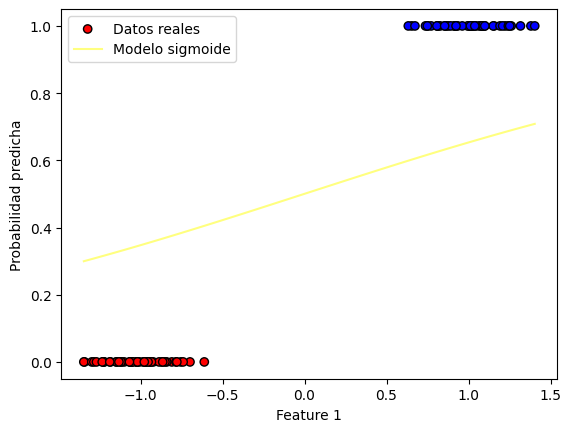

Iteracion: 151
Costo en la iteración 151: 0.4259134120218896
Valor del gradiente 151: [-0.00156593 -0.34471934]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00140143 0.6352542 ]


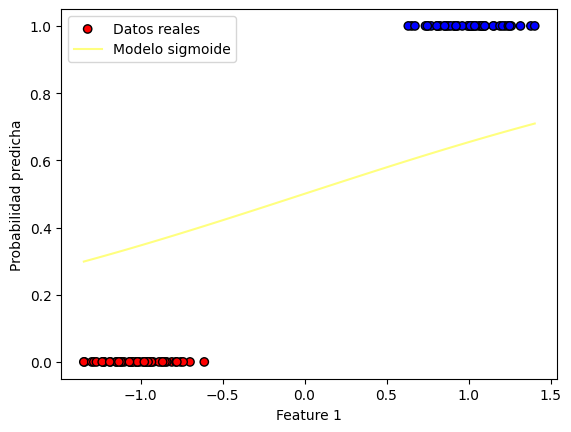

Iteracion: 152
Costo en la iteración 152: 0.4247264626514658
Valor del gradiente 152: [-0.00157129 -0.34391339]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00141714 0.63869334]


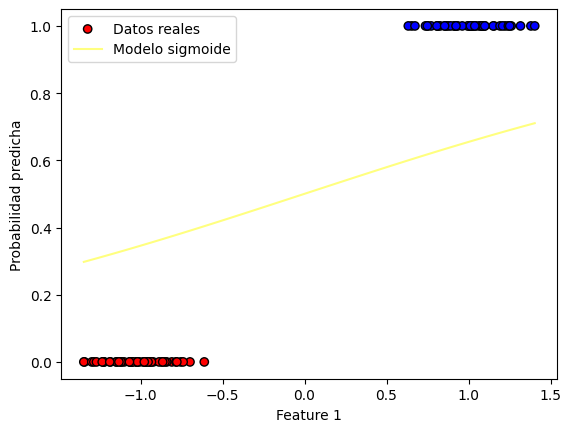

Iteracion: 153
Costo en la iteración 153: 0.4235450549283295
Valor del gradiente 153: [-0.0015766  -0.34311031]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00143291 0.64212444]


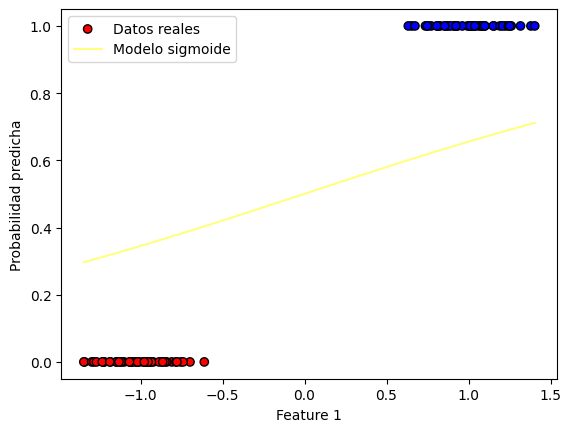

Iteracion: 154
Costo en la iteración 154: 0.42236915626717064
Valor del gradiente 154: [-0.00158186 -0.34231009]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00144873 0.64554754]


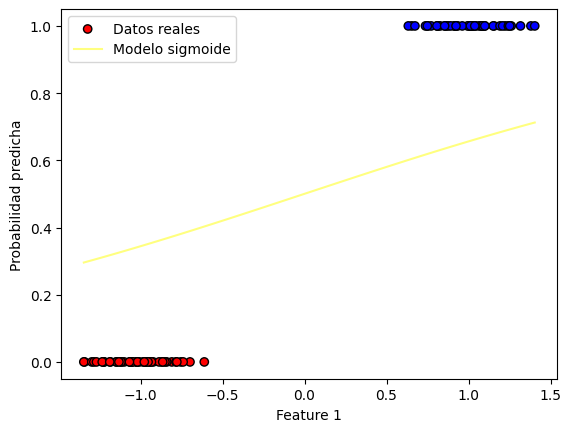

Iteracion: 155
Costo en la iteración 155: 0.4211987342888422
Valor del gradiente 155: [-0.00158707 -0.3415127 ]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.0014646  0.64896267]


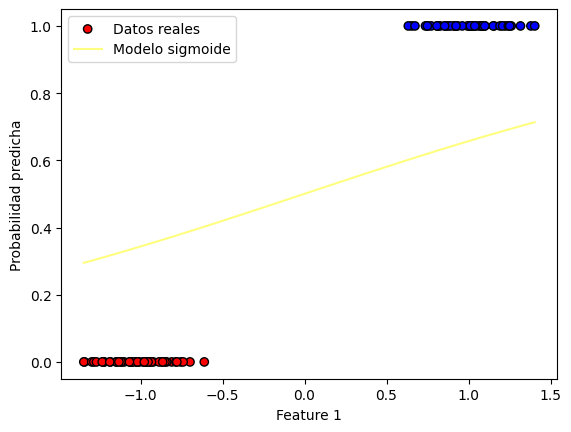

Iteracion: 156
Costo en la iteración 156: 0.42003375681923943
Valor del gradiente 156: [-0.00159223 -0.34071815]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00148052 0.65236985]


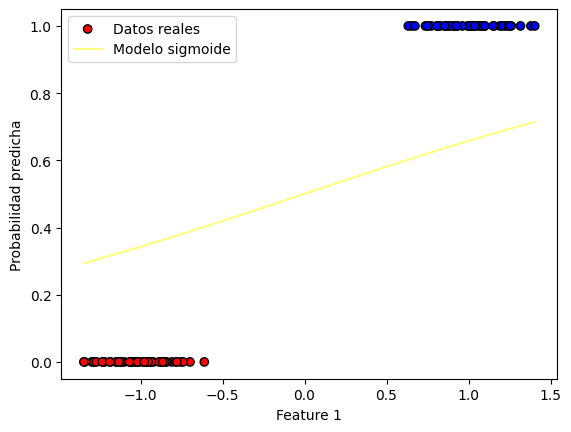

Iteracion: 157
Costo en la iteración 157: 0.4188741918881784
Valor del gradiente 157: [-0.00159735 -0.33992643]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00149649 0.65576911]


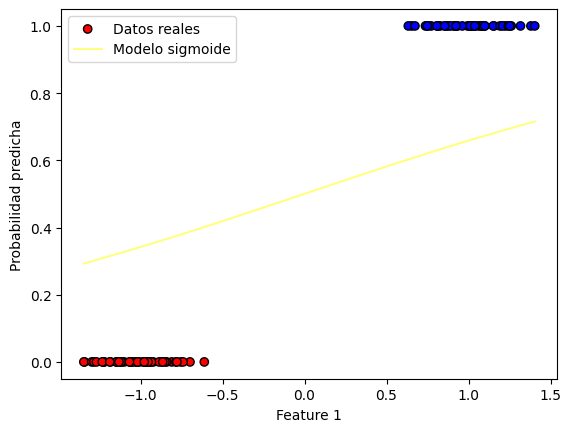

Iteracion: 158
Costo en la iteración 158: 0.41772000772827705
Valor del gradiente 158: [-0.00160241 -0.33913751]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00151252 0.65916049]


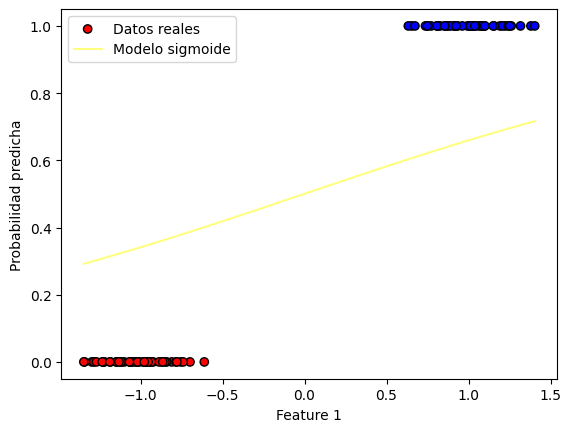

Iteracion: 159
Costo en la iteración 159: 0.4165711727738344
Valor del gradiente 159: [-0.00160743 -0.3383514 ]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00152859 0.662544  ]


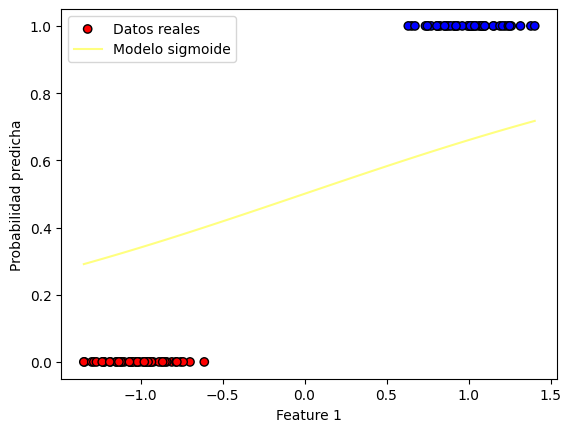

Iteracion: 160
Costo en la iteración 160: 0.41542765565971257
Valor del gradiente 160: [-0.0016124  -0.33756808]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00154472 0.66591968]


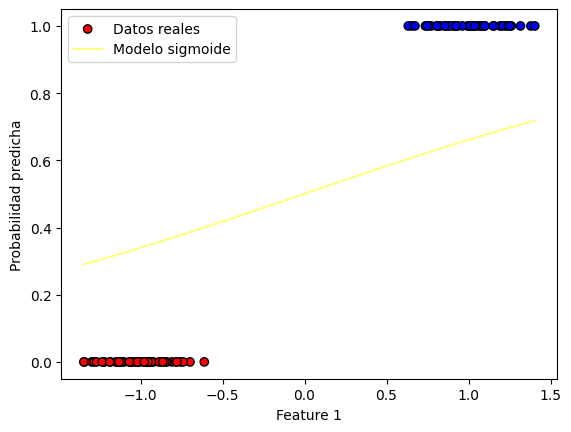

Iteracion: 161
Costo en la iteración 161: 0.4142894252202193
Valor del gradiente 161: [-0.00161733 -0.33678755]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00156089 0.66928756]


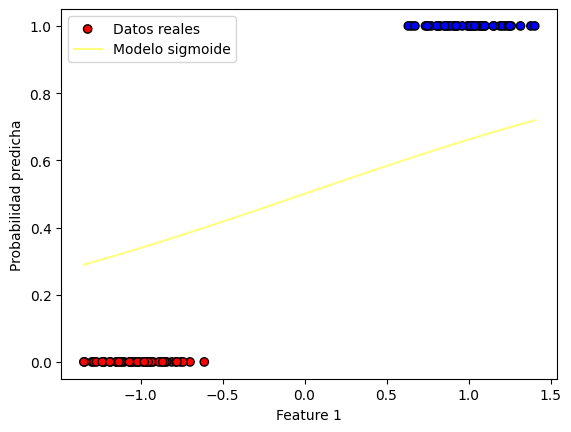

Iteracion: 162
Costo en la iteración 162: 0.4131564504879899
Valor del gradiente 162: [-0.00162221 -0.33600978]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00157711 0.67264766]


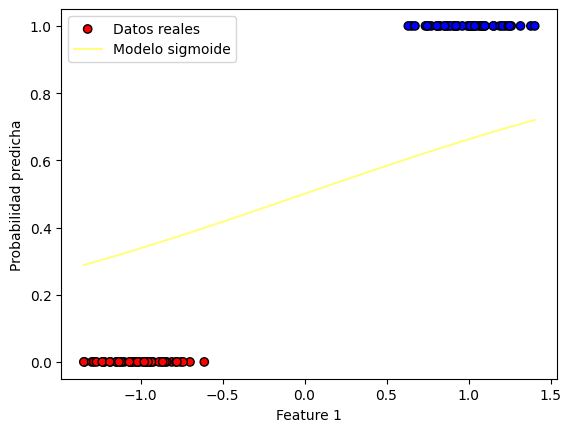

Iteracion: 163
Costo en la iteración 163: 0.41202870069287345
Valor del gradiente 163: [-0.00162704 -0.33523478]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00159338 0.67600001]


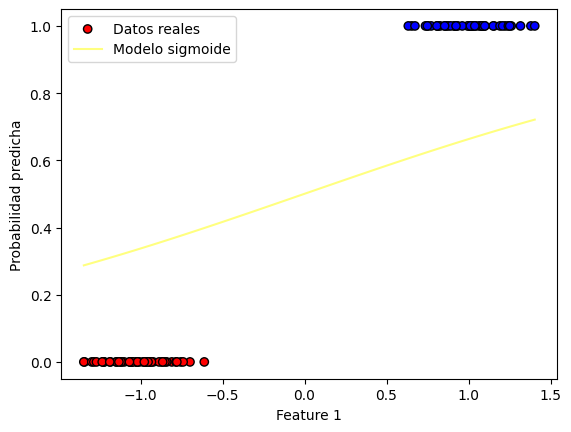

Iteracion: 164
Costo en la iteración 164: 0.4109061452608174
Valor del gradiente 164: [-0.00163183 -0.33446254]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.0016097  0.67934463]


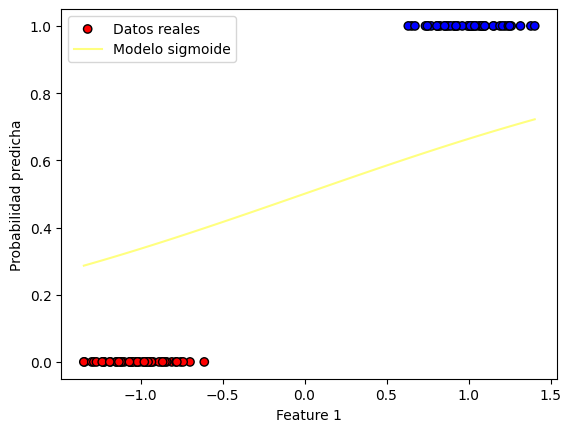

Iteracion: 165
Costo en la iteración 165: 0.4097887538127554
Valor del gradiente 165: [-0.00163657 -0.33369304]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00162607 0.68268156]


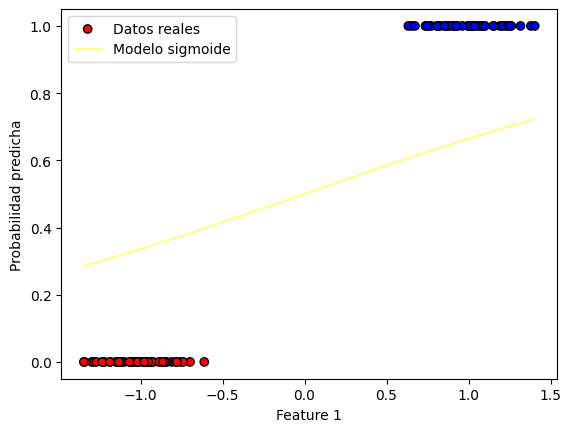

Iteracion: 166
Costo en la iteración 166: 0.40867649616349594
Valor del gradiente 166: [-0.00164126 -0.33292627]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00164248 0.68601082]


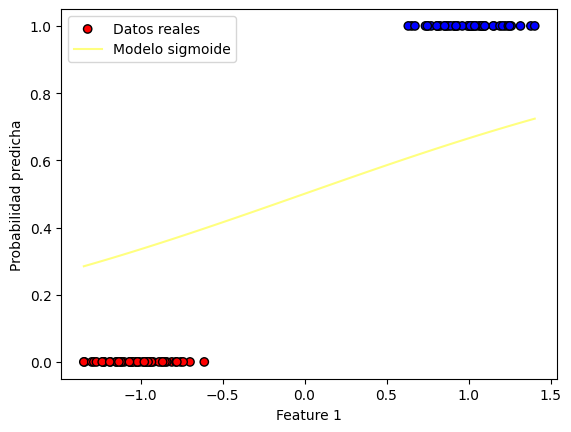

Iteracion: 167
Costo en la iteración 167: 0.4075693423206127
Valor del gradiente 167: [-0.00164591 -0.33216222]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00165894 0.68933245]


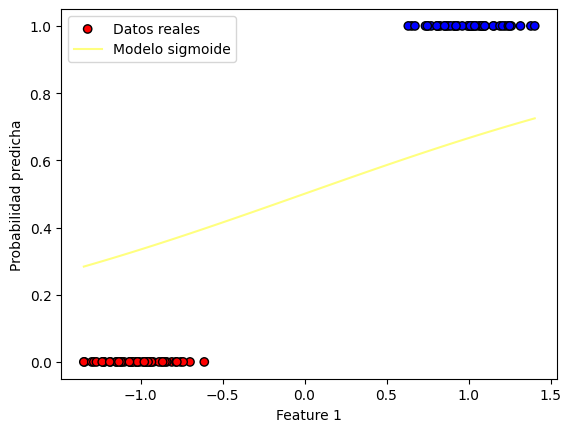

Iteracion: 168
Costo en la iteración 168: 0.40646726248333714
Valor del gradiente 168: [-0.00165052 -0.33140089]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00167544 0.69264645]


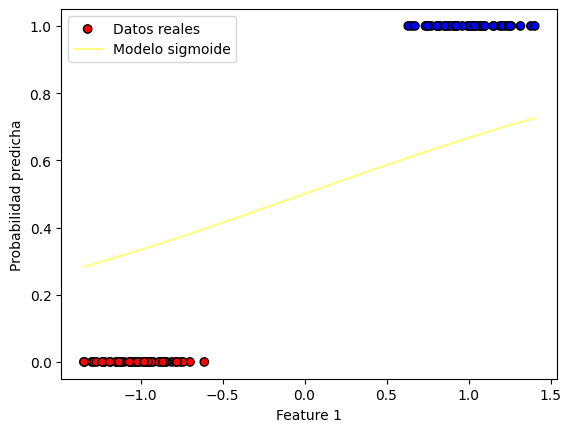

Iteracion: 169
Costo en la iteración 169: 0.4053702270414528
Valor del gradiente 169: [-0.00165508 -0.33064226]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00169199 0.69595288]


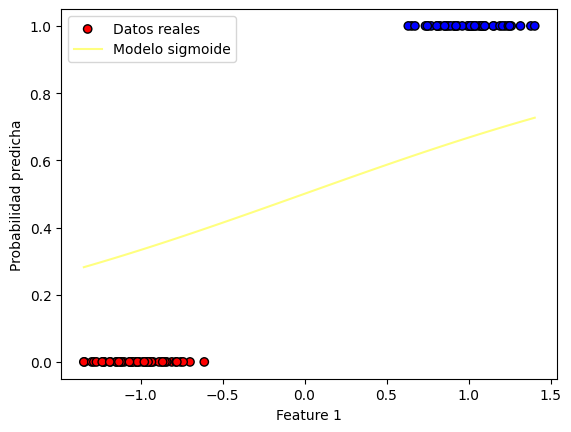

Iteracion: 170
Costo en la iteración 170: 0.4042782065741916
Valor del gradiente 170: [-0.0016596  -0.32988632]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00170859 0.69925174]


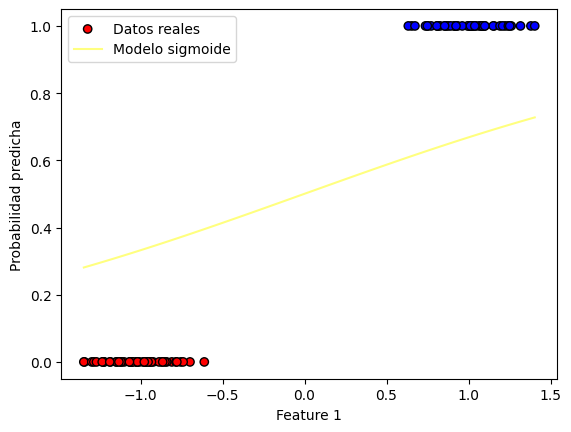

Iteracion: 171
Costo en la iteración 171: 0.40319117184913206
Valor del gradiente 171: [-0.00166407 -0.32913307]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00172523 0.70254307]


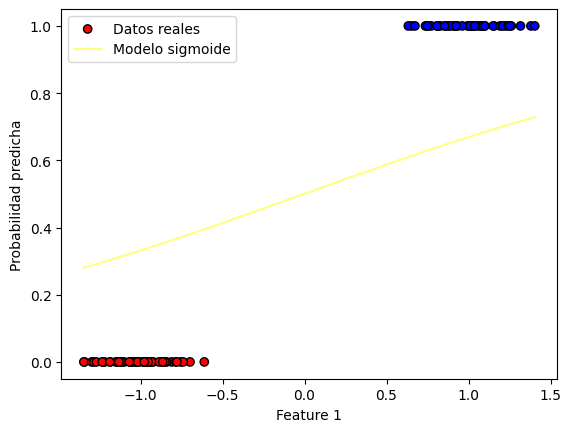

Iteracion: 172
Costo en la iteración 172: 0.4021090938210999
Valor del gradiente 172: [-0.0016685  -0.32838249]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00174191 0.7058269 ]


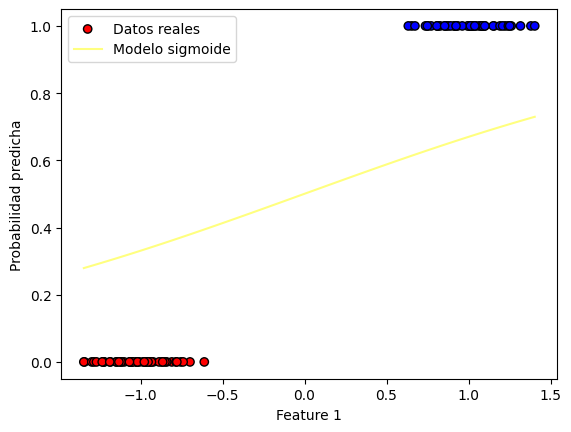

Iteracion: 173
Costo en la iteración 173: 0.40103194363107153
Valor del gradiente 173: [-0.00167288 -0.32763457]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00175864 0.70910324]


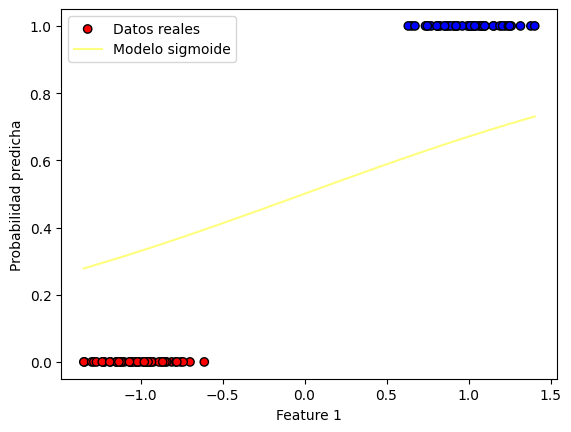

Iteracion: 174
Costo en la iteración 174: 0.39995969260507885
Valor del gradiente 174: [-0.00167723 -0.32688931]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00177542 0.71237213]


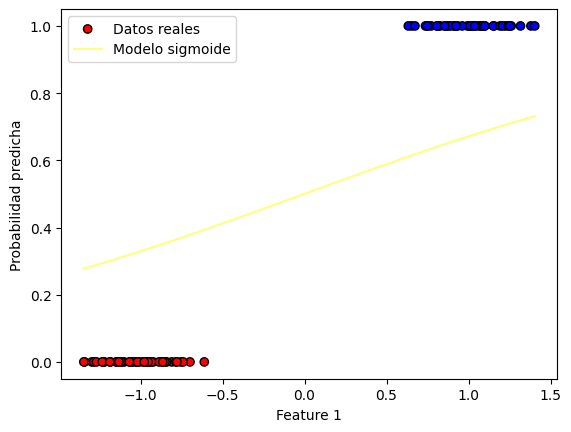

Iteracion: 175
Costo en la iteración 175: 0.39889231225311783
Valor del gradiente 175: [-0.00168153 -0.32614669]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00179223 0.7156336 ]


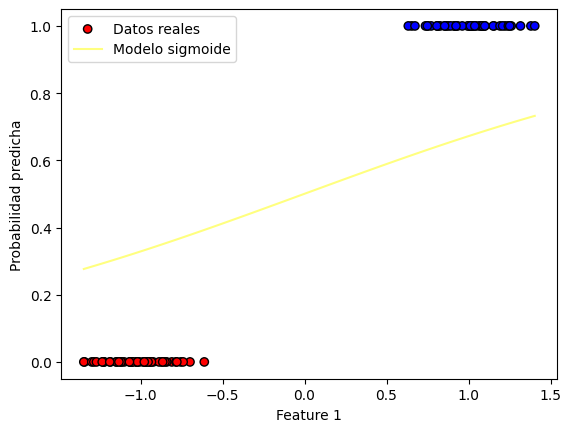

Iteracion: 176
Costo en la iteración 176: 0.3978297742680587
Valor del gradiente 176: [-0.00168578 -0.32540671]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00180909 0.71888767]


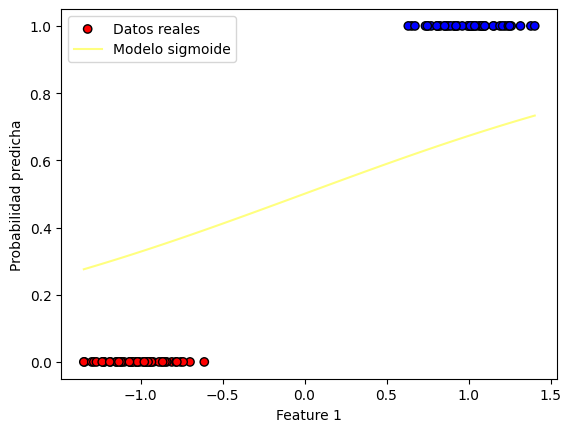

Iteracion: 177
Costo en la iteración 177: 0.3967720505245595
Valor del gradiente 177: [-0.00169    -0.32466935]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00182599 0.72213436]


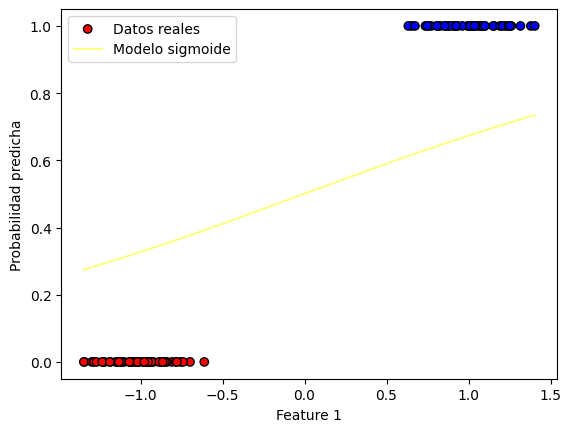

Iteracion: 178
Costo en la iteración 178: 0.3957191130779819
Valor del gradiente 178: [-0.00169417 -0.3239346 ]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00184293 0.72537371]


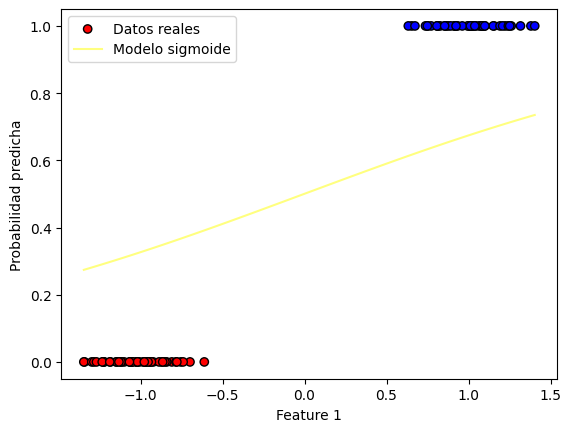

Iteracion: 179
Costo en la iteración 179: 0.39467093416331067
Valor del gradiente 179: [-0.00169831 -0.32320246]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00185991 0.72860573]


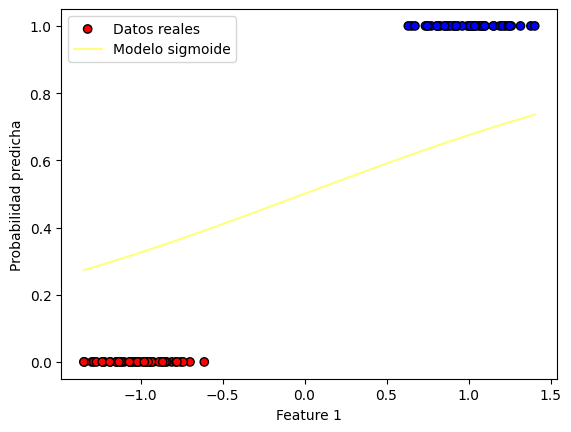

Iteracion: 180
Costo en la iteración 180: 0.3936274861940755
Valor del gradiente 180: [-0.0017024  -0.32247291]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00187694 0.73183046]


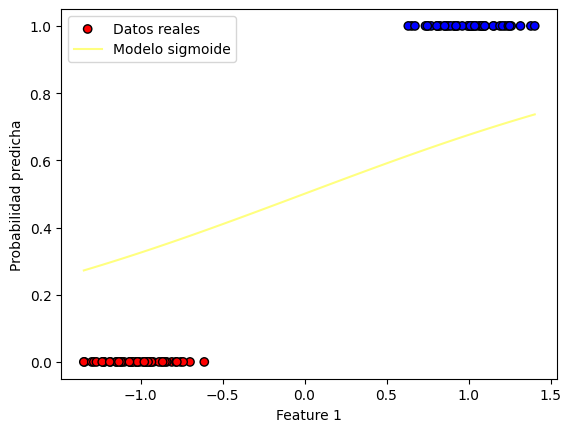

Iteracion: 181
Costo en la iteración 181: 0.3925887417612756
Valor del gradiente 181: [-0.00170645 -0.32174595]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.001894   0.73504792]


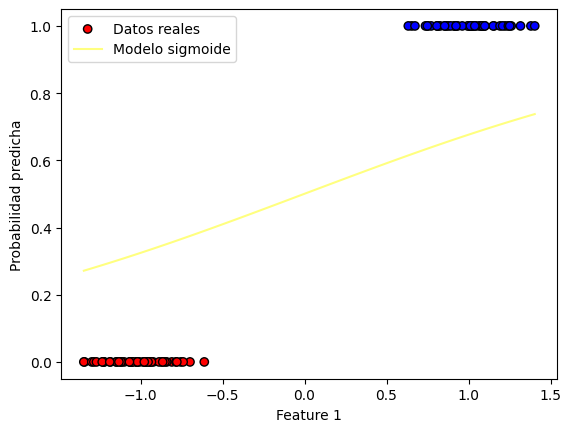

Iteracion: 182
Costo en la iteración 182: 0.39155467363230884
Valor del gradiente 182: [-0.00171046 -0.32102156]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00191111 0.73825814]


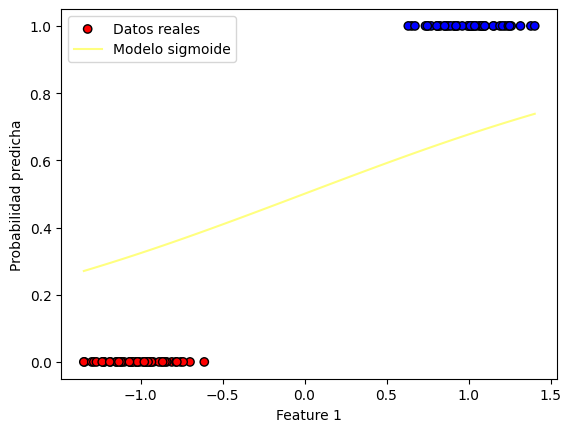

Iteracion: 183
Costo en la iteración 183: 0.3905252547499019
Valor del gradiente 183: [-0.00171442 -0.32029974]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00192825 0.74146113]


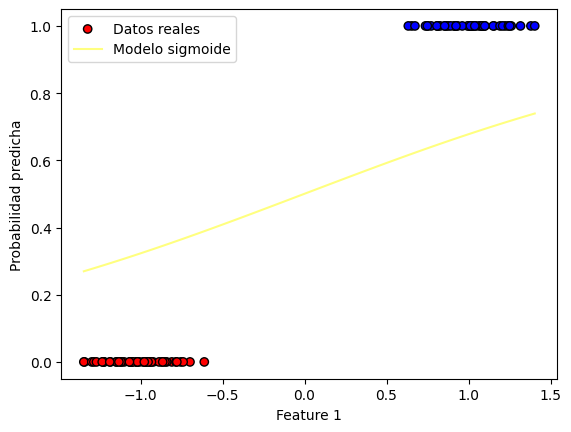

Iteracion: 184
Costo en la iteración 184: 0.38950045823104595
Valor del gradiente 184: [-0.00171835 -0.31958048]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00194543 0.74465694]


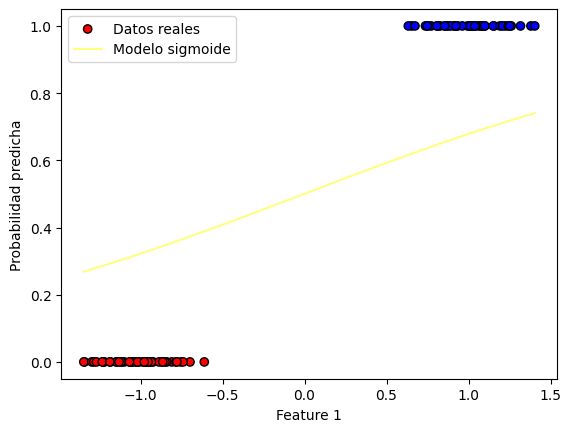

Iteracion: 185
Costo en la iteración 185: 0.3884802573659342
Valor del gradiente 185: [-0.00172224 -0.31886375]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00196266 0.74784558]


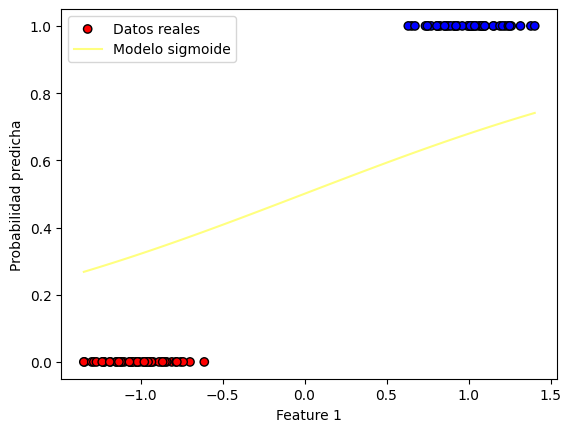

Iteracion: 186
Costo en la iteración 186: 0.38746462561690337
Valor del gradiente 186: [-0.00172609 -0.31814957]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00197992 0.75102707]


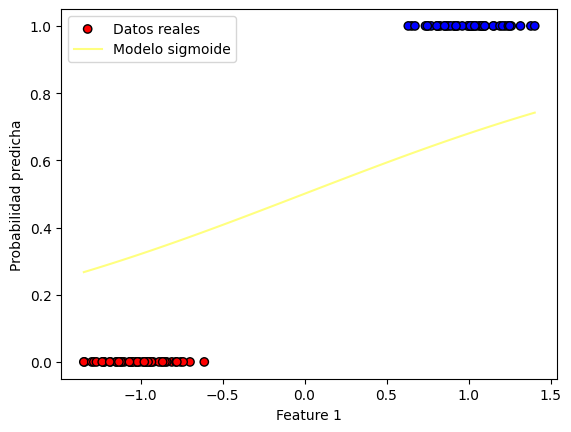

Iteracion: 187
Costo en la iteración 187: 0.3864535366173783
Valor del gradiente 187: [-0.0017299  -0.31743791]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00199722 0.75420145]


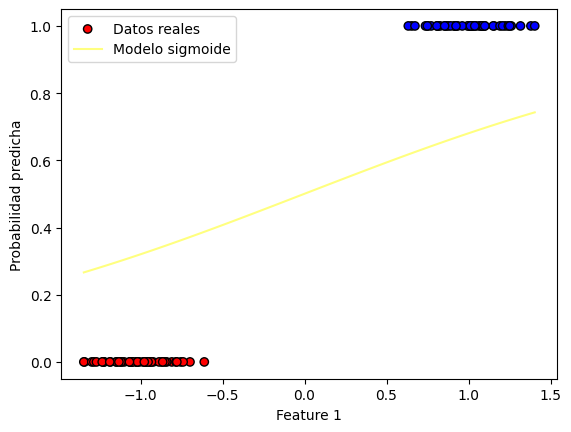

Iteracion: 188
Costo en la iteración 188: 0.3854469641708208
Valor del gradiente 188: [-0.00173367 -0.31672877]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00201455 0.75736874]


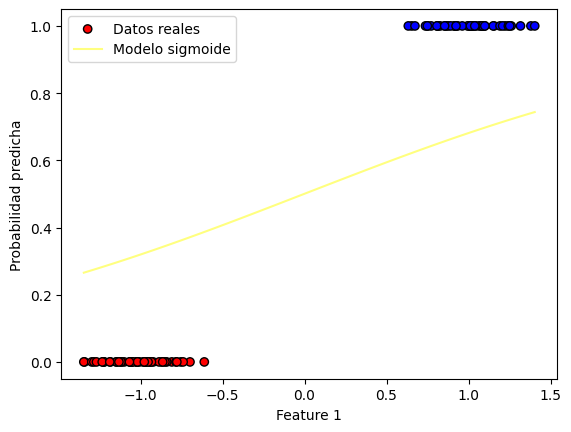

Iteracion: 189
Costo en la iteración 189: 0.38444488224968204
Valor del gradiente 189: [-0.0017374  -0.31602213]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00203193 0.76052896]


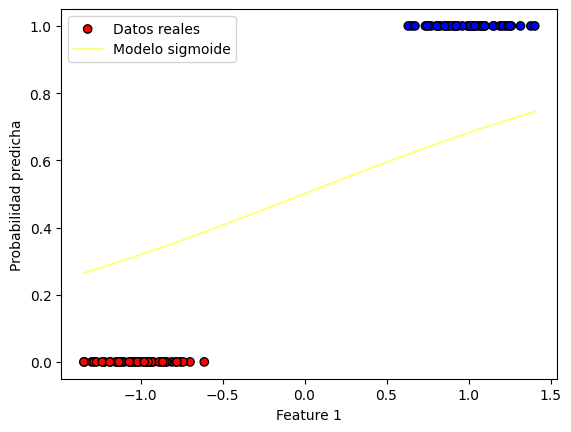

Iteracion: 190
Costo en la iteración 190: 0.38344726499435733
Valor del gradiente 190: [-0.0017411 -0.315318 ]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00204934 0.76368214]


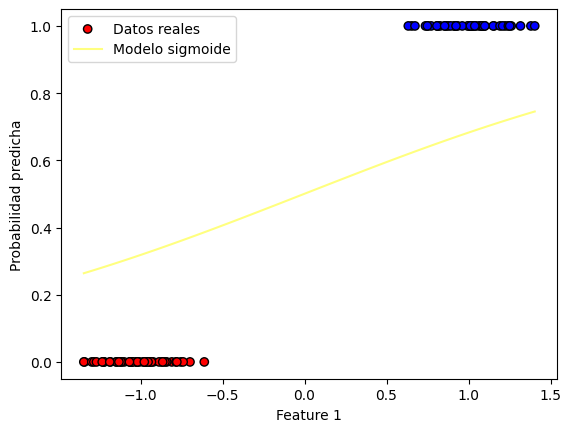

Iteracion: 191
Costo en la iteración 191: 0.3824540867121455
Valor del gradiente 191: [-0.00174475 -0.31461635]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00206679 0.7668283 ]


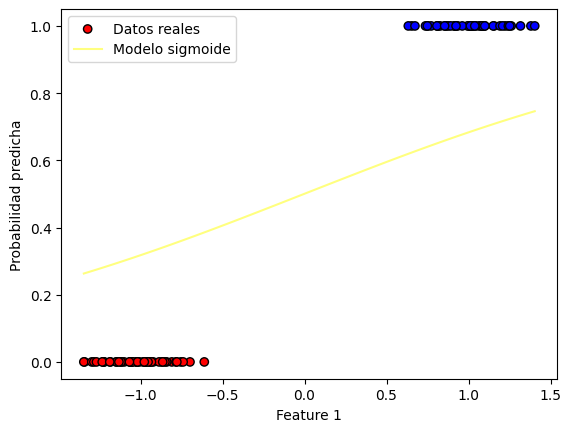

Iteracion: 192
Costo en la iteración 192: 0.38146532187621385
Valor del gradiente 192: [-0.00174837 -0.31391717]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00208427 0.76996748]


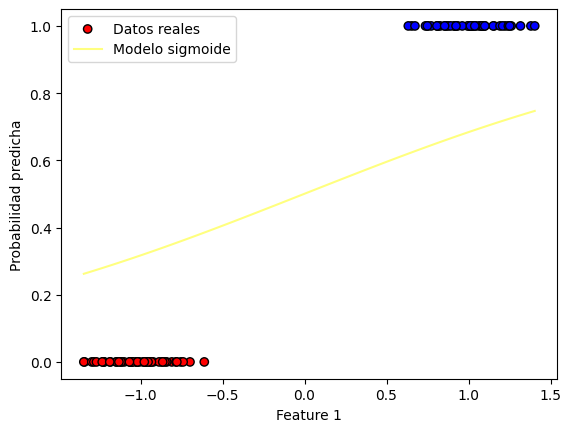

Iteracion: 193
Costo en la iteración 193: 0.38048094512456304
Valor del gradiente 193: [-0.00175195 -0.31322047]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00210179 0.77309968]


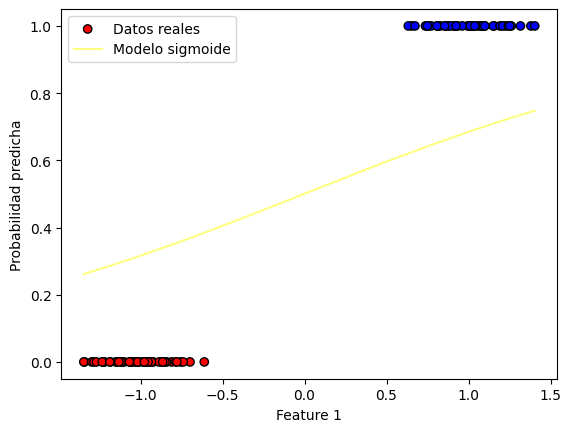

Iteracion: 194
Costo en la iteración 194: 0.37950093125899936
Valor del gradiente 194: [-0.00175549 -0.31252623]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00211934 0.77622494]


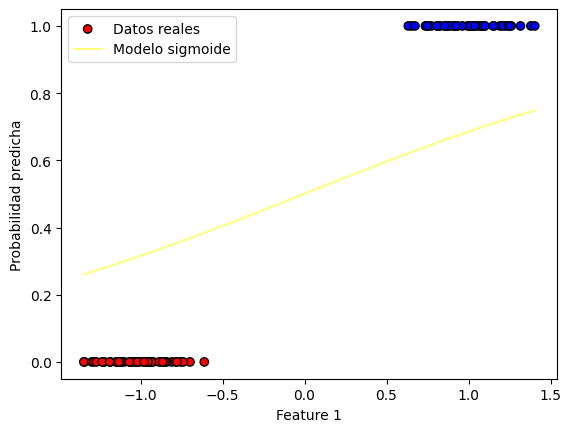

Iteracion: 195
Costo en la iteración 195: 0.3785252552441092
Valor del gradiente 195: [-0.001759   -0.31183443]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00213693 0.77934329]


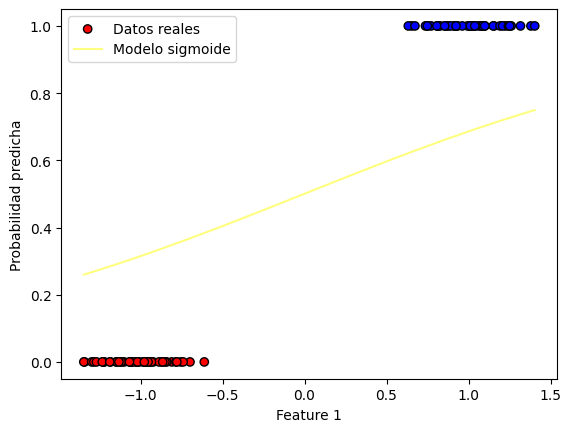

Iteracion: 196
Costo en la iteración 196: 0.3775538922062377
Valor del gradiente 196: [-0.00176246 -0.31114508]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00215456 0.78245474]


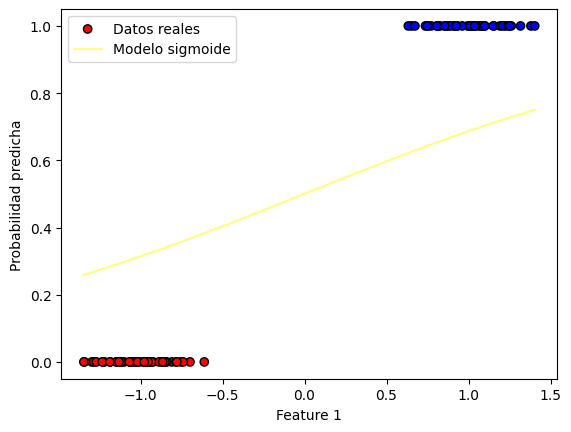

Iteracion: 197
Costo en la iteración 197: 0.3765868174324721
Valor del gradiente 197: [-0.0017659  -0.31045815]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00217222 0.78555932]


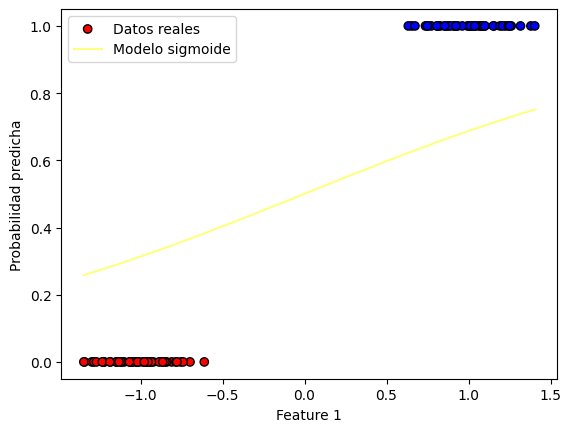

Iteracion: 198
Costo en la iteración 198: 0.37562400636962845
Valor del gradiente 198: [-0.00176929 -0.30977365]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00218991 0.78865706]


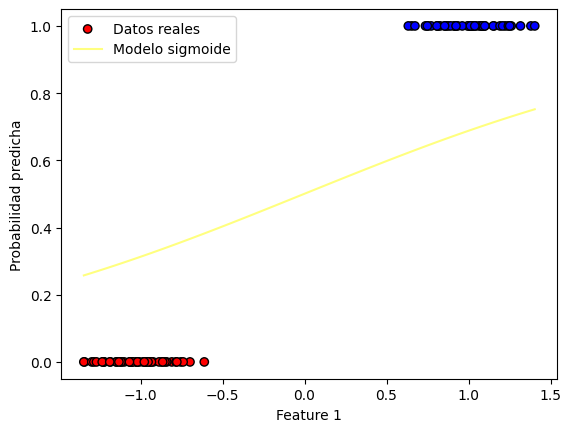

Iteracion: 199
Costo en la iteración 199: 0.3746654346232427
Valor del gradiente 199: [-0.00177265 -0.30909155]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00220764 0.79174797]


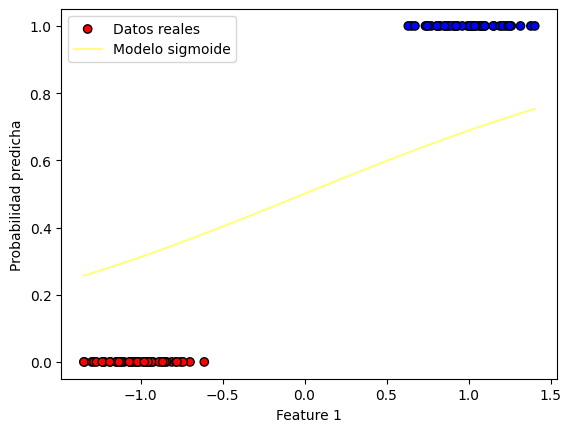

Iteracion: 200
Costo en la iteración 200: 0.37371107795656583
Valor del gradiente 200: [-0.00177597 -0.30841186]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.0022254  0.79483209]


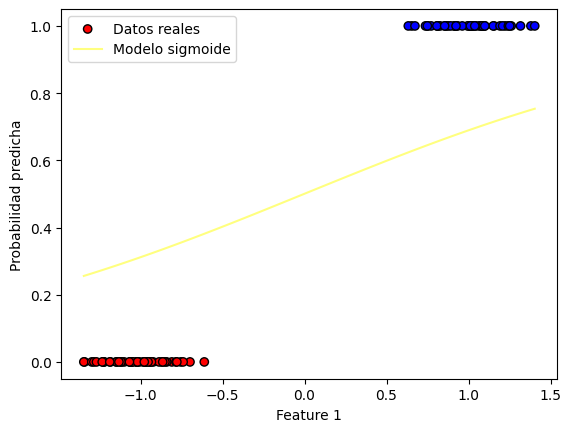

Iteracion: 201
Costo en la iteración 201: 0.37276091228956376
Valor del gradiente 201: [-0.00177926 -0.30773456]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00224319 0.79790944]


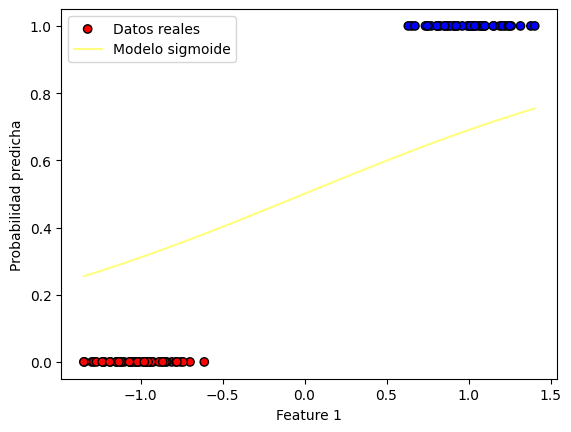

Iteracion: 202
Costo en la iteración 202: 0.37181491369792014
Valor del gradiente 202: [-0.00178251 -0.30705965]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00226101 0.80098003]


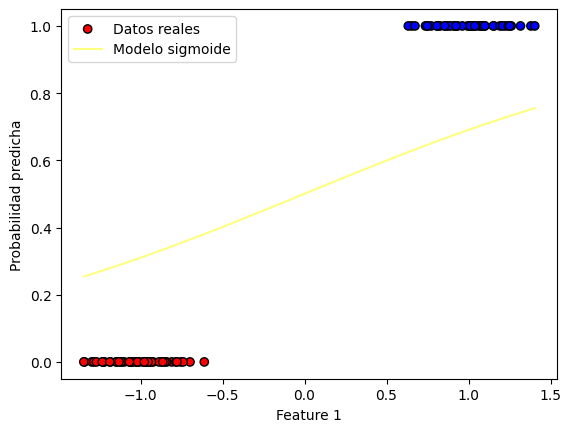

Iteracion: 203
Costo en la iteración 203: 0.3708730584120453
Valor del gradiente 203: [-0.00178573 -0.3063871 ]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00227887 0.8040439 ]


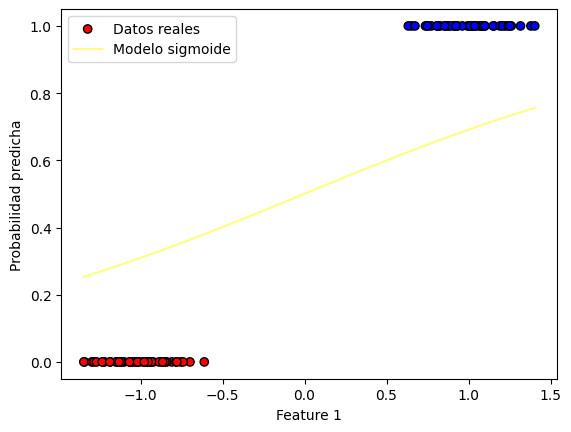

Iteracion: 204
Costo en la iteración 204: 0.36993532281608793
Valor del gradiente 204: [-0.00178891 -0.30571693]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00229676 0.80710107]


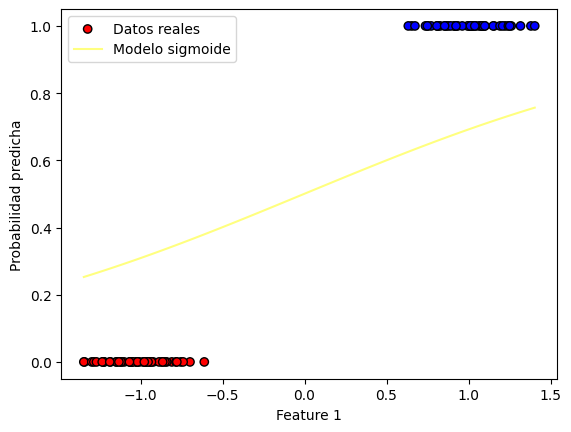

Iteracion: 205
Costo en la iteración 205: 0.3690016834469516
Valor del gradiente 205: [-0.00179206 -0.3050491 ]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00231468 0.81015156]


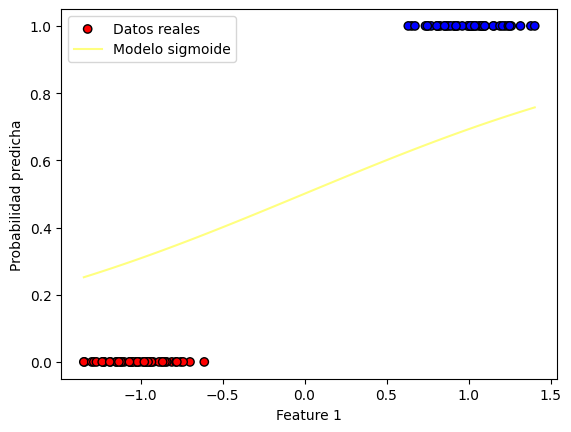

Iteracion: 206
Costo en la iteración 206: 0.36807211699331616
Valor del gradiente 206: [-0.00179517 -0.30438363]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00233263 0.8131954 ]


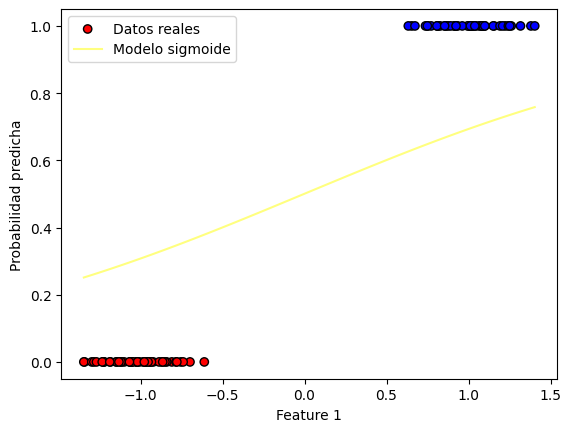

Iteracion: 207
Costo en la iteración 207: 0.3671466002946628
Valor del gradiente 207: [-0.00179825 -0.30372048]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00235062 0.8162326 ]


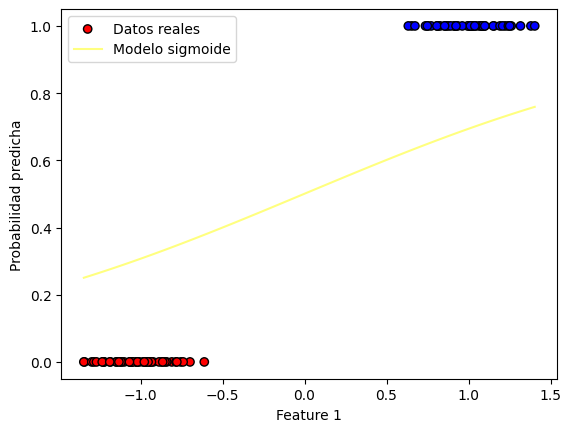

Iteracion: 208
Costo en la iteración 208: 0.3662251103403037
Valor del gradiente 208: [-0.0018013  -0.30305967]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00236863 0.8192632 ]


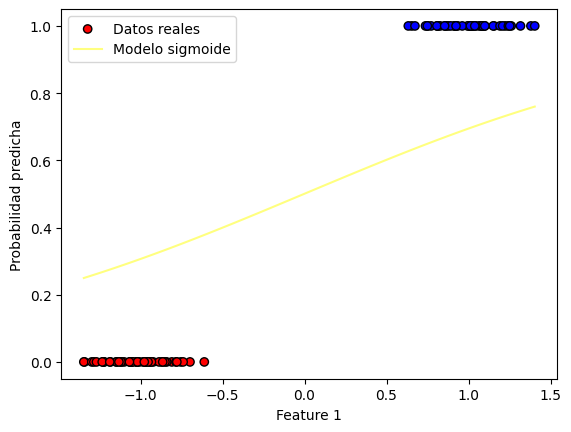

Iteracion: 209
Costo en la iteración 209: 0.3653076242684167
Valor del gradiente 209: [-0.00180431 -0.30240117]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00238667 0.82228721]


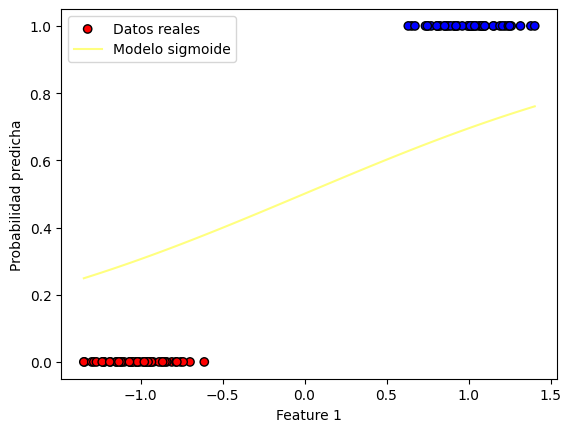

Iteracion: 210
Costo en la iteración 210: 0.3643941193650837
Valor del gradiente 210: [-0.00180729 -0.30174499]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00240475 0.82530466]


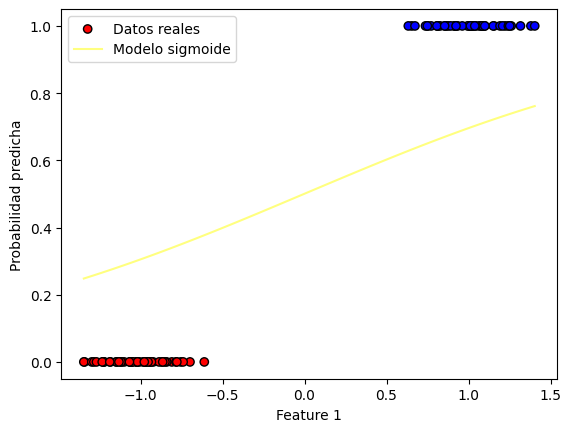

Iteracion: 211
Costo en la iteración 211: 0.36348457306333454
Valor del gradiente 211: [-0.00181023 -0.3010911 ]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00242285 0.82831557]


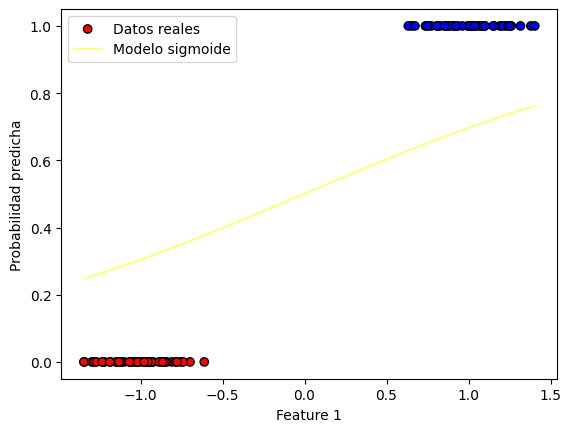

Iteracion: 212
Costo en la iteración 212: 0.3625789629421934
Valor del gradiente 212: [-0.00181315 -0.3004395 ]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00244098 0.83131997]


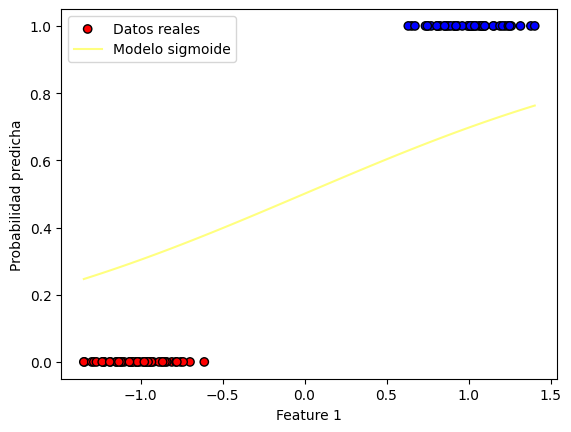

Iteracion: 213
Costo en la iteración 213: 0.3616772667257327
Valor del gradiente 213: [-0.00181603 -0.29979018]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00245914 0.83431787]


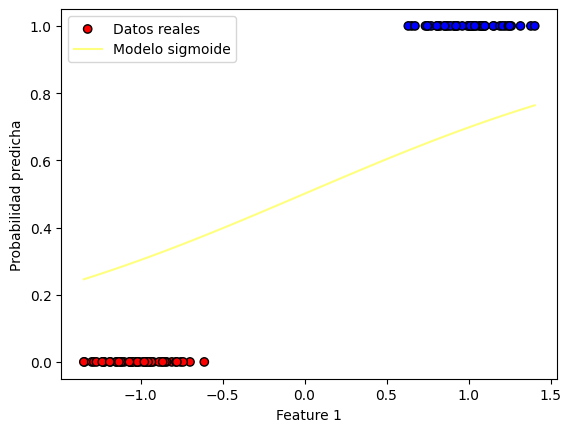

Iteracion: 214
Costo en la iteración 214: 0.3607794622821291
Valor del gradiente 214: [-0.00181887 -0.29914314]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00247733 0.8373093 ]


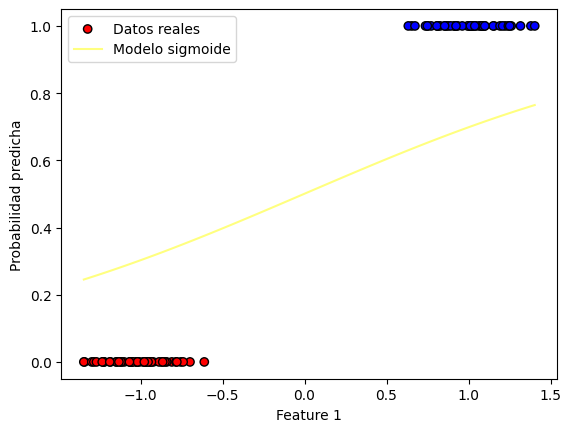

Iteracion: 215
Costo en la iteración 215: 0.35988552762272535
Valor del gradiente 215: [-0.00182169 -0.29849836]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00249554 0.84029429]


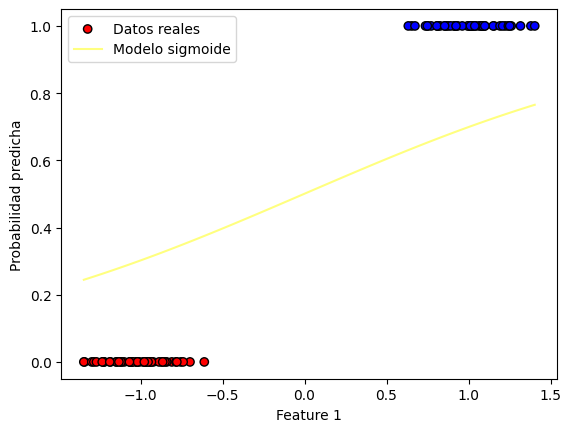

Iteracion: 216
Costo en la iteración 216: 0.35899544090109614
Valor del gradiente 216: [-0.00182447 -0.29785583]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00251379 0.84327284]


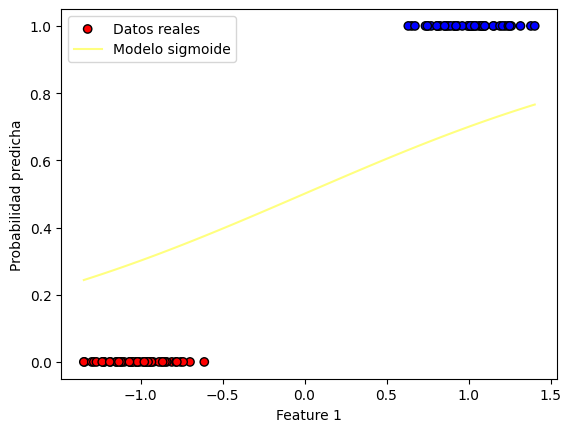

Iteracion: 217
Costo en la iteración 217: 0.35810918041211937
Valor del gradiente 217: [-0.00182722 -0.29721555]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00253206 0.846245  ]


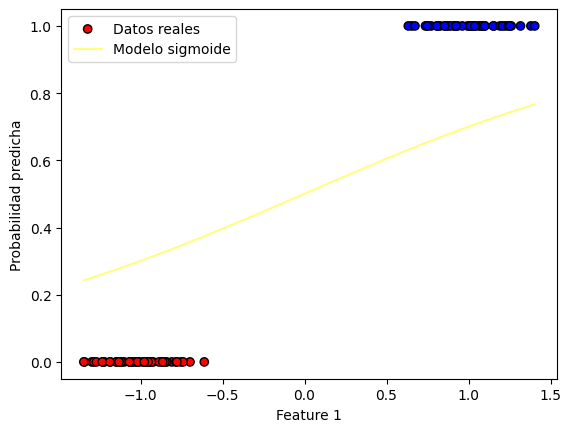

Iteracion: 218
Costo en la iteración 218: 0.35722672459105037
Valor del gradiente 218: [-0.00182994 -0.2965775 ]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00255036 0.84921077]


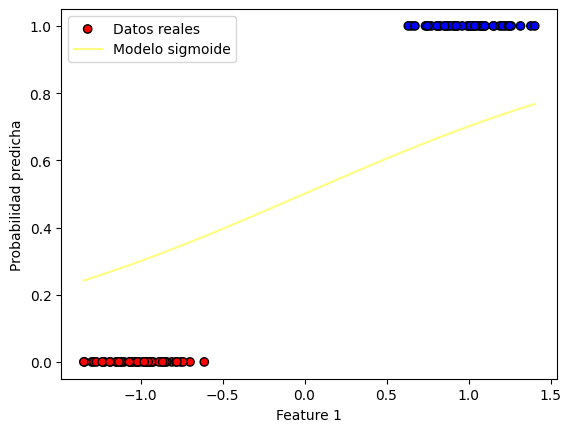

Iteracion: 219
Costo en la iteración 219: 0.35634805201260383
Valor del gradiente 219: [-0.00183263 -0.29594168]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00256869 0.85217019]


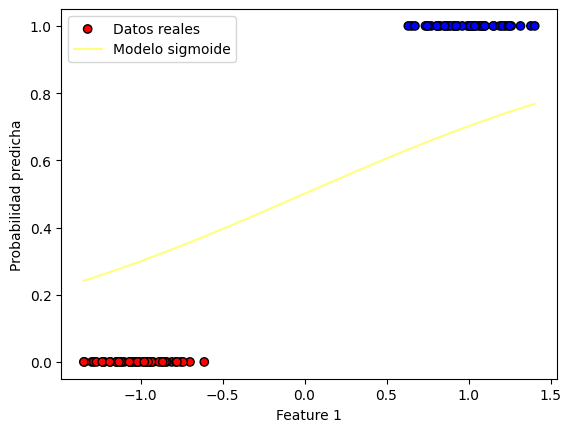

Iteracion: 220
Costo en la iteración 220: 0.35547314139003666
Valor del gradiente 220: [-0.00183529 -0.29530808]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00258704 0.85512327]


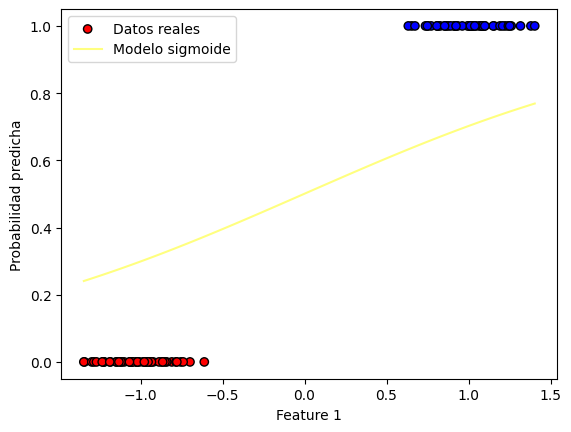

Iteracion: 221
Costo en la iteración 221: 0.3546019715742386
Valor del gradiente 221: [-0.00183792 -0.29467668]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00260542 0.85807004]


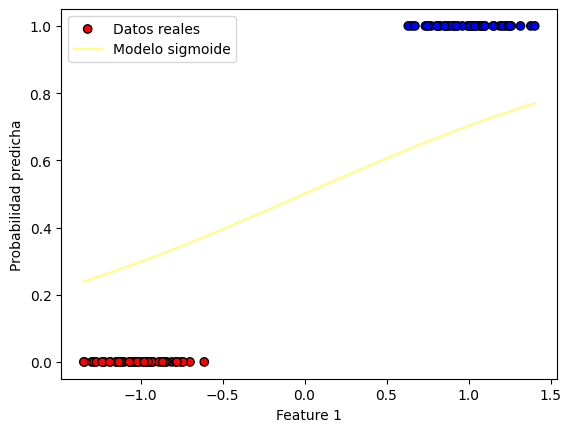

Iteracion: 222
Costo en la iteración 222: 0.35373452155282564
Valor del gradiente 222: [-0.00184051 -0.29404749]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00262382 0.86101051]


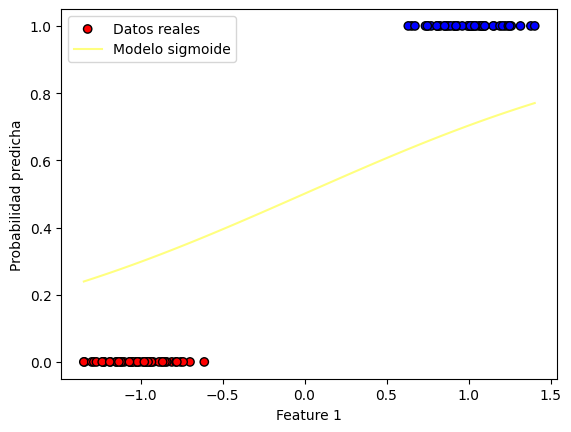

Iteracion: 223
Costo en la iteración 223: 0.3528707704492397
Valor del gradiente 223: [-0.00184308 -0.29342049]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00264226 0.86394472]


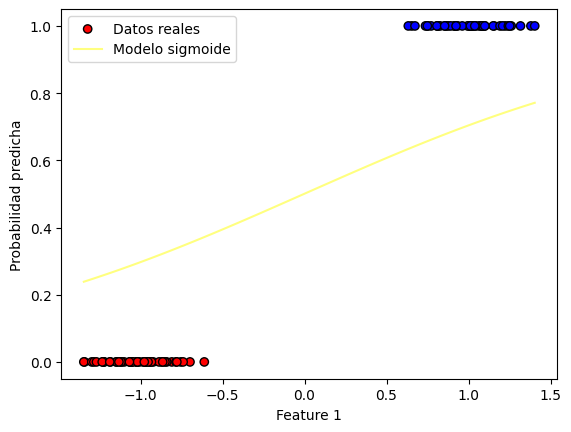

Iteracion: 224
Costo en la iteración 224: 0.352010697521851
Valor del gradiente 224: [-0.00184562 -0.29279567]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00266071 0.86687268]


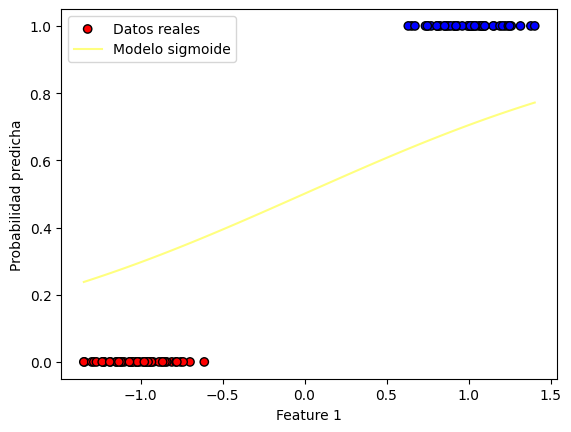

Iteracion: 225
Costo en la iteración 225: 0.3511542821630673
Valor del gradiente 225: [-0.00184812 -0.29217302]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00267919 0.86979441]


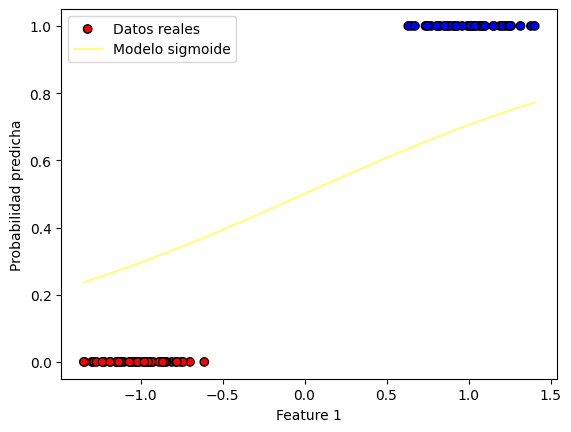

Iteracion: 226
Costo en la iteración 226: 0.35030150389844655
Valor del gradiente 226: [-0.0018506  -0.29155254]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.0026977  0.87270993]


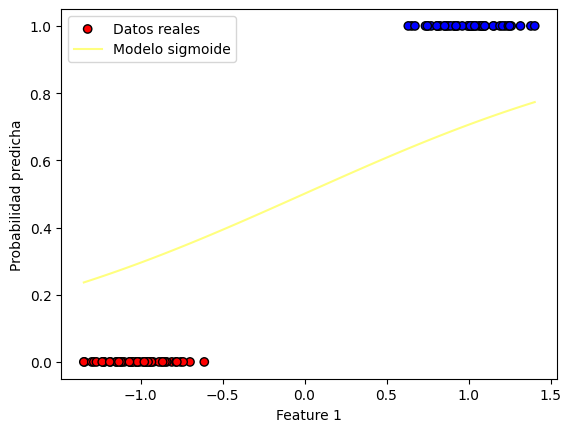

Iteracion: 227
Costo en la iteración 227: 0.3494523423858149
Valor del gradiente 227: [-0.00185305 -0.29093421]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00271623 0.87561927]


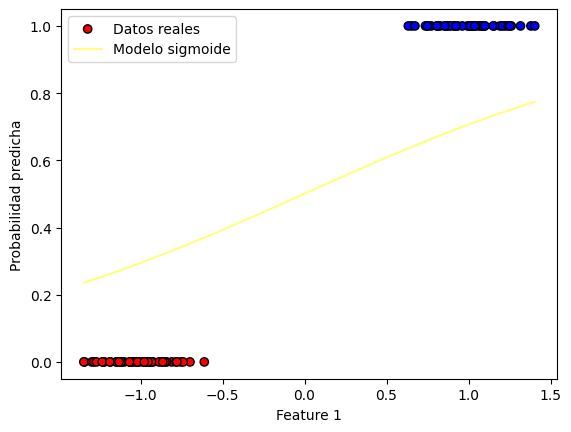

Iteracion: 228
Costo en la iteración 228: 0.3486067774143885
Valor del gradiente 228: [-0.00185546 -0.29031803]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00273478 0.87852245]


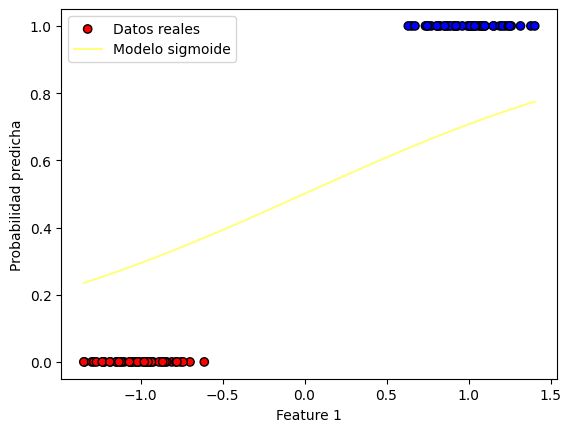

Iteracion: 229
Costo en la iteración 229: 0.3477647889039015
Valor del gradiente 229: [-0.00185785 -0.28970399]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00275336 0.88141949]


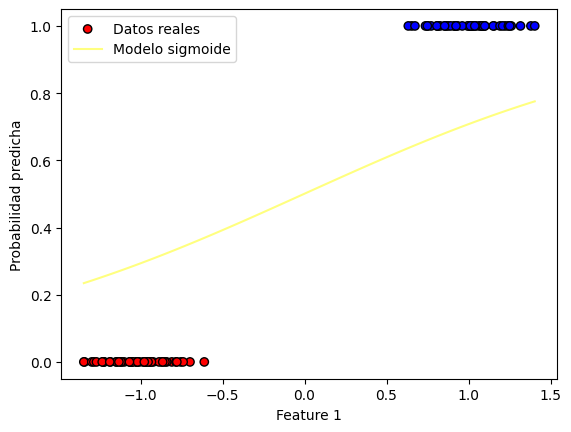

Iteracion: 230
Costo en la iteración 230: 0.3469263569037382
Valor del gradiente 230: [-0.00186021 -0.28909208]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00277196 0.88431041]


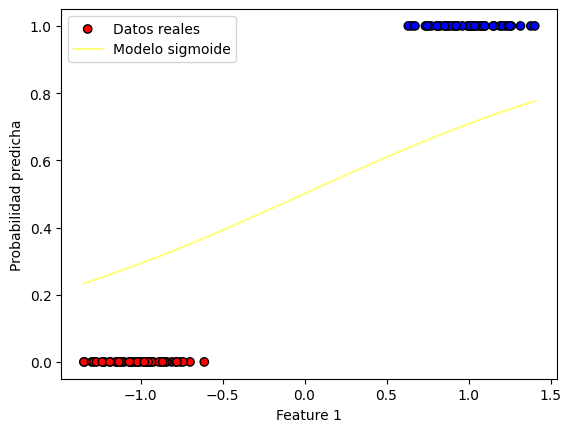

Iteracion: 231
Costo en la iteración 231: 0.3460914615920685
Valor del gradiente 231: [-0.00186254 -0.28848229]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00279059 0.88719524]


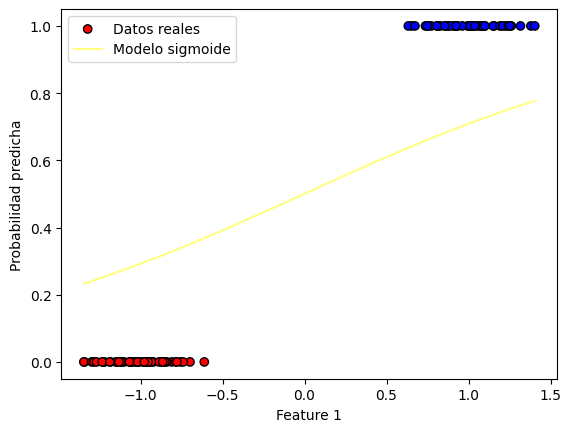

Iteracion: 232
Costo en la iteración 232: 0.3452600832749914
Valor del gradiente 232: [-0.00186485 -0.28787461]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00280924 0.89007398]


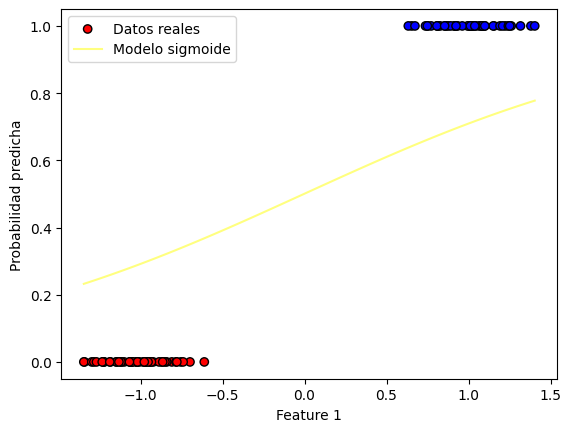

Iteracion: 233
Costo en la iteración 233: 0.3444322023856797
Valor del gradiente 233: [-0.00186712 -0.28726904]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00282791 0.89294667]


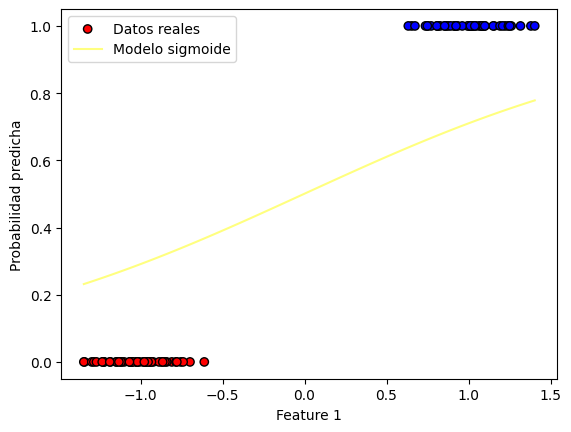

Iteracion: 234
Costo en la iteración 234: 0.3436077994835318
Valor del gradiente 234: [-0.00186937 -0.28666556]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.0028466  0.89581333]


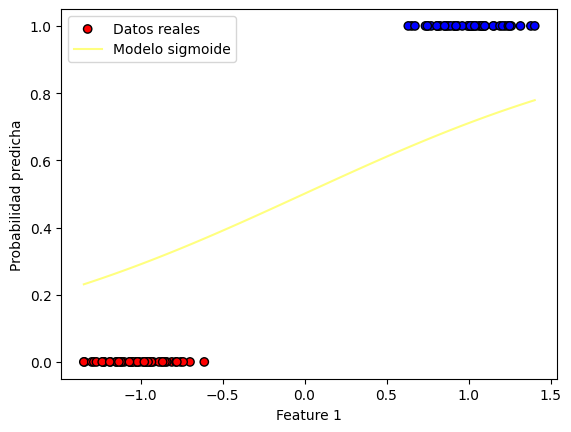

Iteracion: 235
Costo en la iteración 235: 0.3427868552533274
Valor del gradiente 235: [-0.00187159 -0.28606417]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00286532 0.89867397]


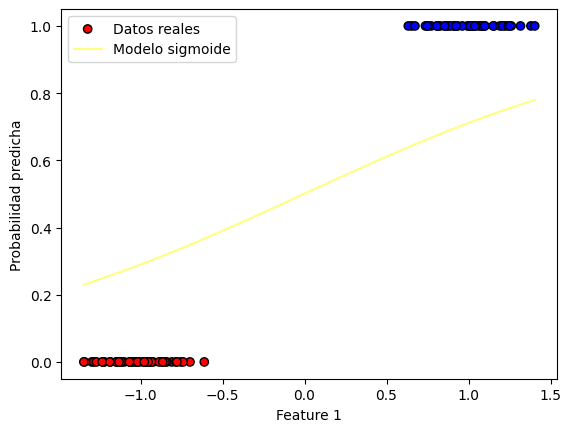

Iteracion: 236
Costo en la iteración 236: 0.3419693505043882
Valor del gradiente 236: [-0.00187378 -0.28546486]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00288406 0.90152862]


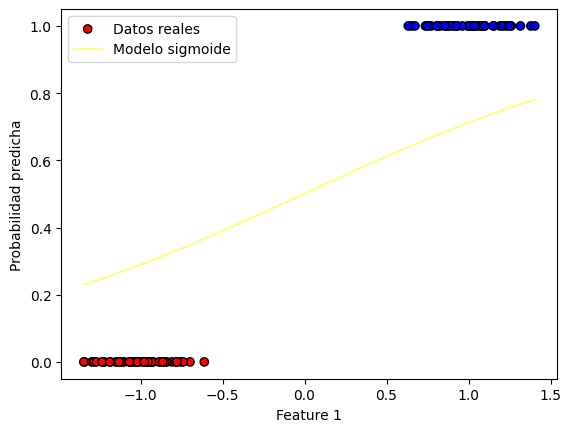

Iteracion: 237
Costo en la iteración 237: 0.34115526616974323
Valor del gradiente 237: [-0.00187594 -0.28486762]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00290282 0.9043773 ]


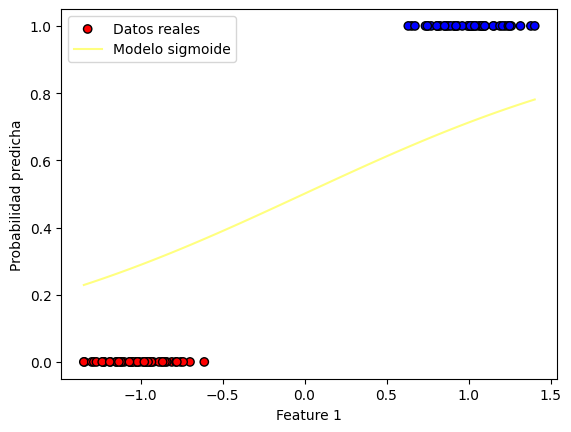

Iteracion: 238
Costo en la iteración 238: 0.3403445833052989
Valor del gradiente 238: [-0.00187808 -0.28427243]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.0029216  0.90722002]


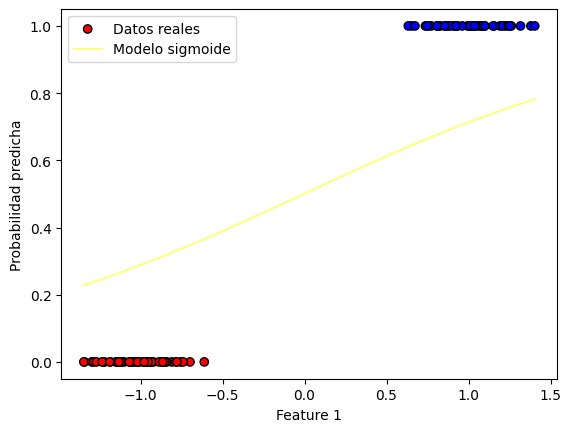

Iteracion: 239
Costo en la iteración 239: 0.339537283089014
Valor del gradiente 239: [-0.00188019 -0.28367931]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.0029404  0.91005681]


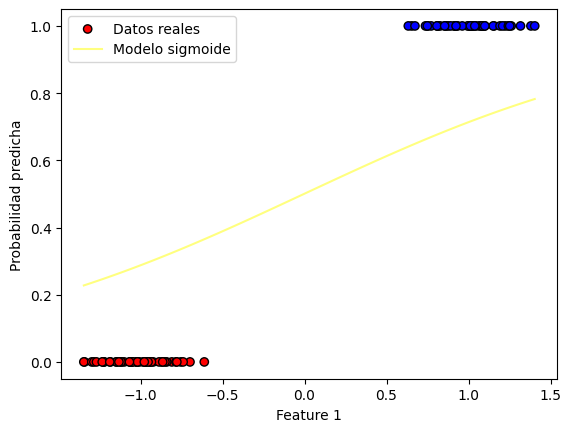

Iteracion: 240
Costo en la iteración 240: 0.3387333468200794
Valor del gradiente 240: [-0.00188227 -0.28308822]
Nuevos valores de los parámetros actualizado según el gradiente y el learning rate: [0.00295922 0.9128877 ]


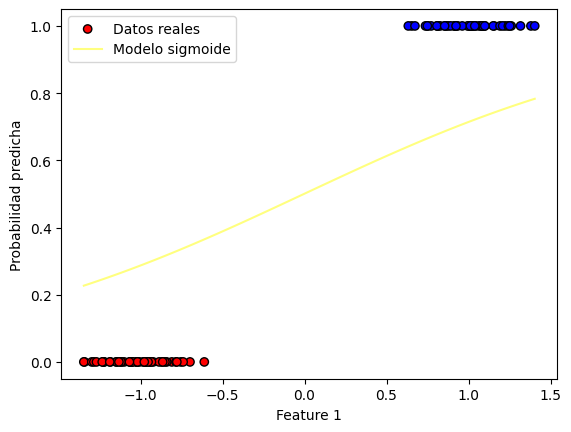

In [7]:
# Entrenar el modelo
beta = gradient_descent(X, y, beta, learning_rate, iterations)



In [ ]:
# Obtener las predicciones del modelo
preds = sigmoid(np.dot(X, beta)) >= 0.5

In [ ]:
preds

array([False, False, False,  True, False,  True, False, False,  True,
        True,  True,  True,  True,  True, False, False,  True,  True,
        True, False, False,  True,  True, False,  True, False, False,
       False,  True,  True, False, False,  True, False,  True, False,
        True,  True,  True,  True,  True,  True, False,  True,  True,
       False, False,  True, False,  True, False,  True, False,  True,
        True, False, False, False,  True,  True,  True,  True, False,
        True,  True, False,  True, False, False,  True, False,  True,
       False, False, False, False, False,  True, False, False, False,
       False,  True,  True, False,  True, False,  True,  True, False,
       False,  True, False, False, False, False, False,  True,  True,
        True])

## 6. ¿Se puede utilizar la Regresión Logística para problemas de clasificación no binaria?